In [2]:
import matplotlib.pyplot as plt
from datetime import date, timedelta
import statsmodels.api as sm
import statsmodels.graphics as smg
from statsmodels import tsa
import pandas as pd
import numpy as np
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA

In [3]:
SPX = pd.read_csv('SPX.csv', index_col='Date')
SPX.index = pd.to_datetime(SPX.index)
returns = SPX['return rate']
Dates = returns.index
type(Dates[0])

pandas._libs.tslibs.timestamps.Timestamp

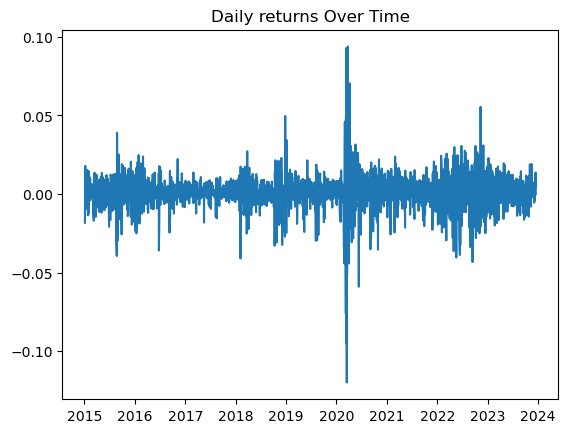

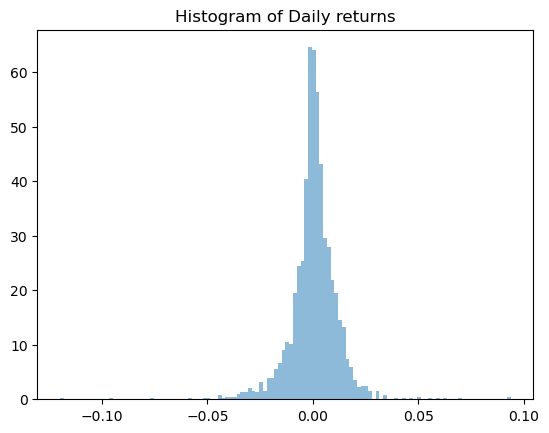

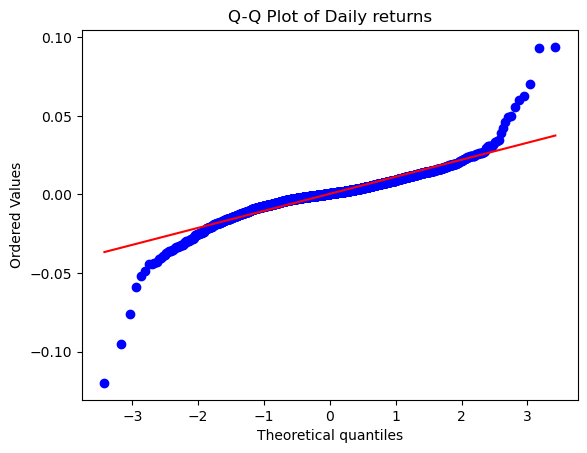

In [4]:
# Draw a time series graph of standardized residuals
plt.plot(returns)
plt.title('Daily returns Over Time')
plt.show()
import scipy.stats as stats

# Draw a histogram of standardized residuals
plt.hist(returns, bins=120, alpha=0.5, density=True)
plt.title('Histogram of Daily returns')
plt.show()

# Draw Q-Q diagram
stats.probplot(returns, dist="norm", plot=plt)
plt.title('Q-Q Plot of Daily returns')
plt.show()

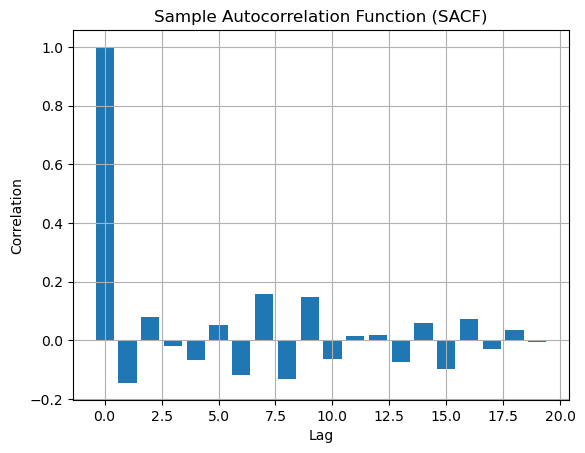

In [5]:
# plot ACF to check whether stationary
autocorr = {}
for i in range(20):
    rho =SPX['return rate'].autocorr(i)
    autocorr[i] = rho
plt.figure()
plt.bar(autocorr.keys(), autocorr.values())
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.title("Sample Autocorrelation Function (SACF)")
plt.grid(True)


In [6]:
#use adfuller test stationary
print("p-value of dX", sm.tsa.stattools.adfuller(SPX, regression = "c")[1])

p-value of dX 1.4665576747088881e-27


[]

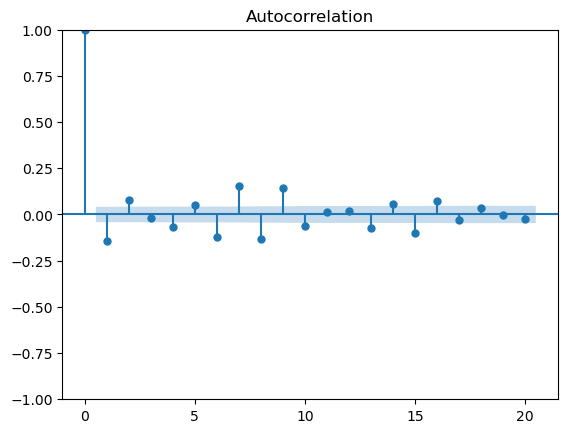

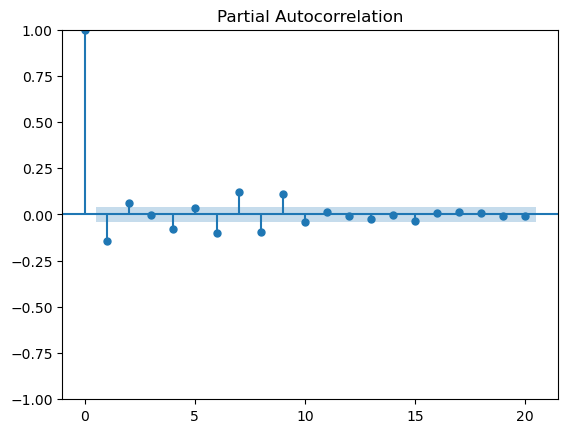

In [7]:
#similarly, check stationary
smg.tsaplots.plot_acf(SPX, lags = 20)
smg.tsaplots.plot_pacf(SPX, lags = 20)
plt.plot()

In [8]:
# get the order of arima
sm.tsa.stattools.arma_order_select_ic(SPX, ic = ['aic', 'bic'], trend = 'c') 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sari

{'aic':               0             1             2
 0 -13709.917523 -13750.288592 -13762.060259
 1 -13756.251230 -13758.135206 -13758.600344
 2 -13762.491390 -13760.488209 -13755.086481
 3 -13760.492833 -13758.510262 -13791.986785
 4 -13771.890551 -13769.209071 -13766.215370,
 'bic':               0             1             2
 0 -13698.476599 -13733.127206 -13739.178412
 1 -13739.089844 -13735.253359 -13729.998036
 2 -13739.609543 -13731.885901 -13720.763711
 3 -13731.890525 -13724.187492 -13751.943553
 4 -13737.567781 -13729.165839 -13720.451676,
 'aic_min_order': (3, 2),
 'bic_min_order': (3, 2)}

In [9]:
arima_model = sm.tsa.ARIMA(SPX, order=(3, 0, 2)).fit()
print(arima_model.summary())

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            return rate   No. Observations:                 2254
Model:                 ARIMA(3, 0, 2)   Log Likelihood                6902.993
Date:                Tue, 19 Dec 2023   AIC                         -13791.987
Time:                        00:43:46   BIC                         -13751.944
Sample:                             0   HQIC                        -13777.373
                               - 2254                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.628      0.103   -8.77e-05       0.001
ar.L1         -0.5978      0.101     -5.945      0.000      -0.795      -0.401
ar.L2          0.2900      0.102      2.844      0.0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
arima_residuals = arima_model.resid

In [11]:
# check autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(arima_residuals, lags=20)

,lb_stat,lb_pvalue
1,0.277573,5.982965e-01
2,2.387391,3.030991e-01
3,24.257497,2.207105e-05
4,26.464873,2.549794e-05
5,27.991509,3.653814e-05
6,34.152401,6.286541e-06
7,51.315870,7.962490e-09
8,59.138784,6.875555e-10
9,80.609804,1.222656e-13
10,82.180616,1.873869e-13


In [15]:
#check heteroskedasticity
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
residuals_squared = arima_residuals ** 2
model_data = pd.DataFrame({
    'Residuals': arima_residuals,
    'Residuals_Squared': residuals_squared
})

model = smf.ols(formula='Residuals ~ Residuals_Squared', data=model_data).fit()

# Using White test heteroskedastic
keys = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
white_test = het_white(model.resid,model.model.exog)
lzip(keys, white_test)

[('Test Statistic', 1685.3631503421273),
 ('Test Statistic p-value', 0.0),
 ('F-Statistic', 3335.830639275915),
 ('F-Test p-value', 0.0)]

In [18]:
# White test heteroskedastic pass, continue Arima-Egarch model, empirically, using Egarch(1,1)

In [19]:
arima_residuals = arima_model.resid
forecast_mean=arima_model.forecast(1)
egarch_model = arch_model(arima_model.resid, vol='EGARCH', p=1, o=0, q=1)
egarch_model_result = egarch_model.fit()
print(egarch_model_result.summary())
vol_pred=egarch_model_result.forecast()
forecast_variance = vol_pred.variance.values[-1, :]
forecasted_return = forecast_mean + np.random.normal(0, 1)*np.sqrt(forecast_variance)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 320718130.8778625
Iteration:      2,   Func. Count:     20,   Neg. LLF: 987250495217.7817
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2883.587880622708
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4683.2040364243285
Iteration:      5,   Func. Count:     45,   Neg. LLF: -7424.974967532487
Iteration:      6,   Func. Count:     50,   Neg. LLF: -7425.725538157879
Iteration:      7,   Func. Count:     55,   Neg. LLF: -7426.215810648011
Iteration:      8,   Func. Count:     60,   Neg. LLF: -7426.244180286541
Iteration:      9,   Func. Count:     65,   Neg. LLF: -7426.245679718431
Iteration:     10,   Func. Count:     70,   Neg. LLF: -7426.245847748977
Iteration:     11,   Func. Count:     75,   Neg. LLF: -7426.245871291798
Iteration:     12,   Func. Count:     79,   Neg. LLF: -7426.245871294144
Optimization terminated successfully    (Exit mode 0)
            Current function value: -7426.245871291798
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001281. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [20]:
forecast_mean=arima_model.forecast(1)
forecast_mean.values[0]

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


0.002537588403663868

In [21]:
vol_pred=egarch_model_result.forecast()
forecast_variance = vol_pred.variance.values[-1,:][0]
forecasted_return = forecast_mean + np.random.normal(0, 1)*np.sqrt(forecast_variance)
print(forecast_variance)

4.747080996277315e-05


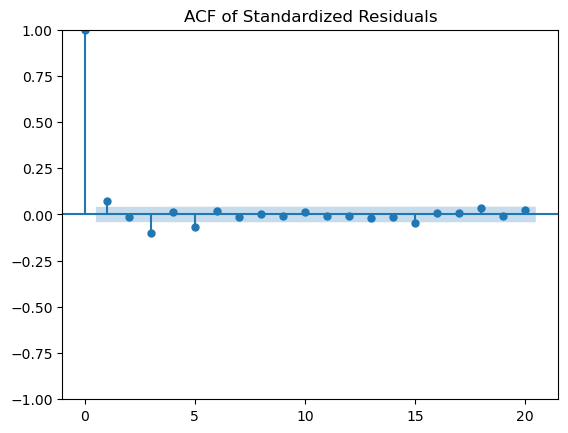

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
std_resid = egarch_model_result.std_resid
# Draw an autocorrelation graph of standardized residuals
plot_acf(std_resid, lags=20)
plt.title('ACF of Standardized Residuals')
plt.show()


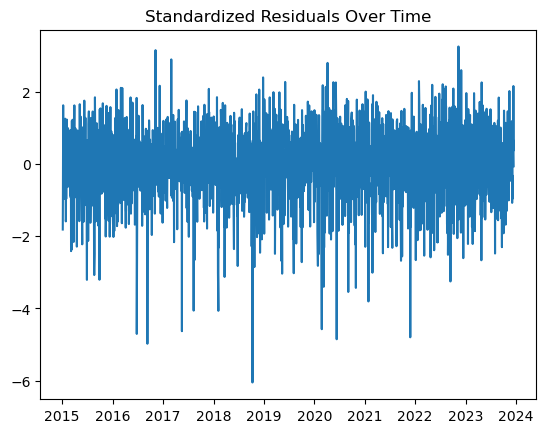

In [23]:
# Draw a time series graph of standardized residuals
plt.plot(std_resid)
plt.title('Standardized Residuals Over Time')
plt.show()


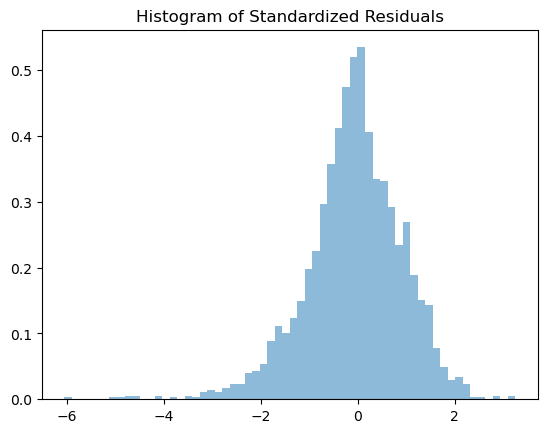

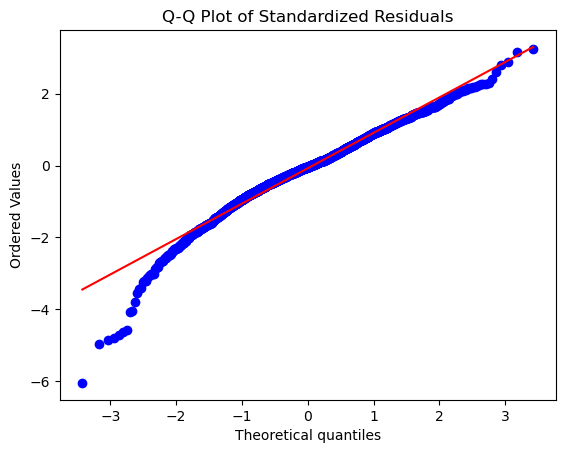

In [24]:
import scipy.stats as stats

# Draw a histogram of standardized residuals
plt.hist(std_resid, bins=60, alpha=0.5, density=True)
plt.title('Histogram of Standardized Residuals')
plt.show()

# Draw Q-Q diagram
stats.probplot(std_resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Standardized Residuals')
plt.show()

In [25]:
#check autocorrelation of residuals of egarch model
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(egarch_model_result.resid, lags=20)

,lb_stat,lb_pvalue
1,0.277573,5.982965e-01
2,2.387391,3.030991e-01
3,24.257497,2.207105e-05
4,26.464873,2.549794e-05
5,27.991509,3.653814e-05
6,34.152401,6.286541e-06
7,51.315870,7.962490e-09
8,59.138784,6.875555e-10
9,80.609804,1.222656e-13
10,82.180616,1.873869e-13


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\a

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5576047374520046.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2660254032359.865
Iteration:      3,   Func. Count:     28,   Neg. LLF: 3694919902.2345023
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4456.655530246442
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5071.539124230554
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5072.572131906658
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5072.620262056162
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5072.627777021935
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5072.627999520375
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5072.628027242083
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5071.746518607048
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5072.6281818330835
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5072.628292948921
Iteration:     14,   Func. Count:     92,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001254. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15106110475.836117
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3106697562211.643
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4072116495.5191717
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4364.519162078024
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5073.108619607987
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5073.42059701045
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5073.472783602219
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5073.484121720374
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5073.484098943917
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5073.484094571646
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5073.48447810256
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5073.484486440778
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5073.4844107860945
Iteration:     14,   Func. Count:     93,   Neg. LLF:

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001259. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 162407676.52334395
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2054434545251.4023
Iteration:      3,   Func. Count:     29,   Neg. LLF: 59364.4665886606
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4059.7860956716618
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5087.962707220832
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5088.054688256892
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5088.060319684214
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5088.060432252466
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5088.060442701586
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5088.060444104274
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5088.060444111972
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5088.060444104274
            Iterations: 11
            Function evaluations: 75
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001259. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 49827981.932472676
Iteration:      2,   Func. Count:     19,   Neg. LLF: 18881339175711.086
Iteration:      3,   Func. Count:     28,   Neg. LLF: 8466509.444971535
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4318.51658110356
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4939.627066531311
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5072.885958433411
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5072.974334518043
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5072.98003554251
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5072.981690601422
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5072.981851576634
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5072.981855178396
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5072.981855875452
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5072.981855875452
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001258. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 63598583.54356238
Iteration:      2,   Func. Count:     19,   Neg. LLF: 14619406103553.717
Iteration:      3,   Func. Count:     28,   Neg. LLF: 9051322.91093663
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4238.142106120656
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5018.642154935359
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5082.181381536924
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5082.2494455551
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5082.253585822247
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5082.254473440395
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5082.25448476254
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5082.254487868371
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5082.254487875498
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5082.254487868371
            Iteration

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001251. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 116918543.97467485
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1826713943941.3225
Iteration:      3,   Func. Count:     28,   Neg. LLF: 791615.5142078241
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4218.213441540976
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5074.18690684971
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5074.967832279568
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5074.987139410923
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5074.989794753546
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5074.992003151921
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5074.991967292262
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5074.991935625967
Iteration:     12,   Func. Count:     84,   Neg. LLF: -5074.9920285800945
Iteration:     13,   Func. Count:     89,   Neg. LLF: -5074.992058193093
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001257. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 63374737.69914553
Iteration:      2,   Func. Count:     19,   Neg. LLF: 18215533228281.56
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5357522.581636899
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4201.483358049098
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4968.052199019074
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5084.8312908835505
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5084.903811732042
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5084.908011680212
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5084.909185450051
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5084.909279301552
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5084.909281766488
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5084.909282551417
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5084.909282551417
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001255. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 81798366.44831342
Iteration:      2,   Func. Count:     19,   Neg. LLF: 5148045345021.818
Iteration:      3,   Func. Count:     28,   Neg. LLF: 28295682.72918965
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4278.427667041589
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5080.6722167814205
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5082.462765395364
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5082.516081936188
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5082.517955007212
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5082.518183942131
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5082.518187287725
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5082.518188230756
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5082.518188230756
            Iterations: 11
            Function evaluations: 76
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001255. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 109263701.29479778
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2094769462157.638
Iteration:      3,   Func. Count:     28,   Neg. LLF: 618.753649874356
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4292.495163304195
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5074.905113030826
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5081.305086669889
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5081.343815897473
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5081.345730553475
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5081.346029771516
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5081.346047917247
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5081.346049955546
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5081.346049966607
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5081.346049955546
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001243. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 541610777.5405914
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2287276976398.5815
Iteration:      3,   Func. Count:     28,   Neg. LLF: 12529212.457696758
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4371.955288330979
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5070.123980071448
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5070.2918911115485
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5070.317589548775
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5070.318955634928
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5070.31912912893
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5070.319129142158
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5070.31912912893
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2021-01-20 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001257. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 98391580.91428068
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2734560434434.197
Iteration:      3,   Func. Count:     28,   Neg. LLF: -845.8121716313127
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4191.524589823952
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5076.355615381199
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5085.549513216654
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5085.587155581632
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5085.5885830776
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5085.588878195506
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5085.588911058363
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5085.58890959168
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5085.5889141622865
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5085.588913144575
Optimization terminated successfully    (Exit mode 0)
 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001244. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 116945985.04672322
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2022637352827.7544
Iteration:      3,   Func. Count:     28,   Neg. LLF: 15295351.20963402
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4346.997679470357
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5062.83365844187
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5065.619097449893
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5065.66656440347
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5065.6717755489635
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5065.672153560025
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5065.67216836127
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5065.672169800345
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5065.672169803744
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5065.672169800345
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001234. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 212846727.27364916
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1761723658565.2532
Iteration:      3,   Func. Count:     29,   Neg. LLF: 35615930.90460378
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4287.184996317235
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5072.683491695934
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5072.768344972036
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5072.776436604647
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5072.7769994923
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5072.77701752314
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5072.777017540932
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5072.77701752314
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2021-01-25 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001235. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 199699714.13261133
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1764484112988.4194
Iteration:      3,   Func. Count:     29,   Neg. LLF: 57774122.11669716
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4286.983174435301
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5062.502824421881
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5062.6058757266155
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5062.616294545944
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5062.616764764485
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5062.61678557661
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5062.616786330758
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5062.616786330758
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10
2021-01-26 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001255. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 102813617.22179782
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2385611029060.794
Iteration:      3,   Func. Count:     28,   Neg. LLF: 205.85340842220484
Iteration:      4,   Func. Count:     36,   Neg. LLF: -4237.62029484738
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5077.368930995521
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5083.59583936009
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5083.657942646194
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5083.661112770769
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5083.661704993211
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5083.661715274453
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5083.661717649258
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5083.66171764856
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5083.661717649258
            Iterati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001254. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 143491820.06041312
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1802269105740.079
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1432.9337717943145
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4124.908824913484
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5076.338639206698
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5076.717049726398
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5076.7270511625775
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5076.7278702726
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5076.727928421574
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5076.727938414269
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5076.727938416023
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5076.727938414269
            Iterations: 11
            Function evaluations: 75
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001257. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 100067320.41500303
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2263266005762.6772
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1203.4670098347272
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4193.602718477662
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5074.662593527826
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5077.572335059005
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5077.59724762955
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5077.5988878191865
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5077.598700595332
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5077.598983171496
Iteration:     11,   Func. Count:     78,   Neg. LLF: -5077.59915005552
Iteration:     12,   Func. Count:     83,   Neg. LLF: -5077.5991613071565
Iteration:     13,   Func. Count:     88,   Neg. LLF: -5077.599116456662
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001258. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 103026345.2747203
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2293307410178.079
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1249.1738671917033
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4195.966319154448
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5073.27291375025
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5077.602987160533
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5077.630358071974
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5077.631257789718
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5077.63195626933
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5077.632112620149
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5077.631982270751
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5077.63216235517
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5077.632162347425
Optimization terminated successfully    (Exit mode 0)
 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001248. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 189788518.11239445
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1354890821584.5334
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1423.259122411359
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4110.380996859723
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5072.7706999343445
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5072.948012867677
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5072.956576549868
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5072.9571660479
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5072.957217529039
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5072.957220729905
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5072.957220735096
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5072.957220729905
            Iterations: 11
            Function evaluations: 75
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001262. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 91732320.73886332
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2889340933363.3057
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1205.3852140875476
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4166.8067396789265
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5074.085911042255
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5077.729791453908
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5077.755411456639
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5077.756899301428
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5077.757085313663
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5077.757096520112
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5077.757098236069
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5077.757098237338
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5077.757098236069
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001262. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 92636157.76243734
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2924367134199.635
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1165.6897596736042
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4131.714290470365
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5078.3306713904385
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5079.448380723348
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5079.464222263584
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5079.465297838975
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5079.465374246809
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5079.465385198485
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5079.465385213501
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5079.465385198485
            Iterations: 11
            Function evaluations: 75
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000126. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 91433043.5567714
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2995623405806.1646
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1093.3399791733132
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4144.062551591727
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5079.448852342956
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5080.374248183261
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5080.387955994955
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5080.389159309691
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5080.389238235701
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5080.389252109602
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5080.389252121839
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5080.389252109602
            Iterations: 11
            Function evaluations: 75
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001252. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 131044735.48320682
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1476556297846.4663
Iteration:      3,   Func. Count:     28,   Neg. LLF: -972.3858323618513
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4149.124940255841
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5074.474516246124
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5074.555512557919
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5074.558685324906
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5074.558995435582
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5074.559021889911
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5074.559024070435
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5074.559024070792
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5074.559024070435
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001245. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 180605871.61474985
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1351425049796.5867
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1113.9465992490964
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4323.5797527421
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5074.4478323080575
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5078.533286168002
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5078.557955121311
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5078.562555839126
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5078.563460025451
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5078.563491413856
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5078.563493152836
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5078.563493155487
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5078.563493152836
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001247. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 148882306.4940769
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1575876376311.3945
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1032.0483102067674
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4172.578569169176
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5076.454510117566
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5076.669073055267
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5076.676368628356
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5076.677113513437
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5076.677163147977
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5076.677158118517
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5076.6771748169485
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5076.677176010238
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5076.677177529443
Iteration:     14,   Func. Count:     91,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001245. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 150852189.7161296
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1632552100359.1619
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1067.493710709642
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4293.0910264554595
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5063.79591660569
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5067.332689741454
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5067.364610449586
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5067.366469465929
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5067.3667891549885
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5067.366790546919
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5067.366790559245
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5067.366790546919
            Iterations: 11
            Function evaluations: 75
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001259. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 95173153.67657578
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2778216393509.185
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1086.4800019620125
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4152.094543920697
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5080.25535691201
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5080.807870398987
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5080.820143690132
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5080.821504590033
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5080.821555699919
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5080.821566663302
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5080.821566671362
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5080.821566663302
            Iterations: 11
            Function evaluations: 74
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001256. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 139878550.36908317
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1615654517291.561
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1201.8959412815097
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4140.163662661006
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5081.3123963560065
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5081.907345689966
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5081.916595022133
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5081.917746360953
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5081.917787984067
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5081.917796292709
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5081.917796298924
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5081.917796292709
            Iterations: 11
            Function evaluations: 74
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001258. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 93760162.6967338
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3184491820283.616
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1127.4814069524446
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4198.632355858579
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5080.6749267316445
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5082.046565555238
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5082.06379458779
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5082.065565375811
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5082.065647758406
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5082.065663651501
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5082.065663664892
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5082.065663651501
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001257. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 97330381.5780037
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2575086006897.745
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1089.733925974685
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4164.485859128539
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5084.871943681423
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5085.076669949111
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5085.091123599877
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5085.09251209882
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5085.092580053045
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5085.09259578047
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5085.092595781027
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5085.09259578047
            Iterations: 11
            Function evaluations: 74
            Gradient evaluatio

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001247. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 96166986.55467087
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3047927966604.411
Iteration:      3,   Func. Count:     28,   Neg. LLF: -999.8560052715881
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4259.141619580058
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5062.986693174528
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5064.457494229462
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5064.474991294877
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5064.477187413657
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5064.477325316029
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5064.477333694554
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5064.477334494426
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5064.477334494426
            Iterations: 11
            Function evaluations: 76
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001248. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 107415172.90066911
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1766844222958.8074
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1334.7898838869537
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4258.3388653320835
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5057.882898481565
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5058.216166651024
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5058.226602568631
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5058.228041694605
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5058.228068303974
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5058.228072133607
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5058.22807213373
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5058.228072133607
            Iterations: 11
            Function evaluations: 74
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000125. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 112089555.40445313
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1261804031959.966
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1387.1054051422666
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4164.2823870270095
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5062.255479465208
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5062.4708302981435
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5062.485177819424
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5062.486766663256
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5062.486883378965
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5062.486891020577
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5062.486891030467
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5062.486891020577
            Iterations: 11
            Function evaluations: 74
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001259. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 97386571.15117474
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2558768686277.9326
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1352.5983183141252
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4148.878386658324
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5078.794382926981
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5079.457589316045
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5079.473829822434
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5079.475096763185
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5079.475173896011
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5079.4751903370725
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5079.475190341511
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5079.4751903370725
            Iterations: 11
            Function evaluations: 75
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001249. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 152703323.6497692
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1205959625792.5776
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1250.7039663626233
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4254.197534627145
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5072.401234786297
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5075.208185530781
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5075.225456314416
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5075.227021446882
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5075.2272220465165
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5075.227237115043
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5075.227237880261
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5075.227237880261
            Iterations: 11
            Function evaluations: 76
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001262. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 61561840.324092515
Iteration:      2,   Func. Count:     19,   Neg. LLF: 5660540241160.482
Iteration:      3,   Func. Count:     28,   Neg. LLF: -826.7492999934784
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4153.424695172285
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5047.4123875587375
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5071.781049223559
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5071.828690435799
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5071.830592917073
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5071.830864024729
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5071.830875683665
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5071.830877676299
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5071.830877686942
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5071.830877676299
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001261. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 77467584.06145531
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3167343124564.086
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1115.346574946917
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4063.6032891148934
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5071.1666052040055
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5072.080313701457
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5072.095872405374
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5072.097296238986
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5072.097354027022
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5072.097367493467
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5072.09736750688
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5072.097367493467
            Iterations: 11
            Function evaluations: 75
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001265. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 80250394.42040029
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4321260006035.957
Iteration:      3,   Func. Count:     28,   Neg. LLF: -948.2150864851538
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4089.7246680379376
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5063.951090447677
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5067.983868892741
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5068.007764247592
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5068.009137961567
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5068.009299168817
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5068.009306554501
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5068.00930834493
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5068.009308347466
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5068.00930834493
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000124. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 98182251.19461009
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1944795668694.2751
Iteration:      3,   Func. Count:     28,   Neg. LLF: -405.9739591746736
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4195.672592421576
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5060.757631351507
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5061.575837327555
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5061.601440342018
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5061.583096032258
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5061.606890587458
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5061.6069431128
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5061.6069477894525
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5061.606948566573
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5061.606948566573
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001255. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 205354074.76210395
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1280652816178.8794
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1066.0341280434525
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4099.463035023578
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5065.6913432033725
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5065.7919392593
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5065.797848086166
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5065.798351046854
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5065.798372387016
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5065.798378177175
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5065.798378185886
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5065.798378177175
            Iterations: 11
            Function evaluations: 75
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001266. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 94581795.39529634
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2815574308853.46
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1048.8329447263523
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4147.110123474766
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5056.814401930978
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5063.029847200054
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5063.061250506969
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5063.062297226961
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5063.0624603399065
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5063.062465396188
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5063.062466766669
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5063.062466767162
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5063.062466766669
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001255. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 175255676.01592442
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1836263430040.519
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1140.5936015408975
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4146.480690218894
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5074.081522354752
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5075.050393430851
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5075.071497127521
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5075.074511516296
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5075.074728597539
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5075.07482906724
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5075.074868494146
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5075.074868500213
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5075.074868494146
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001267. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 185417173.0286376
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1529313549424.3027
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1378.9875318019376
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4068.3388778323124
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5060.141150488812
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5060.477901916658
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5060.487418401279
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5060.488553515069
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5060.487679666501
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5060.488719644738
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5060.488737106714
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5060.4887168559
Iteration:     13,   Func. Count:     88,   Neg. LLF: -5060.488627337456
Iteration:     14,   Func. Count:     94,   Neg. LLF

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 96870163.77359395
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1953054854706.4336
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1062.1547687486413
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4169.24397637262
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5057.314820776344
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5062.31774298917
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5062.343204713172
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5062.344416930242
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5062.3451935860985
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5062.345253047413
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5062.345272787083
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5062.345241419967
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5062.345273031964
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000127. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 98679156.40869802
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1821771286124.2153
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1062.0040283514504
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4196.994507342784
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5057.015559093673
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5062.206726856633
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5062.230997940085
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5062.232652214653
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5062.233033472223
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5062.23303991195
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5062.233040822462
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5062.233040822462
            Iterations: 11
            Function evaluations: 76
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 118515781.72916608
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1634491012107.1877
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1025.4786696418555
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4204.310341312052
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5053.635529116225
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5063.6808021860825
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5063.7161520678055
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5063.715292035174
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5063.71851517025
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5063.718615889732
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5063.718621543233
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5063.7186235648605
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5063.7186235638355
Optimization terminated successfully    (Exit m

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 118127716.76644745
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1549076489378.1775
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1065.9163007244938
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4233.43666194666
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5045.167727467811
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5062.870461800158
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5062.913777192969
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5062.913780560693
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5062.9155395830585
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5062.915657350704
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5062.915577878492
Iteration:     12,   Func. Count:     83,   Neg. LLF: -5062.915503729574
Iteration:     13,   Func. Count:     89,   Neg. LLF: -5062.915662293247
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001268. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 118354153.54567103
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1353676262227.68
Iteration:      3,   Func. Count:     28,   Neg. LLF: -999.5430439493148
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4174.083292801508
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5058.802039937429
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5063.534250634127
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5063.553932756038
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5063.560196503486
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5063.56059056846
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5063.560720539513
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5063.560655042846
Iteration:     12,   Func. Count:     83,   Neg. LLF: -5063.560734473418
Iteration:     13,   Func. Count:     88,   Neg. LLF: -5063.560706050424
Iteration:     14,   Func. Count:     94,   Neg. LLF: 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001229. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 198305247.1897011
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1655006495282.0227
Iteration:      3,   Func. Count:     29,   Neg. LLF: -36.21407409281671
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4163.428207362265
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5072.430958351844
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5072.5669115735
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5072.607777890093
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5072.610172962388
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5072.610309317632
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5072.610340687272
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5072.610342614985
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5072.610342623173
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5072.610342614985
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001266. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 91275851.06652588
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2877072971660.952
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1028.3321220314033
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4074.094615359295
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5065.823268312257
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5067.172654547816
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5067.18665584321
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5067.1873693492325
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5067.187935317281
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5067.187791700899
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5067.187969697937
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5067.187972240552
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5067.187975221817
Iteration:     14,   Func. Count:     92,   Neg. LLF

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 126533194.95732483
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1391684666299.9294
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1035.2489430038356
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4183.23241432361
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5054.217132737377
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5063.340246798622
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5063.374842209771
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5063.3755028104415
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5063.375665902189
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5063.375668953382
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5063.3756696805485
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5063.3756696805485
            Iterations: 11
            Function evaluations: 76
            Gradient 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001268. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 97873216.19706291
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2402331407806.296
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1044.945601712595
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4034.724401104593
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5062.674358279677
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5064.16843324015
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5064.182333171096
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5064.182748563199
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5064.18365173621
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5064.18368349918
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5064.18368635025
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5064.183686361659
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5064.18368635025
            Iterations

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001267. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 143777763.39956105
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1228348140531.7026
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1100.266822306455
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4232.938083750178
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5036.116209772708
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5063.407908522826
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5063.463611684487
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5063.464285734181
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5063.46446145097
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5063.464464473658
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5063.464465219384
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5063.464465219384
            Iterations: 11
            Function evaluations: 76
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001265. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 124211759.95570925
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1470044892968.4077
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1160.0028901027326
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4166.102318698237
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5051.931760198901
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5058.505340114336
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5058.537877562245
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5058.538964135805
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5058.539274593992
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5058.5392773439635
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5058.539277940459
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5058.539277940459
            Iterations: 11
            Function evaluations: 76
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001265. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 112818678.49255693
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1886878064779.6558
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1204.3083263310543
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4156.924427284818
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5057.627947532081
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5064.10318995616
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5064.1391388208485
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5064.140287749738
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5064.14050777141
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5064.140514491999
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5064.140516068708
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5064.140516069629
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5064.140516068708
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001266. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 161793827.55063868
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1516477786072.356
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1330.2816263510495
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3986.478918082942
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5063.170541952386
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5063.653611926501
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5063.664444743323
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5063.665157214532
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5063.66522208833
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5063.665229032549
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5063.6652290485035
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5063.665229032549
            Iterations: 11
            Function evaluations: 76
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001263. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 105338633.65790541
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2581181252665.3696
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1014.0262892860161
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4038.6673947182567
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5062.683415580808
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5064.127044178509
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5064.142013379995
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5064.144068271225
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5064.144345100542
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5064.144363763999
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5064.144366532868
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5064.144366539738
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5064.144366532868
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001266. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 163714565.08009756
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1115374351752.7139
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1089.0602876379835
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4139.863404764434
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5055.902874240351
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5064.441338674013
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5064.476428845392
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5064.477445083783
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5064.477765477635
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5064.477765495053
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5064.477765477635
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2021-03-30 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001266. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 165837187.16694635
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1111270420602.301
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1120.8406909511343
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4184.274735362147
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5050.19098276423
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5063.800322657732
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5063.847884206318
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5063.848535386367
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5063.848738694112
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5063.848740326147
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5063.848740342157
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5063.848740326147
            Iterations: 11
            Function evaluations: 75
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001262. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 120898153.20364563
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1437396647065.4546
Iteration:      3,   Func. Count:     28,   Neg. LLF: -927.6669849701257
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4001.221509035367
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5065.756782637345
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5065.864638178744
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5065.873823532693
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5065.8749464544235
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5065.875233452934
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5065.875229459251
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5065.875297291832
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5065.875305519376
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5065.875307509203
Iteration:     14,   Func. Count:     91,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001263. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 158381732.10851228
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1349485803356.819
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1122.6396766342368
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4075.1974940992436
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5064.987167799211
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5065.967487885893
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5065.979120169923
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5065.980214980873
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5065.980334199777
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5065.98034133261
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5065.980342337907
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5065.98034233929
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5065.980342337907
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001265. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 151315958.2846946
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1383133351266.8872
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1143.8111324106285
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4075.029498057733
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5062.285272672583
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5063.789596452658
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5063.803529478981
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5063.804060692948
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5063.80484325742
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5063.805053353853
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5063.805057601966
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5063.805057602993
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5063.805057601966
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001255. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 179698651.0071547
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1273973227434.8916
Iteration:      3,   Func. Count:     28,   Neg. LLF: -600.8066859372557
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4231.180473744325
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5071.1650490577595
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5074.643839444768
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5074.673655937117
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5074.674764336667
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5074.6749634433745
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5074.674972834691
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5074.674974564907
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5074.674974571533
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5074.674974564907
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001254. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 95692215.97084293
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2766063237459.3535
Iteration:      3,   Func. Count:     28,   Neg. LLF: -635.8897850675321
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4131.546623641012
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5060.927531187157
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5061.899903953474
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5061.915002355923
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5061.9169597524815
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5061.917115174593
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5061.917129700712
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5061.917132623974
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5061.917132625762
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5061.917132623974
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001256. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 138032937.81155398
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1764582500252.6304
Iteration:      3,   Func. Count:     28,   Neg. LLF: -808.2432330272343
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4148.2111333893445
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5070.733924248208
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5071.5169986544515
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5071.526939424331
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5071.528710752162
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5071.5287888052535
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5071.528800049907
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5071.528800825545
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5071.528800825545
            Iterations: 11
            Function evaluations: 76
            Gradient 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001263. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 161557537.53137887
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1399943177304.4363
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1237.3139880311887
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4245.474271467276
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5051.830110693167
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5061.337281979089
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5061.373798811515
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5061.374904428207
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5061.375179927862
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5061.375186031853
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5061.375186729301
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5061.375186729301
            Iterations: 11
            Function evaluations: 76
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001264. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 154369224.29084736
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1379799442585.9238
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1222.8492214001385
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4231.025175017367
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5054.080128918682
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5061.472373175486
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5061.506005761737
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5061.50737965144
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5061.507558838983
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5061.506964260774
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5061.507646863554
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5061.507648300646
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5061.507649237783
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001262. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 148909070.71359178
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1456189093833.1436
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1158.4132900416037
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4217.525855547903
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5057.468012660445
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5062.8658954514485
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5062.892251971567
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5062.898985741225
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5062.899456011146
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5062.899533597878
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5062.899542650218
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5062.899542659105
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5062.899542650218
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001254. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 152929798.08509
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1365126557634.519
Iteration:      3,   Func. Count:     28,   Neg. LLF: -770.1237010475404
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4284.182044914427
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5052.081512860232
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5055.756538333534
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5055.785998915347
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5055.787144910466
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5055.78748852534
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5055.787493292334
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5055.78749416498
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5055.78749416498
            Iterations: 11
            Function evaluations: 76
            Gradient evaluation

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001264. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 153788200.76664263
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1358953324772.2695
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1226.9783987397348
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4272.178699072299
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5052.15740308424
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5061.8894693360835
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5061.922462003196
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5061.927553440466
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5061.928956154231
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5061.929079871485
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5061.929097344728
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5061.929097347353
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5061.929097344728
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001261. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 130270151.56495383
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1825562931987.0103
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1002.2154140127972
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4189.061115557153
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5066.8049590609535
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5068.184033442911
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5068.200725917175
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5068.20189823564
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5068.201768816552
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5068.202368674101
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5068.202259878094
Iteration:     12,   Func. Count:     83,   Neg. LLF: -5068.202121517026
Iteration:     13,   Func. Count:     90,   Neg. LLF: -5068.202075839708
Iteration:     14,   Func. Count:     97,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001263. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 158248875.81884566
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1353272269513.6074
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1293.1194718703518
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4351.970271230265
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5042.585655717641
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5060.706526611348
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5060.759817698143
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5060.762225997996
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5060.762223892685
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5060.7618030099275
Iteration:     11,   Func. Count:     78,   Neg. LLF: -5060.762471530585
Iteration:     12,   Func. Count:     84,   Neg. LLF: -5060.762542635495
Iteration:     13,   Func. Count:     89,   Neg. LLF: -5060.762501586758
Iteration:     14,   Func. Count:     95,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001251. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 159249621.05706334
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1568829850364.3496
Iteration:      3,   Func. Count:     28,   Neg. LLF: -736.0439892286172
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4376.306119144812
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5071.132535190565
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5077.9992344004395
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5078.0285089709305
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5078.029313657214
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5078.029813432469
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5078.029835753055
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5078.029872054412
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5078.029877233365
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5078.02988022895
Iteration:     14,   Func. Count:     91,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001256. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 133799594.9944174
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1872647352067.2122
Iteration:      3,   Func. Count:     28,   Neg. LLF: -913.6608513243341
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4202.180614619731
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5067.45397947065
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5068.195607741753
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5068.204227183975
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5068.205693503141
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5068.20577356407
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5068.205781316859
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5068.205781334917
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5068.205781316859
            Iterations: 11
            Function evaluations: 75
            Gradient evalua

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001264. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 153928393.19102952
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1433771219062.5671
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1307.4175783696862
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4311.485728966651
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5048.500238241102
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5059.556877257604
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5059.594435612659
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5059.595266603106
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5059.595490242835
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5059.595494581234
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5059.595494599699
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5059.595494581234
            Iterations: 11
            Function evaluations: 75
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001264. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 154159014.3679241
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1227802725226.21
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1287.4248667534425
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4266.967880151731
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5042.083458117788
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5057.744289404911
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5057.788109152829
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5057.789025152516
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5057.7893125561495
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5057.789314127498
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5057.78931414294
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5057.789314127498
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001265. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 151855326.26457837
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1346621381494.102
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1258.5625244786597
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4313.702053355484
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5044.2256860183115
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5059.117008332549
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5059.1591182590255
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5059.162949616473
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5059.163917544647
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5059.16395800405
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5059.16403211545
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5059.164047430479
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5059.164048817103
Iteration:     14,   Func. Count:     92,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001253. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 102898703.58238015
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2320883916212.872
Iteration:      3,   Func. Count:     28,   Neg. LLF: -770.036048682733
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4253.284655389874
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5050.502954187494
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5052.449965521758
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5052.471683331618
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5052.473641888053
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5052.474042307022
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5052.474053782832
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5052.474056653144
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5052.47405665458
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5052.474056653144
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001263. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 155883486.4715421
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1314154190442.9658
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1167.7510066845834
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4360.847695721965
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5041.480623277786
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5062.222946172676
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5062.2793509169105
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5062.280186809172
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5062.280450146072
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5062.280452541508
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5062.280452559755
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5062.280452541508
            Iterations: 11
            Function evaluations: 75
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001265. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 155673086.67349324
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1701241981502.052
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1352.85231634711
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4160.113961671816
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5057.109042897848
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5057.632449394554
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5057.645067321967
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5057.646999372026
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5057.647111343263
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5057.647121473188
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5057.647121490536
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5057.647121473188
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001267. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 156739227.60955405
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1165419761365.6548
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1239.6827530042092
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4368.454283722602
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5025.159242937663
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5060.399942640542
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5060.476727833304
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5060.479044649328
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5060.479284172831
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5060.479319352995
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5060.479356166712
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5060.479361780186
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5060.479363318607
Iteration:     14,   Func. Count:     90,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001267. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 145007477.6654301
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1276256944088.6755
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1219.2007907786708
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4341.489163038685
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5039.536197028736
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5061.509074824562
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5061.561837038762
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5061.56261726527
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5061.562881535804
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5061.562886235246
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5061.56288625521
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5061.562886235246
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001264. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 136788340.4594469
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1654505603295.4622
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1052.7505824108594
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4293.59797594441
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5065.739229024998
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5069.776198302305
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5069.80395544382
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5069.806092578834
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5069.806580015365
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5069.806586009498
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5069.806586021636
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5069.806586009498
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001267. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 137409074.48957306
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1386477744130.3633
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1158.4007565069537
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4304.478885164024
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5055.190985177142
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5062.190454772312
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5062.22532404559
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5062.226461529387
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5062.226777054775
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5062.226780092917
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5062.226780709366
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5062.226780709366
            Iterations: 11
            Function evaluations: 76
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001266. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 122382310.41272748
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1701111545147.6929
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1112.3778386094334
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4154.145195658699
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5065.768560884513
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5065.972177729822
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5065.980951760739
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5065.980879077568
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5065.981720705612
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5065.981762232573
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5065.981766613295
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5065.981766620702
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5065.981766613295
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000126. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 96308326.53295706
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3432396687920.1426
Iteration:      3,   Func. Count:     28,   Neg. LLF: -812.1119738920452
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4317.005217237564
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5071.743807260154
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5072.333552630722
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5072.350591440405
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5072.35344841564
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5072.353544082441
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5072.353566656624
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5072.353566660167
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5072.353566656624
            Iterations: 11
            Function evaluations: 74
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001267. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 121688958.38585946
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1675987765491.7212
Iteration:      3,   Func. Count:     28,   Neg. LLF: -973.1334632039806
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4259.407748070747
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5059.174213484832
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5059.924085111696
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5059.938696172551
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5059.941272493551
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5059.9414261842485
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5059.941440214023
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5059.941440228673
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5059.941440214023
            Iterations: 11
            Function evaluations: 74
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000126. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 198870402.9083808
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1230157779089.8496
Iteration:      3,   Func. Count:     28,   Neg. LLF: -850.4824471383264
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4379.629382408992
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5066.664475147491
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5075.360546825046
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5075.395269511987
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5075.3959368382
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5075.3963515666055
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5075.396227094918
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5075.396393044814
Iteration:     12,   Func. Count:     84,   Neg. LLF: -5075.396414011517
Iteration:     13,   Func. Count:     89,   Neg. LLF: -5075.3964149829935
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001256. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 184197921.75438756
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1457402820467.239
Iteration:      3,   Func. Count:     28,   Neg. LLF: -512.7215603086735
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4319.856304307373
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5052.558994764595
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5064.420877343651
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5064.458232279167
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5064.460863643677
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5064.46156216464
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5064.461667996772
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5064.46168073081
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5064.461680748163
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5064.46168073081
            Iterati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001274. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 115382627.20194435
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2061303135656.8237
Iteration:      3,   Func. Count:     28,   Neg. LLF: -929.9811728766548
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4079.8938747779857
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5063.384201639291
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5063.622180368846
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5063.633692091462
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5063.6355394448665
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5063.635625139475
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5063.63563989272
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5063.635640860435
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5063.635640860435
            Iterations: 11
            Function evaluations: 75
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001276. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 126061562.83560842
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1490276298727.1729
Iteration:      3,   Func. Count:     28,   Neg. LLF: -936.1693390896055
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4114.31341059188
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5061.062058160967
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5061.412261156558
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5061.418037261895
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5061.419250975503
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5061.419416674601
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5061.419477888025
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5061.419480256225
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5061.419480267216
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5061.419480256225
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001275. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 111224625.86930563
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2121330654437.5066
Iteration:      3,   Func. Count:     28,   Neg. LLF: -904.0265543644682
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4062.326931802545
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5063.175986649373
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5063.298110692952
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5063.308246397295
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5063.310249588727
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5063.310318334896
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5063.310334665355
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5063.310334681892
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5063.310334665355
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001275. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 110071846.20333296
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2258037673591.6533
Iteration:      3,   Func. Count:     28,   Neg. LLF: -919.209024852476
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4080.530587724472
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5060.652652437289
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5060.965073265365
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5060.98909821399
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5060.99011230173
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5060.99017985452
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5060.990187455067
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5060.9901883204675
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5060.9901883204675
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001275. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 118518766.695824
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1757451730934.312
Iteration:      3,   Func. Count:     28,   Neg. LLF: -926.4721670529273
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4097.599244137029
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5058.918690069289
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5059.32897604706
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5059.341767241582
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5059.342640444526
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5059.342708158416
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5059.342714357264
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5059.342715152204
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5059.342715152204
            Iterations: 11
            Function evaluations: 75
            Gradient evaluat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001274. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 134442745.32705444
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1455283871372.1953
Iteration:      3,   Func. Count:     28,   Neg. LLF: -962.0609440290971
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4189.688984301935
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5056.081894726303
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5058.06063089582
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5058.073900139064
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5058.074600423974
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5058.074746682734
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5058.074785331718
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5058.074789376464
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5058.074789380446
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5058.074789376464
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001273. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 151214981.927764
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1292591751218.9692
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1084.5145552677532
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4287.706422933155
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5029.84944244629
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5052.081572089682
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5052.134631343938
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5052.1353207465945
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5052.135477625738
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5052.135481579394
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5052.135482702142
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5052.1354827037085
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5052.135482702142
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001254. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 228920468.2369963
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1400982270345.6182
Iteration:      3,   Func. Count:     29,   Neg. LLF: -411.9765087199212
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4148.517280748212
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5082.028201162494
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5082.101971957867
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5082.108275036274
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5082.109121084304
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5082.109167900214
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5082.109180995707
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5082.109182064608
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5082.109182065081
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5082.109182064608
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001275. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 111983308.99210407
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1897521169973.9888
Iteration:      3,   Func. Count:     28,   Neg. LLF: -966.1327611581919
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4190.243689546905
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5060.281880668021
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5061.5561677123
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5061.565505916031
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5061.566726872263
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5061.566982926818
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5061.567083381025
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5061.5671007643905
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5061.567123539335
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5061.567132635324
Iteration:     14,   Func. Count:     91,   Neg. LLF

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001273. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 88431523.37568966
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3444403917666.408
Iteration:      3,   Func. Count:     28,   Neg. LLF: -611.1585903733671
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4041.135571736908
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5051.355515371282
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5055.285713469193
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5055.3063698048845
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5055.307114144197
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5055.307258685447
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5055.307262506147
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5055.3072635273575
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5055.307263528753
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5055.3072635273575
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001275. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 110429453.01672761
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1729535561553.9832
Iteration:      3,   Func. Count:     28,   Neg. LLF: -985.2492317847552
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4152.608797581918
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5058.552561839703
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5059.21045363011
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5059.215685146217
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5059.216939685688
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5059.21720273955
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5059.217238242332
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5059.217240182326
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5059.217240189507
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5059.217240182326
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001266. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 176621700.55321473
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1967190991503.6086
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1182.2137860542725
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4237.675586571615
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5068.571880979326
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5068.836571583489
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5068.844437110505
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5068.845892000745
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5068.845932443859
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5068.845944210996
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5068.845944217914
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5068.845944210996
            Iterations: 11
            Function evaluations: 75
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001274. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 63456294.00962449
Iteration:      2,   Func. Count:     19,   Neg. LLF: 8863862141700.396
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2216.4912219082444
Iteration:      4,   Func. Count:     36,   Neg. LLF: -3324.89269872116
Iteration:      5,   Func. Count:     43,   Neg. LLF: -5050.882841705552
Iteration:      6,   Func. Count:     48,   Neg. LLF: -5004.86941050295
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5053.657707069007
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5053.691968800072
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5053.704399596583
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5053.705023900649
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5053.705037494632
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5053.705037512652
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5053.705037494632
            Iterati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001275. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 114906121.58706234
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1642031561376.2673
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1142.0625400442555
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4229.040261360348
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5056.10902695955
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5060.2978964774775
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5060.322928068245
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5060.32607198965
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5060.326233513333
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5060.326267979148
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5060.32626899278
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5060.326269003535
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5060.32626899278
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001268. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 156870594.8142488
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2105961896221.8706
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1373.6779933094945
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4196.522222051171
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5058.516233800416
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5059.043796972335
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5059.0496444724395
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5059.050994226562
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5059.051114867161
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5059.051164090506
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5059.051141820184
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5059.051133939208
Iteration:     13,   Func. Count:     88,   Neg. LLF: -5059.0511327705135
Iteration:     14,   Func. Count:     94,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001275. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 128281510.04951496
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1769481374119.2588
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1241.83876804503
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4285.468392718045
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5003.1668301620175
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5062.205692603845
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5062.262467924656
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5062.2629415046395
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5062.263041242988
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5062.2630433045815
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5062.2630433164
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5062.2630433045815
            Iterations: 11
            Function evaluations: 75
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001275. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 131250621.28402874
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1642229213691.2012
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1274.8065327761256
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4294.644971712114
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4980.17137036683
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5060.175344510495
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5060.222867084093
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5060.223274224665
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5060.223334679728
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5060.223361744056
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5060.223363828199
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5060.2233638320595
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5060.223363828199
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001248. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 139763234.9560393
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2205860392499.6855
Iteration:      3,   Func. Count:     28,   Neg. LLF: -972.1467522170428
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4076.4699695594013
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4970.620140974563
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5082.670005485528
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5082.747043182664
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5082.750680820478
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5082.751075531075
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5082.751131829611
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5082.751207858415
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5082.751207858685
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5082.751207858415
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001256. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 160667041.18616658
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1496726447844.88
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1106.6546017796954
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4269.373886088654
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5059.308296201252
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5059.426181416788
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5059.4364350686865
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5059.437628229515
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5059.437953264742
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5059.438028971451
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5059.438037480259
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5059.438037490526
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5059.438037480259
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001272. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 160777334.05256027
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2132499349038.136
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1379.7474251785907
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4197.898120038418
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5068.827453257218
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5068.96506719492
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5068.971098288385
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5068.97232035448
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5068.972353141921
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5068.972361192561
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5068.9723611930895
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5068.972361192561
            Iterations: 11
            Function evaluations: 75
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001256. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 168540625.91179788
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1530122250753.0046
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1257.0058810051808
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4311.956048901058
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5066.081653833892
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5066.185524366507
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5066.23599830447
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5066.237369921236
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5066.237539935188
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5066.2375557504865
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5066.237557750928
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5066.237557765121
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5066.237557750928
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001274. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 132728046.22767285
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2484101138321.0566
Iteration:      3,   Func. Count:     29,   Neg. LLF: 34493.562495802595
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4207.9539757744915
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5063.679896172131
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5063.763486420207
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5063.769561348981
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5063.788898556388
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5063.789019935722
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5063.789021597095
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5063.789022258616
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5063.789022258616
            Iterations: 11
            Function evaluations: 77
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001273. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 143351259.36495835
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2435589594485.751
Iteration:      3,   Func. Count:     29,   Neg. LLF: 173473.0686516611
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4191.518598522868
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5063.840614173747
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5063.902944135551
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5063.909291664959
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5063.909578785988
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5063.909620787101
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5063.9096228690605
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5063.909623550698
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5063.909623550698
            Iterations: 11
            Function evaluations: 76
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001273. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 120422264.21523279
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2376145777540.297
Iteration:      3,   Func. Count:     28,   Neg. LLF: 425812.79328695795
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4365.794367714678
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5027.525436406868
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5064.200187077911
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5064.242219623317
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5064.243888126964
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5064.244455994187
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5064.244458062672
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5064.244458742796
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5064.244458742796
            Iterations: 11
            Function evaluations: 76
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001273. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 133229954.25942959
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2826792026951.324
Iteration:      3,   Func. Count:     29,   Neg. LLF: 3425524.058991028
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4248.674581766244
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5061.614062025735
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5061.700224635411
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5061.715092458398
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5061.715877680821
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5061.715998775899
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5061.7160102164235
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5061.716010233622
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5061.7160102164235
            Iterations: 11
            Function evaluations: 75
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001274. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 117020732.4964621
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1945628042110.988
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4572.901174445464
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4348.711458271726
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4937.969727444615
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5062.717372725944
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5062.777017082436
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5062.777355106424
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5062.777430533519
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5062.777436141776
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5062.777436154742
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5062.777436141776
            Iterations: 11
            Function evaluations: 75
            Gradient evalua

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000125. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 143562122.6098402
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2943752399907.97
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1005.5028490414513
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4302.817893591304
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5060.707888868586
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5067.49720296455
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5067.5241842516825
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5067.526981698882
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5067.52738282704
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5067.527401366782
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5067.527402903628
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5067.5274029160055
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5067.527402903628
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001267. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 160009116.18512598
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2394115304274.034
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1455.7738838299626
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4244.919371840895
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5065.145973208869
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5065.768380736279
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5065.777005821634
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5065.778452496187
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5065.778538414801
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5065.778548551544
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5065.778549434155
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5065.778549434155
            Iterations: 11
            Function evaluations: 77
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001246. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 148708174.11322895
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3243517504315.5234
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1051.1348938542512
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4369.543949767634
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5081.655514715238
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5085.886976953016
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5085.899379608398
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5085.901795329461
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5085.90191960029
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5085.901929328911
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5085.901930830781
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5085.901930838989
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5085.901930830781
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001273. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 142487786.4122906
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2746895711435.6675
Iteration:      3,   Func. Count:     29,   Neg. LLF: 3709083.954696104
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4212.878234034364
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5063.956043555821
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5064.027353123931
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5064.0402606791395
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5064.041583472597
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5064.041731689802
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5064.041748551149
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5064.041748568903
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5064.041748551149
            Iterations: 11
            Function evaluations: 75
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001273. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 132479602.29042327
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3103151457636.533
Iteration:      3,   Func. Count:     29,   Neg. LLF: 3236359.293834281
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4228.083165034113
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5064.476180955371
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5064.566377965329
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5064.585385173963
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5064.586306739464
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5064.5863978534235
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5064.58639994381
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5064.58640059687
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5064.58640059687
            Iterations: 11
            Function evaluations: 76
            Gradient evaluat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000127. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 158510694.02885753
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3625192174145.5933
Iteration:      3,   Func. Count:     29,   Neg. LLF: 5827912.871630998
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4287.942484485813
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5063.5199885634665
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5063.637924547263
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5063.6570129344
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5063.658126561266
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5063.658224210065
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5063.658210003636
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5063.658239736788
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5063.658239562646
Iteration:     13,   Func. Count:     88,   Neg. LLF: -5063.658231391528
Optimization terminated successfully    (Exit mode 0)

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001259. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 175301807.48758882
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2489023914125.259
Iteration:      3,   Func. Count:     29,   Neg. LLF: 43038.533864810976
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4347.112987770185
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5064.8099613150225
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5064.979526162773
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5064.99062698665
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5064.991313971053
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5064.991451856926
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5064.991456265188
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5064.991457894484
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5064.991457894758
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5064.991457894484
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001263. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 90940715.01684785
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3244381901662.0547
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2679129.0929008815
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4353.283907570461
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5056.07268732669
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5061.058138091203
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5061.094508634256
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5061.097102952504
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5061.09773674359
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5061.097746026936
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5061.097746044776
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5061.097746026936
            Iterations: 11
            Function evaluations: 75
            Gradient evalua

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000126. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 197534484.45363766
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1972857004152.8943
Iteration:      3,   Func. Count:     29,   Neg. LLF: 6289150.700221897
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4365.909655510052
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5075.898724942337
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5075.9854585480225
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5075.995893923342
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5075.997517204635
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5075.997691546496
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5075.997699414022
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5075.997700887471
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5075.997700893484
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5075.997700887471
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001268. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2318344784.2034
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2860433125291.7485
Iteration:      3,   Func. Count:     28,   Neg. LLF: 3091681.5256382055
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4310.872769700296
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5067.7823186374735
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5067.984012174567
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5068.014904645709
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5068.016948152947
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5068.017144316316
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5068.017194659096
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5068.017195797023
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5068.017195805438
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5068.017195797023
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001259. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 189113918.7928508
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2212097962916.749
Iteration:      3,   Func. Count:     29,   Neg. LLF: 6329644.306864115
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4375.952204765237
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5072.231168492794
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5072.378400035983
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5072.399577481956
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5072.401987391421
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5072.4023315358945
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5072.4023856113745
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5072.402422798756
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5072.402165279496
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5072.402089440898
Iteration:     14,   Func. Count:     93,   Neg. LLF

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001247. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 176092246.79023525
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3165564212748.649
Iteration:      3,   Func. Count:     29,   Neg. LLF: 167.0060456938854
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4425.658769074137
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5088.548658367071
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5089.917708271249
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5089.924839450733
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5089.926380566263
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5089.926393955649
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5089.926393958529
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5089.926393955649
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10
2021-07-08 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6620795207371.742
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3252334772987.0947
Iteration:      3,   Func. Count:     28,   Neg. LLF: 3874975236.656756
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4292.586775462166
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5067.79056303812
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5068.01591046007
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5068.061380282596
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5068.062209873742
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5068.062788800296
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5068.062892725713
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5068.062883905599
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5068.0629249668245
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5068.06287940477
Optimization terminated successfully    (Exit mode 0)
 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001263. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 147312323.08058745
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3744763922919.6885
Iteration:      3,   Func. Count:     29,   Neg. LLF: 7649635.710063348
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4361.110021958522
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5068.756350044176
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5069.001250815171
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5069.022875794359
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5069.025945816762
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5069.026201234003
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5069.026209378535
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5069.026209395814
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5069.026209378535
            Iterations: 11
            Function evaluations: 75
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001267. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4632462001.769797
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2779324981955.429
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4258620.401990012
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4279.67011935015
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5069.1206219393935
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5069.246602162077
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5069.262950165673
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5069.2657064389905
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5069.26587274958
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5069.265867958751
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5069.2660229165995
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5069.266027528474
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5069.2659364767715
Iteration:     14,   Func. Count:     92,   Neg. LLF

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001266. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 332191412.5592029
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2357231799315.0186
Iteration:      3,   Func. Count:     28,   Neg. LLF: 3166253.2125217207
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4362.579902937112
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5066.652614208685
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5070.697717515744
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5070.729825174212
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5070.732246159867
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5070.732677734422
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5070.732998019021
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5070.733002919262
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5070.733002924953
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5070.733002919262
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001256. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 226454409.54257715
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2305111103748.1406
Iteration:      3,   Func. Count:     29,   Neg. LLF: 5998886.614281375
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4388.012280844783
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5076.578825813441
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5076.711607418213
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5076.732571125708
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5076.734011550436
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5076.734209171496
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5076.734211617797
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5076.734212434611
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5076.734212434611
            Iterations: 11
            Function evaluations: 76
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001265. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 124555432.75099614
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3891413825604.0864
Iteration:      3,   Func. Count:     29,   Neg. LLF: 3435003.194963933
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4285.097161501708
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5078.397943268513
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5078.656281681872
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5078.676726249361
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5078.680965854774
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5078.681097197934
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5078.681109056701
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5078.681109073717
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5078.681109056701
            Iterations: 11
            Function evaluations: 75
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001267. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 142646606.41504064
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2937111773109.5894
Iteration:      3,   Func. Count:     29,   Neg. LLF: 6097874.199355824
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4197.690783514607
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5070.705317135364
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5070.775965356132
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5070.792509561599
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5070.7937415949955
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5070.7938438155325
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5070.793846142515
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5070.793846836626
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5070.793846836626
            Iterations: 11
            Function evaluations: 76
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000124. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 169984278.3827526
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3132118244983.15
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1221.2059069450509
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4362.539258046292
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5086.4191831255785
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5089.43464769719
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5089.456256359495
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5089.4584732725525
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5089.458899815256
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5089.458913353248
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5089.458916266123
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5089.458916279802
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5089.458916266123
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 151615244.76018572
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2955799653888.1885
Iteration:      3,   Func. Count:     29,   Neg. LLF: 6530025.150481025
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4154.330445505851
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5067.686687736952
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5067.745155529103
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5067.759636244101
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5067.762300020835
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5067.762147198386
Iteration:     10,   Func. Count:     74,   Neg. LLF: -5067.7623516412405
Iteration:     11,   Func. Count:     79,   Neg. LLF: -5067.762381746114
Iteration:     12,   Func. Count:     83,   Neg. LLF: -5067.762381763783
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5067.762381746114
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001258. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 192086282.5795305
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1645641414006.2493
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1578.2669772372285
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4260.55544036306
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5076.039509328959
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5076.48688370112
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5076.5011703480595
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5076.503602210991
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5076.503871813913
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5076.503881824447
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5076.503883731131
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5076.503883741261
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5076.503883731131
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001254. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 169539034.75820726
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2392857643105.041
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1414.6934848849287
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4292.85988265247
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5088.507164272998
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5089.3137915987245
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5089.326099000409
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5089.327038268895
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5089.327135608843
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5089.327139406178
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5089.3271394092
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5089.327139406178
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001234. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 190215778.8762787
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2168593675670.3218
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1269.3960643025134
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4204.368507651865
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5074.683521599362
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5075.83787437107
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5075.851220557806
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5075.853185449963
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5075.853418196692
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5075.85342192254
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5075.85342373404
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5075.853423734168
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5075.85342373404
            Iterati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001268. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 140728260.80317158
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2851924371981.782
Iteration:      3,   Func. Count:     29,   Neg. LLF: 21465165.919038635
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4093.155822301499
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5059.113878972111
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5059.168427095297
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5059.181067520043
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5059.18124999328
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5059.181261040927
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5059.1811193122285
Iteration:     11,   Func. Count:     78,   Neg. LLF: -5059.18126500341
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5059.181265011605
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5059.18126500341
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000127. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 127324171.15957528
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3116800616663.8804
Iteration:      3,   Func. Count:     29,   Neg. LLF: 17085234.302612625
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4092.4177014985517
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5067.968921311071
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5068.150776773662
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5068.16770107995
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5068.170607028655
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5068.170669881465
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5068.170675336117
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5068.170675350628
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5068.170675336117
            Iterations: 11
            Function evaluations: 75
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 131775484.33662412
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3030099444799.1807
Iteration:      3,   Func. Count:     29,   Neg. LLF: 42903876.34390758
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4061.677942216551
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5065.715741879547
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5065.789225235423
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5065.804936106788
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5065.80623053072
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5065.806348289965
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5065.806362141886
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5065.806362151106
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5065.806362141886
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001266. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 154782016.70805985
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2823012114288.264
Iteration:      3,   Func. Count:     29,   Neg. LLF: 9640787.436721925
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4091.899242226684
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5071.057134047125
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5071.101056684967
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5071.110377544529
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5071.110573902613
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5071.110586464405
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5071.110588762867
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5071.110588768774
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5071.110588762867
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001268. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 143270628.57061487
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2643447436829.3867
Iteration:      3,   Func. Count:     29,   Neg. LLF: 40575015.67886506
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4054.8880496665893
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5069.117869204156
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5069.162351003788
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5069.172590110831
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5069.1754082708785
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5069.175289923168
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5069.17550242965
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5069.175477044108
Iteration:     12,   Func. Count:     83,   Neg. LLF: -5069.175327336756
Iteration:     13,   Func. Count:     90,   Neg. LLF: -5069.175511610447
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001257. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 175511767.89671442
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2641008522317.126
Iteration:      3,   Func. Count:     29,   Neg. LLF: 208171097.50076264
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4253.267620227383
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5085.90108992268
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5085.94870599623
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5085.962544056849
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5085.966296487099
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5085.966742194481
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5085.966167892769
Iteration:     11,   Func. Count:     78,   Neg. LLF: -5085.966758810003
Iteration:     12,   Func. Count:     83,   Neg. LLF: -5085.966760913272
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5085.966760918759
Optimization terminated successfully    (Exit mode 0)


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001235. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 184887054.13669413
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2233079172903.0557
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1424.8394160925495
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4158.382710216738
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5082.668324799251
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5083.802461049304
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5083.811234075539
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5083.811794078703
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5083.811897241605
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5083.81189934341
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5083.811899344373
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5083.81189934341
            Iterations: 11
            Function evaluations: 76
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4103881148382453.5
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3172978375949.704
Iteration:      3,   Func. Count:     29,   Neg. LLF: 12333956006.502089
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4187.578642236428
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5068.583238693723
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5068.805310625311
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5068.867369353569
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5068.871785699997
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5068.873287681525
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5068.873397044103
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5068.873412848895
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5068.873412851014
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5068.873412848895
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3755040584757255.5
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3186692944252.9556
Iteration:      3,   Func. Count:     29,   Neg. LLF: 13592269171.296959
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4216.391551062481
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5068.946077269989
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5069.184280557629
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5069.250813840639
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5069.256092614589
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5069.257720228647
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5069.257925053225
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5069.257956921008
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5069.257956920745
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5069.257956921008
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001232. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 186574623.17108408
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2826450715557.175
Iteration:      3,   Func. Count:     29,   Neg. LLF: 2302002897.615554
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4277.643046853274
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5080.039859389262
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5080.507790505584
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5080.530515274799
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5080.534986378793
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5080.535466720911
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5080.53548156056
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5080.53546034182
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5080.535489833603
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5080.535490649811
Optimization terminated successfully    (Exit mode 0)
 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4706921943393573.0
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2472824638582.6074
Iteration:      3,   Func. Count:     29,   Neg. LLF: 12039653096.999157
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4240.090235817563
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5070.505495642417
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5070.689310726155
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5070.730012277341
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5070.734434052496
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5070.735590517384
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5070.735844535695
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5070.735860235323
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5070.7358608648465
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5070.7358608648465
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.093424110160331e+17
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2226755837420.737
Iteration:      3,   Func. Count:     29,   Neg. LLF: 11350829807.889582
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4287.184655336868
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5071.55355624513
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5071.743575128445
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5071.783231393106
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5071.787343037609
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5071.788882881301
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5071.7891911948245
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5071.7892248879225
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5071.789226205837
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5071.789226203989
Optimization terminated successfully    (Exit mo

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.984306652129952e+17
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2407761433515.6787
Iteration:      3,   Func. Count:     29,   Neg. LLF: 12038030871.4587
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4319.803526511092
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5072.703344301193
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5072.886181814941
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5072.924061779946
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5072.9273453971455
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5072.9283236984875
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5072.928419430955
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5072.9284316010835
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5072.928431600907
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5072.9284316010835
          

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001266. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.3858038067862626e+17
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2817522277629.4014
Iteration:      3,   Func. Count:     29,   Neg. LLF: 20061463765.260426
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4407.097242765474
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5076.054084363635
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5076.257172753503
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5076.296277826713
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5076.308292653296
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5076.309665695922
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5076.310058045705
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5076.310092124151
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5076.310094209621
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5076.31009420973
Optimization terminated successfully    (Exit mo

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001257. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.7876666846432256e+17
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2389245702725.208
Iteration:      3,   Func. Count:     29,   Neg. LLF: 17549253315.99569
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4475.5878430508355
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5068.582264162805
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5068.8476352406815
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5068.88968385775
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5068.899359332949
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5068.900437939771
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5068.900714497978
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5068.900730054452
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5068.900730054479
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5068.900730054452
            

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001265. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.2147102595264453e+17
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3642632913763.757
Iteration:      3,   Func. Count:     29,   Neg. LLF: 18515970361.5337
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4452.812891368541
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5081.27853613068
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5081.506605083006
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5081.551787960307
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5081.556307573454
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5081.557098458741
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5081.557239608619
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5081.557256761431
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5081.557256762128
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5081.557256761431
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001249. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.5286866187574147e+17
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3025684886461.122
Iteration:      3,   Func. Count:     29,   Neg. LLF: 24991583288.569702
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4579.377790648729
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5083.432575691115
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5083.764241239112
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5083.839003538349
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5083.855407360848
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5083.857701252284
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5083.858211605304
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5083.8582998240445
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5083.858300831931
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5083.858300830809
Optimization terminated successfully    (Exit m

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001268. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.2230513360838429e+17
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2813787183560.503
Iteration:      3,   Func. Count:     29,   Neg. LLF: 14355613803.530455
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4441.9356413541855
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5074.116480236593
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5074.461442777381
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5074.524464720461
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5074.53075563836
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5074.531731239555
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5074.531898917885
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5074.531931466399
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5074.531932437578
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5074.531932437578
            

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001268. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.2174739253586987e+17
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2576824879289.289
Iteration:      3,   Func. Count:     29,   Neg. LLF: 16626457556.174103
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4505.427654368582
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5074.182796272031
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5074.460495675766
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5074.495508393218
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5074.501295173395
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5074.501652464947
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5074.5017214510935
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5074.501733032035
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5074.501733951101
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5074.501733951101
           

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001314. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.636154176689247e+17
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3154065434639.586
Iteration:      3,   Func. Count:     29,   Neg. LLF: 7534689751.01931
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4525.479108225268
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5100.698236170105
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5101.535818059492
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5101.5730033441905
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5101.58419376979
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5101.585341495364
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5101.584784552824
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5101.585872618563
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5101.585890231608
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5101.585890222614
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001304. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.2607855726403658e+17
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3653098322187.76
Iteration:      3,   Func. Count:     29,   Neg. LLF: 11374744012.707844
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4507.871113418607
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5102.865310617233
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5103.103135372377
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5103.162184715144
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5103.1693475201555
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5103.170443530637
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5103.1705832974
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5103.170618914575
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5103.170620209383
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5103.170620209948
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001311. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.2246157617731418e+17
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4185595492607.7393
Iteration:      3,   Func. Count:     29,   Neg. LLF: 21783331008.02739
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4499.276808382103
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5111.675600496843
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5111.978254685298
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5112.049083132917
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5112.062692462566
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5112.06443820421
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5112.06469516224
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5112.0647441157935
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5112.06474602147
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5112.064746020982
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001288. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3491231842288698.5
Iteration:      2,   Func. Count:     20,   Neg. LLF: 5885988308581.764
Iteration:      3,   Func. Count:     29,   Neg. LLF: 14201373177.40916
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4478.426097193032
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5105.252442444351
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5107.184565519842
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5107.241119115449
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5107.261000096172
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5107.261829310395
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5107.26212968285
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5107.262146032729
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5107.262148094333
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5107.262148094758
Optimization terminated successfully    (Exit mode 0)


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001291. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.64112146945416e+16
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3783428896162.0186
Iteration:      3,   Func. Count:     28,   Neg. LLF: 23617410614.758488
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4198.804268317043
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5093.21843025453
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5094.660768202366
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5094.781025976752
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5094.855834148686
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5094.864201489194
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5094.8656408069655
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5094.865988342512
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5094.866004334426
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5094.86600434454
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001275. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3981084986955227.5
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4038111515681.8438
Iteration:      3,   Func. Count:     29,   Neg. LLF: 23394073.12357225
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4306.939882662445
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5108.1466999105005
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5108.811641589304
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5108.821266260171
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5108.822921872344
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5108.823008557667
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5108.82301939641
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5108.8230194024545
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5108.82301939641
            Iterations: 11
            Function evaluations: 75
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001271. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 172754319.4771831
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3849022194814.776
Iteration:      3,   Func. Count:     29,   Neg. LLF: 31016885.44437713
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4216.035259935519
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5109.022847217496
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5109.456108719047
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5109.466920057286
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5109.4690045232055
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5109.469196826922
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5109.46921071558
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5109.46921072304
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5109.46921071558
            Iterations: 11
            Function evaluations: 75
            Gradient evaluati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001271. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 33538554891465.83
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3201902387636.746
Iteration:      3,   Func. Count:     28,   Neg. LLF: 7189892.241820853
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4345.46283629117
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5078.774620738523
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5111.047692029124
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5111.079359999805
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5111.080300260097
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5111.082553520818
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5111.082601400072
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5111.081936319074
Iteration:     12,   Func. Count:     83,   Neg. LLF: -5111.082606582328
Iteration:     13,   Func. Count:     89,   Neg. LLF: -5111.082556029349
Iteration:     14,   Func. Count:     95,   Neg. LLF: -

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001284. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6620057274202991.0
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3990941431126.414
Iteration:      3,   Func. Count:     29,   Neg. LLF: 20276735616.34741
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4335.410915456954
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5120.227640981231
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5120.431034495421
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5120.497338978567
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5120.503206820148
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5120.504253594373
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5120.5055472167805
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5120.5056050876465
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5120.505740537737
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5120.50557324375
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001265. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 16573692564.765774
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3899721477389.8843
Iteration:      3,   Func. Count:     28,   Neg. LLF: 16097354.37023657
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4210.386264402727
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5114.611360334104
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5115.471031793487
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5115.479267331955
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5115.480513640367
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5115.480579741374
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5115.480590170521
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5115.480590171095
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5115.480590170521
            Iterations: 11
            Function evaluations: 74
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001262. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 145397025.69422883
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3887483681717.3174
Iteration:      3,   Func. Count:     29,   Neg. LLF: 16793498.655114815
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4153.901738387963
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5116.588944412915
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5117.079261966611
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5117.089181225512
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5117.090452400642
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5117.090566464977
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5117.090575143653
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5117.090575146936
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5117.090575143653
            Iterations: 11
            Function evaluations: 75
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001262. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 117724182675.58136
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3579711295539.282
Iteration:      3,   Func. Count:     28,   Neg. LLF: 13782486.308841648
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4195.1128631006
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5116.690161325278
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5117.810145997264
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5117.819219645622
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5117.82054984261
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5117.820635268084
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5117.820648581693
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5117.820648577772
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5117.820648581693
            Iterations: 11
            Function evaluations: 74
            Gradient evaluat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001262. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 20391199834382.145
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3618733619681.838
Iteration:      3,   Func. Count:     28,   Neg. LLF: 14492467.858850274
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4193.63344693541
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5117.779765972088
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5118.599344906101
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5118.6102136541085
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5118.61167316578
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5118.611840118159
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5118.61185707173
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5118.61185706318
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5118.61185707173
            Iterations: 11
            Function evaluations: 74
            Gradient evaluati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001259. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 143107416.95911825
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4377838708867.8647
Iteration:      3,   Func. Count:     29,   Neg. LLF: 14755281.78437272
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4165.3757576231965
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5119.719098801189
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5120.741885141147
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5120.749659621695
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5120.751232409184
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5120.751322114242
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5120.751332058892
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5120.751332051976
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5120.751332058892
            Iterations: 11
            Function evaluations: 75
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001258. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 139563607.1285032
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4000247827260.2627
Iteration:      3,   Func. Count:     29,   Neg. LLF: 21458049.820596844
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4111.976076581522
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5121.085208372237
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5121.702847962567
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5121.709023960875
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5121.7102149453685
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5121.710261555261
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5121.710268537873
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5121.710268535998
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5121.710268537873
            Iterations: 11
            Function evaluations: 75
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001258. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 126374321.23247951
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3424051910771.3853
Iteration:      3,   Func. Count:     29,   Neg. LLF: 20065116.042475026
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4103.371940593763
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5118.809060672158
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5119.1029159067875
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5119.123414068896
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5119.125024922583
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5119.125237420828
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5119.12525878254
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5119.125260220288
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5119.1252602215645
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5119.125260220288
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001258. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 746644155.0143846
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4029910847465.5684
Iteration:      3,   Func. Count:     28,   Neg. LLF: 19422223.402238913
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4178.864204950594
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5119.452804224586
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5120.586954404114
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5120.596753494443
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5120.598765531591
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5120.598856813128
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5120.5988727966
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5120.598872797178
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5120.5988727966
            Iterations: 11
            Function evaluations: 74
            Gradient evaluati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001258. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 237765783425767.94
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3134076579642.0195
Iteration:      3,   Func. Count:     28,   Neg. LLF: 18617829.21251187
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4184.26131872778
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5118.026962850103
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5118.335737841409
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5118.3672459681275
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5118.368103245931
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5118.368275086534
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5118.368298215675
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5118.368300773812
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5118.368300776054
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5118.368300773812
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001255. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2601022212772957.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3922718734022.706
Iteration:      3,   Func. Count:     28,   Neg. LLF: 8621445.45482114
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4249.9597317621065
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5119.470143909884
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5121.48921006982
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5121.502201391682
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5121.502694538337
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5121.502810423349
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5121.502811096914
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5121.502811096914
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10
2021-09-17 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001257. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 145813059.31699833
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4273719831315.962
Iteration:      3,   Func. Count:     29,   Neg. LLF: 26435769.59518629
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4152.8420407841895
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5122.073479977594
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5123.01689282645
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5123.025631022587
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5123.027525305244
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5123.027590345231
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5123.027600204579
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5123.02760020162
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5123.027600204579
            Iterations: 11
            Function evaluations: 75
            Gradient evalua

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000126. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 154348081.65138283
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2292790277447.1934
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2021.6771919768285
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4019.082178606002
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5119.488325931066
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5119.962543944184
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5119.968293353395
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5119.969524316795
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5119.96965627594
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5119.969667634248
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5119.969668291269
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5119.969668291269
            Iterations: 11
            Function evaluations: 76
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001256. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 148632729.09504265
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4518701594553.904
Iteration:      3,   Func. Count:     29,   Neg. LLF: 12721460.314129148
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4220.8168301649
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5120.175006974447
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5121.630810001566
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5121.643478596365
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5121.643926255811
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5121.644035845637
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5121.644035842082
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5121.644035845637
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10
2021-09-22 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001258. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 150260104.52965558
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4373133565445.1636
Iteration:      3,   Func. Count:     29,   Neg. LLF: 10252874.210936435
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4172.659077395084
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5123.832091889848
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5124.838024810425
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5124.845783983695
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5124.846869928146
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5124.846921617707
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5124.846930797723
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5124.84693079811
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5124.846930797723
            Iterations: 11
            Function evaluations: 75
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001257. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 145518863.5376606
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4829979898735.962
Iteration:      3,   Func. Count:     29,   Neg. LLF: 635987.0700310785
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4203.497905345159
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5122.393697417143
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5124.801680541195
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5124.814208052167
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5124.814425160098
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5124.814491701205
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5124.814492319234
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5124.814492319234
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10
2021-09-24 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001257. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 148213130.08861244
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3847319401531.5156
Iteration:      3,   Func. Count:     29,   Neg. LLF: 9620893.112677548
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4204.563889236215
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5123.588831393916
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5124.192120553451
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5124.210315621354
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5124.213495296743
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5124.213773312431
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5124.213795278907
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5124.213797826016
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5124.213797827028
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5124.213797826016
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001257. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 133190299.67241627
Iteration:      2,   Func. Count:     20,   Neg. LLF: 5484477166921.107
Iteration:      3,   Func. Count:     29,   Neg. LLF: 7166363.406359533
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4302.3779315818065
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5120.286463988445
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5124.276188942911
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5124.2916280339105
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5124.291976539588
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5124.292080730088
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5124.2920816331225
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5124.2920816331225
            Iterations: 10
            Function evaluations: 72
            Gradient evaluations: 10
2021-09-28 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001261. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 116871910.54898056
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4733926938895.89
Iteration:      3,   Func. Count:     29,   Neg. LLF: 27628.448574264443
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4272.580571303232
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5108.673468574835
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5116.061178165435
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5116.097047293403
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5116.099350697523
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5116.100300342867
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5116.100468086165
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5116.100470108171
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5116.10047011916
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5116.100470108171
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001257. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 132883795.16202497
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3710431833900.5405
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1678.6618859169168
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4166.653528476387
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5108.872809600611
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5123.20904846609
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5123.261166347458
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5123.26396620443
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5123.26462489326
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5123.2646689897065
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5123.264671770126
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5123.2646717818025
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5123.264671770126
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001258. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 125742737.35260758
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3853931378451.2656
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1684.3521008683233
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4184.6504031306595
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5103.770309917952
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5122.7353365388935
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5122.790493760989
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5122.7949717352
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5122.7883286545
Iteration:     10,   Func. Count:     73,   Neg. LLF: -5122.797616071397
Iteration:     11,   Func. Count:     78,   Neg. LLF: -5122.79775731363
Iteration:     12,   Func. Count:     83,   Neg. LLF: -5122.797773065201
Iteration:     13,   Func. Count:     88,   Neg. LLF: -5122.797777696029
Iteration:     14,   Func. Count:     92,   Neg. LLF:

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001256. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 138428836.52409548
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3516121026064.9287
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1657.791255792347
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4140.155889588712
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5113.68152385203
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5123.78294803133
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5123.83293030524
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5123.835556152175
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5123.836270313462
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5123.836308264531
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5123.836310543308
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5123.836310553683
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5123.836310543308
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001257. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 155865329.8632596
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3094806205291.622
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1740.892387137305
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4128.2597923068915
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5120.9317439337865
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5124.489333522736
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5124.516133263428
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5124.517988434526
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5124.518500989223
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5124.518528633052
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5124.518529555198
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5124.518529555198
            Iterations: 11
            Function evaluations: 77
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001255. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 152650981.60733896
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3233079093953.3955
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1658.0062799666316
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4127.490446745309
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5119.149645776389
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5125.411167948237
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5125.447292851938
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5125.449618890458
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5125.4502532725655
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5125.450291755926
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5125.4502930262715
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5125.450293032074
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5125.4502930262715
           

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001254. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 157903897.03009903
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3152786318662.5044
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1608.033524517692
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4109.85066409454
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5120.97292912333
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5127.334261190725
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5127.372218568389
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5127.3747175004
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5127.37539596028
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5127.375437758994
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5127.375439094704
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5127.37543910015
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5127.375439094704
            Iteration

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001293. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 173313600.92795748
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3047677159581.227
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1859.383918611746
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4051.573984777395
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5100.388144901397
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5102.519665280312
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5102.560424072905
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5102.56517726582
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5102.56651828451
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5102.566706404891
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5102.566716535721
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5102.566719273592
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5102.566719273595
Optimization terminated successfully    (Exit mode 0)


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001254. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 155867446.4098956
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3130921008280.825
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1634.4425399776821
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4098.886226149245
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5121.406138282387
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5127.28985508798
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5127.3269623747965
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5127.329434433554
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5127.330109153045
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5127.330150760053
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5127.330152068211
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5127.330152073362
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5127.330152068211
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001254. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 160747265.56025052
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3095491515789.285
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1647.084609987406
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4087.454358164692
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5122.247813942487
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5127.2139288984
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5127.25070023168
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5127.253355346744
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5127.254064054908
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5127.254108111081
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5127.254109548925
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5127.254109554937
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5127.254109548925
            Iterati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001292. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 137928504.22825348
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2973434033284.1855
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1638.8989029803279
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3994.429047769951
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5098.932486028582
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5102.512200754401
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5102.564589258942
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5102.570115636454
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5102.571398538415
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5102.571499752656
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5102.571504715643
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5102.571504730935
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5102.571504715643
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001267. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 250363884.1632736
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2335295230274.2817
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2010.7698161716944
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3840.535571370604
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5130.358428042475
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5131.68995307638
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5131.841373518835
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5131.856069274295
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5131.8567843496185
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5131.860611399532
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5131.860609095987
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5131.860701573927
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5131.860699895229
Iteration:     14,   Func. Count:     93,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001283. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 228848408.4589983
Iteration:      2,   Func. Count:     20,   Neg. LLF: 5223524019096.648
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2019.1387570836214
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4254.430821461706
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5105.102817335706
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5118.3274040076485
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5118.400608708371
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5118.406542075338
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5118.4080701242765
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5118.4082054768105
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5118.408210967918
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5118.408210973359
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5118.408210967918
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001248. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 89405633.84395263
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3067206107174.212
Iteration:      3,   Func. Count:     28,   Neg. LLF: 188886.22608839534
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3940.9180012357247
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5074.338699263526
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5118.323187359867
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5118.947750928914
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5119.0231932493425
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5119.030810765965
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5119.033447401722
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5119.033471565619
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5119.033481856759
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5119.033481856755
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001249. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 90561246.03586045
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2151512499145.742
Iteration:      3,   Func. Count:     28,   Neg. LLF: 335629.38069276523
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3789.3597221336845
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5113.685598778831
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5117.537386033055
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5117.787777585085
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5117.799172320241
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5117.802930919331
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5117.802965252051
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5117.802978185588
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5117.802978185629
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5117.802978185588
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001248. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 91499691.50221469
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2389434041568.039
Iteration:      3,   Func. Count:     28,   Neg. LLF: 86004.39607492885
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3858.376181925569
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5105.140968265439
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5118.677455931338
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5118.989847082004
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5119.02314684317
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5119.02902600408
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5119.030231133801
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5119.030294125405
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5119.030301673594
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5119.030302819018
Iteration:     14,   Func. Count:     89,   Neg. LLF: -5

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001267. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 242063248.48215586
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2408404467747.159
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1922.0430839035848
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3863.058406374233
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5130.899509091754
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5132.249221449198
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5132.411958389186
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5132.431404000631
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5132.436454617983
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5132.43657733815
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5132.436612771769
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5132.436612771164
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5132.436612771769
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001268. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 244095604.20385182
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2767853760940.104
Iteration:      3,   Func. Count:     29,   Neg. LLF: 15641.030566403966
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3868.388771729422
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5130.210662063715
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5131.482046399512
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5131.609150580813
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5131.622654494482
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5131.626201876508
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5131.626312619295
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5131.626353971551
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5131.626353971633
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5131.626353971551
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 185371975.33768684
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2632238212173.2173
Iteration:      3,   Func. Count:     29,   Neg. LLF: 2481.822790263127
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3834.3470667614333
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5127.739512982799
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5128.992366957155
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5129.163296018154
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5129.180956949224
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5129.185061723398
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5129.186140827267
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5129.186236830873
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5129.186274890246
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5129.1862748888125
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001242. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 110710341.53326963
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3064594271644.551
Iteration:      3,   Func. Count:     28,   Neg. LLF: 37336.475077762414
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4067.5059420789994
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5062.373048033478
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5126.955834751878
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5127.020733745183
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5127.024423658353
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5127.025479981903
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5127.025556979306
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5127.025559567099
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5127.025559563173
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5127.025559567099
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001246. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3247906943.1720333
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1753453700548.5466
Iteration:      3,   Func. Count:     28,   Neg. LLF: 86111552.76058249
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3661.634967303337
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5118.272175837368
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5119.181695899022
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5119.286498531892
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5119.298067166083
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5119.300056757621
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5119.300077957454
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5119.300087803005
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5119.300087803022
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5119.300087803005
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001242. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 106876206.57750738
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3477309135322.042
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6825733.104144034
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4060.8859275782997
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5100.831228172525
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5126.15910177501
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5126.668364949623
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5126.746252464237
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5126.757949332076
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5126.760611557675
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5126.760708936135
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5126.760721522518
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5126.76072379074
Iteration:     14,   Func. Count:     89,   Neg. LLF: 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001243. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 102979715.78060162
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3469440083075.7563
Iteration:      3,   Func. Count:     28,   Neg. LLF: 7373048.244261411
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4091.1475547308623
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5091.591882648154
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5126.013902769938
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5126.032612216401
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5126.033282946423
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5126.033330655733
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5126.033343809588
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5126.033344431716
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5126.033344431716
            Iterations: 11
            Function evaluations: 76
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001241. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 112711092.66317913
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3374779849333.8394
Iteration:      3,   Func. Count:     28,   Neg. LLF: 3426900.3604073776
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4133.545708214317
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5095.223657457788
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5129.085580975892
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5129.1055993431155
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5129.105762608846
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5129.105773959254
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5129.105776801213
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5129.105776801751
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5129.105776801213
            Iterations: 11
            Function evaluations: 75
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000124. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 168329711.21275192
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3539599033761.64
Iteration:      3,   Func. Count:     29,   Neg. LLF: 7669526.779099708
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3996.0205366513214
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5128.9076680074295
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5130.392690624428
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5130.52900069922
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5130.553955590233
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5130.557497287688
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5130.557784159324
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5130.557824257807
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5130.557853233682
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5130.557845847288
Optimization terminated successfully    (Exit mode 0)

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001246. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2530608956183025.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1908288508163.6582
Iteration:      3,   Func. Count:     28,   Neg. LLF: 125153181.31283316
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3754.947940336587
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5118.046055576634
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5119.068153306002
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5119.176222581478
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5119.191001624738
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5119.192954815059
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5119.192986620379
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5119.193001270883
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5119.193001270898
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5119.193001270883
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001247. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2134381732559672.8
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1487346401795.5662
Iteration:      3,   Func. Count:     28,   Neg. LLF: 10927142419.206875
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3709.8075959508906
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5115.198199117256
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5116.2429293494215
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5116.4392379696665
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5116.454834611439
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5116.457311755217
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5116.457437937535
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5116.457567579955
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5116.4578647704875
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5116.457992380033
Iteration:     14,   Func. Count:     89,   Neg

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001251. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.056670621569888e+17
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1112043271353.4053
Iteration:      3,   Func. Count:     28,   Neg. LLF: 10052625586.763954
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3669.7901542791014
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5109.084016226956
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5110.036457938943
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5110.296162644174
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5110.3138583611035
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5110.3161897099935
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5110.316356045529
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5110.3164000862125
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5110.316424000646
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5110.316431476084
Iteration:     14,   Func. Count:     89,   

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001249. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.127312922161765e+17
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1163111165779.1191
Iteration:      3,   Func. Count:     28,   Neg. LLF: 8738102686.634567
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3712.2465436983816
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5112.858355408118
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5113.876652684547
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5114.102753493044
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5114.11861276833
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5114.1210255959595
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5114.121188160957
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5114.121269797976
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5114.121272387945
Iteration:     13,   Func. Count:     83,   Neg. LLF: -5114.121272388114
Optimization terminated successfully    (Exit mo

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001243. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3305165764027484.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3847162714256.3315
Iteration:      3,   Func. Count:     28,   Neg. LLF: 13702744921.695213
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4139.083239800317
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5125.560837815894
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5126.452580538127
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5126.565494820532
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5126.565308246527
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5126.590115330287
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5126.591351059584
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5126.591387077186
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5126.591399387081
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5126.591399389381
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001242. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3421954791757502.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4252156312964.8286
Iteration:      3,   Func. Count:     28,   Neg. LLF: 12907247932.39699
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4163.0297428466565
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5126.8897305287
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5128.26789175783
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5128.35224857634
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5128.35593564059
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5128.357122003003
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5128.357196563365
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5128.357211809162
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5128.357211810713
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5128.357211809162
            Iteratio

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001239. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1466237812752941.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3013833569148.8237
Iteration:      3,   Func. Count:     28,   Neg. LLF: 7703421.962452423
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4150.263503516206
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5132.870407937947
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5133.66674538133
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5133.683923269338
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5133.684915831569
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5133.684949861668
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5133.684954955446
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5133.684955563448
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5133.684955563448
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001239. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5425413185628921.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3272154489566.877
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6729202631.09153
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4248.436307991101
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5129.754768607614
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5132.653054150938
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5132.701068829683
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5132.704300443484
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5132.705140567327
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5132.705176291474
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5132.705189191879
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5132.705189191369
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5132.705189191879
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001242. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3189106023485964.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4345492815026.943
Iteration:      3,   Func. Count:     28,   Neg. LLF: 14117574453.093801
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4173.523387406791
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5126.846720794378
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5128.451736668674
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5128.543213320408
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5128.547671510717
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5128.549104802547
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5128.549183345154
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5128.549202024091
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5128.549202024986
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5128.549202024091
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001265. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 47681780278.1328
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3523151790861.955
Iteration:      3,   Func. Count:     29,   Neg. LLF: 32530234.577090852
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4276.0668768247815
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5134.487043791552
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5134.56821434478
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5134.573569131462
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5134.573817143084
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5134.573895670363
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5134.573895666756
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5134.573895670363
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2021-11-16 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001262. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7149043639962738.0
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3868634531158.1616
Iteration:      3,   Func. Count:     29,   Neg. LLF: 18018286857.315987
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4385.22791086059
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5142.103269895592
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5142.335558125522
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5142.400015378105
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5142.4065476619435
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5142.408101978326
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5142.408269072763
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5142.408295565928
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5142.4082964207055
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5142.4082964207055
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001295. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 504956706.5049057
Iteration:      2,   Func. Count:     19,   Neg. LLF: 5051538121133.244
Iteration:      3,   Func. Count:     28,   Neg. LLF: 737221.4003480608
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4511.092574040762
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4947.515963128507
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5104.025306608786
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5104.115744626479
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5104.118982385781
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5104.11991941737
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5104.120091496687
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5104.120093968614
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5104.120093966958
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5104.120093968614
            Iterati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001263. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 470662552938089.4
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4729191772523.28
Iteration:      3,   Func. Count:     28,   Neg. LLF: 7315552039.572453
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4462.246480066482
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5092.783291326538
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5139.664542866869
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5139.742944245512
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5139.749963271035
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5139.751525825967
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5139.751604787012
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5139.751635760019
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5139.751636755673
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5139.751636755673
            Iterati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001263. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3740524466.8927197
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3546326185694.717
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4821841.532833172
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4305.7155606156975
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5112.492755923242
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5139.1949576079405
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5139.217356821029
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5139.218342397006
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5139.218466278418
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5139.21848455043
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5139.2184855108535
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5139.2184855108535
            Iterations: 11
            Function evaluations: 76
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001259. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7662973427556638.0
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3865071621440.409
Iteration:      3,   Func. Count:     29,   Neg. LLF: 16537233572.479
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4407.028907738173
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5145.409082742044
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5145.61763053326
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5145.6752865395565
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5145.680789149323
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5145.682054468085
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5145.682206513281
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5145.682228634667
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5145.682229440498
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5145.682229440498
            Iterati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001259. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7643089007403830.0
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3839570235401.2246
Iteration:      3,   Func. Count:     29,   Neg. LLF: 16457725553.898273
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4419.338212718311
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5145.868278823153
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5146.094703879852
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5146.1516935406
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5146.158519665889
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5146.159589971209
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5146.160326775609
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5146.1603816312045
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5146.160391795953
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5146.16039179557
Optimization terminated successfully    (Exit mode 0)

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001262. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5631342404808327.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 4095027340245.2305
Iteration:      3,   Func. Count:     28,   Neg. LLF: 6583355837.019409
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4384.003010322281
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5130.649882097274
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5144.214296079235
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5144.293059014906
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5144.299115201766
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5144.300158069962
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5144.300344721925
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5144.300366748868
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5144.300370717338
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5144.300370721208
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001264. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 206770517.9474656
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1825427870067.87
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2412.3559002808347
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3484.3671151616563
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5131.776633563048
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5132.897268687748
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5133.008369138923
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5133.019261394149
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5133.022594844744
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5133.023359753648
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5133.0234717285875
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5133.02348208368
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5133.023482083382
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001263. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 225366157.82210124
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1647550113612.6072
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2412.2188540233838
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3512.8841664311567
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5132.508874275749
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5133.676381623882
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5133.796331005218
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5133.807402872142
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5133.811151447216
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5133.758932149241
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5133.812246021698
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5133.812379627907
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5133.811996690876
Iteration:     14,   Func. Count:     93,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 140496894.79556358
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2139007711626.4082
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1934.8127351865742
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3533.3318408934183
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5129.574715051693
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5130.662054649338
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5130.973212133034
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5130.9916068523735
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5130.9965385326395
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5130.996882175713
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5130.997331438579
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5130.997365366599
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5130.997369727404
Iteration:     14,   Func. Count:     89,   Neg

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001265. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 245225958.3191961
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2240555365369.7207
Iteration:      3,   Func. Count:     29,   Neg. LLF: -3003.978315859683
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3665.643105125006
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5129.521198042737
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5130.835548370851
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5131.074563378455
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5131.101615151265
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5131.106679582721
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5131.106948244767
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5131.107030681402
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5131.10703194437
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5131.107031944311
Optimization terminated successfully    (Exit mode 0)

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001244. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 87395090.70228186
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3747334833881.897
Iteration:      3,   Func. Count:     29,   Neg. LLF: 105532015.73959683
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4041.647889582333
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5119.20730750005
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5122.595344965291
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5122.612080311205
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5122.613311746444
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5122.6136104198085
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5122.613618684789
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5122.613620008162
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5122.613620007476
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5122.613620008162
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00012. Parameter
estimation work better when this value 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 144550177.03641465
Iteration:      2,   Func. Count:     20,   Neg. LLF: 833378463560.8488
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1878.8420560421082
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3831.174728836497
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5094.57333018285
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5094.612270831458
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5094.613881658835
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5094.614134861657
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5094.614134878659
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5094.614134861657
            Iterations: 9
            Function evaluations: 65
            Gradient evaluations: 9
2021-12-06 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001269. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 117818434.81763794
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2492433621057.716
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1373.066467070531
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3599.3197958380943
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5127.7683160618235
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5129.04646823313
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5129.440035051786
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5129.480814625536
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5129.486295297331
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5129.486999901396
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5129.487131504835
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5129.487146022169
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5129.487146022157
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001237. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 123375758.52446665
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2646893751660.0146
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2091.854503885579
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3886.0112961236946
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5125.404523098584
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5127.242655120273
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5127.875764777732
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5127.934126243141
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5127.946234743056
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5127.947913795651
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5127.948293202965
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5127.948303468802
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5127.948305035166
Iteration:     14,   Func. Count:     89,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001188. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 106914736.33009133
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1035392546203.5724
Iteration:      3,   Func. Count:     29,   Neg. LLF: -938.8930370356481
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3672.9262470178414
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5107.440349162929
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5108.529848718407
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5108.821089770523
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5108.840272615358
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5108.843090052682
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5108.843992288182
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5108.844093848562
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5108.844102019473
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5108.844102021829
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001238. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 117362266.63270102
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2674259145081.5356
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2407.10513013247
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3956.332126449759
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5117.605921267272
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5122.282759208848
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5122.307560332628
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5122.309849352899
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5122.310319278139
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5122.310351350648
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5122.310353870522
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5122.310353881085
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5122.310353870522
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00012. Parameter
estimation work better when this value 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 138658491.2941352
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1503617722068.464
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1725.3273025879469
Iteration:      4,   Func. Count:     38,   Neg. LLF: -4033.983448407397
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5095.904908671788
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5096.122749898664
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5096.12448736394
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5096.124772906771
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5096.124779794071
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5096.124779805631
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5096.124779794071
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2021-12-13 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001188. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 126294006.1581949
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1110799375944.869
Iteration:      3,   Func. Count:     29,   Neg. LLF: -606.847587508332
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3779.2597063230814
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5111.9087462284715
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5113.2611455621345
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5113.706950650001
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5113.7405681383825
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5113.744764281377
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5113.746509535238
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5113.746913071562
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5113.746966713478
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5113.74698050421
Iteration:     14,   Func. Count:     89,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001179. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 124313249.10320568
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1839904506147.9556
Iteration:      3,   Func. Count:     29,   Neg. LLF: -962.6632132470687
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3987.251762893798
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5113.397013131787
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5114.6634898751245
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5116.09214194647
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5116.192911962426
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5116.227346019687
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5116.229502900773
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5116.230518640827
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5116.230755380525
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5116.2307607682305
Iteration:     14,   Func. Count:     89,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001201. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 99907227.31217201
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1639578441041.7773
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1449.5252387845476
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3947.1610170679883
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5091.488698482367
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5092.298760471041
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5092.305503379301
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5092.3057782634005
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5092.306381664229
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5092.306397062995
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5092.3063509181175
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5092.306397752112
            Iterations: 11
            Function evaluations: 78
            Gradient 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001201. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 112456918.6593203
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1380716539321.044
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1442.2882141204816
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3785.8395189675794
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5099.86280908035
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5099.543073009088
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5101.451097302608
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5101.4982082579145
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5101.502600123811
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5101.502952812316
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5101.502985539936
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5101.502989032338
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5101.502989031516
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001197. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 81838364.9650066
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1271863487993.0989
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1038.2580159118186
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4037.436578329193
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5025.113569280889
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5085.5723804469435
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5085.627498105579
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5085.628555739389
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5085.628866825668
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5085.628915315906
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5085.6289161029235
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5085.6289161029235
            Iterations: 11
            Function evaluations: 76
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001199. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 123554467.95198974
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1709150694959.4766
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1477.3172959950534
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3844.185711846542
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5100.881547987963
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5101.605401574517
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5101.612362501221
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5101.61285545035
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5101.612890740129
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5101.612890738976
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5101.612890740129
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10
2021-12-21 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00012. Parameter
estimation work better when this value 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 105164691.958528
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1767946886032.6372
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1533.705617436506
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3936.699058818209
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5099.382496688197
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5099.944762460868
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5099.951829594328
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5099.952367936297
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5099.952410787253
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5099.952413235449
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5099.952413235767
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5099.952413235449
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00012. Parameter
estimation work better when this value 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 104606020.8077349
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1436612614561.2988
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1635.1706313588827
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3959.702173553409
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5097.2088723352645
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5097.521667517079
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5097.525822470193
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5097.526110747601
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5097.526135491526
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5097.526135491375
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5097.526135491526
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2021-12-23 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000118. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 113241226.38284376
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1628968075463.8066
Iteration:      3,   Func. Count:     29,   Neg. LLF: -727.488754281819
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3986.7022913301334
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5108.569546183462
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5109.70422396357
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5110.958786560117
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5111.030786038481
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5111.051691529246
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5111.053284783696
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5111.0536436140055
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5111.053687282036
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5111.05368820945
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00012. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-p

Iteration:      1,   Func. Count:      6,   Neg. LLF: 131451300.23346615
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1195283037828.298
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1432.0703867504697
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3774.427802816883
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5098.403900231103
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5098.988831032277
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5099.804138927109
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5099.832933218811
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5099.836707979663
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5099.836701050725
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5099.8369692773795
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5099.837091332049
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5099.837097584119
Iteration:     14,   Func. Count:     91,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00012. Parameter
estimation work better when this value 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 131176042.48181105
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1169975715754.7422
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1435.6175518387727
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3796.52857211184
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5095.351559774192
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5095.565002444138
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5096.911800715902
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5096.942884874599
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5096.945287275894
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5096.9461429275925
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5096.945642497109
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5096.945659195597
Iteration:     13,   Func. Count:     89,   Neg. LLF: -5096.9456644126685
Iteration:     14,   Func. Count:     97,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00012. Parameter
estimation work better when this value 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 113016480.05054516
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1553115914703.727
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1403.4283867753009
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3858.6199118725694
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5099.0022152902475
Iteration:      6,   Func. Count:     52,   Neg. LLF: -5099.492727791016
Iteration:      7,   Func. Count:     57,   Neg. LLF: -5099.49794802024
Iteration:      8,   Func. Count:     62,   Neg. LLF: -5099.49898530365
Iteration:      9,   Func. Count:     67,   Neg. LLF: -5099.499070545325
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5099.499078635303
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5099.499079621022
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5099.499079621022
            Iterations: 11
            Function evaluations: 77
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000119. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 139448371.55403015
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1000772422268.7584
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1307.8322974768878
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3843.89257302506
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5103.462063236615
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5104.889843677435
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5105.386602779587
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5105.425701694987
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5105.4314516382765
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5105.432167793812
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5105.432285842683
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5105.432312137949
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5105.4323137490965
Iteration:     14,   Func. Count:     89,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001201. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 124522030.60165179
Iteration:      2,   Func. Count:     20,   Neg. LLF: 988208953266.7839
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1429.0596947374174
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3706.334065936507
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5100.496831931369
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5101.580964406182
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5101.9147291902145
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5101.938741632739
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5101.941037773471
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5101.941323833857
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5101.941363153747
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5101.941365728921
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5101.941365730139
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001191. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 139979517.33299106
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1316901474140.8804
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1524.966584569384
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3965.933421084528
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5115.395780647826
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5116.979125002183
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5117.659712425086
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5117.711547827968
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5117.721641329893
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5117.723575863787
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5117.723793647962
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5117.723830416189
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5117.723830414748
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001192. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 124583193.43167025
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1373859814972.012
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1601.4066751018272
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3964.1279689735043
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5117.145045697528
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5117.807078142183
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5119.4070495117685
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5119.478866362531
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5119.483679414466
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5119.4846704349275
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5119.484754505727
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5119.484763746041
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5119.484763745219
Optimization terminated successfully    (Exit mo

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001198. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 128650287.93669486
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1132217123266.9932
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1526.7241392451392
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3915.2602491461894
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5112.175693699522
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5112.34826109043
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5112.358807813091
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5112.359781030542
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5112.359774827913
Iteration:     10,   Func. Count:     72,   Neg. LLF: -5112.359831115113
Iteration:     11,   Func. Count:     78,   Neg. LLF: -5112.35984123374
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5112.35984123374
            Iterations: 11
            Function evaluations: 78
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00012. Parameter
estimation work better when this value 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 113292101.47855036
Iteration:      2,   Func. Count:     20,   Neg. LLF: 903593315040.712
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1367.7319830393267
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3871.796948153273
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5099.802139748363
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5099.845867485412
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5099.8494412435
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5099.849688588122
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5099.8496963326725
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5099.849698917883
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5099.849698918656
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5099.849698917883
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001197. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 111724385.5897744
Iteration:      2,   Func. Count:     20,   Neg. LLF: 732345095968.0962
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1278.425251144244
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3754.991504012401
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5098.726841221287
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5099.7596716906155
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5100.350121557267
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5100.395041337308
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5100.397655996354
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5100.398459523588
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5100.398533508268
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5100.398577230493
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5100.3985668215155
Iteration:     14,   Func. Count:     91,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001198. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 96689111.87592918
Iteration:      2,   Func. Count:     20,   Neg. LLF: 723157929702.5923
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1364.2672610479024
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3734.253663214553
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5103.112219229015
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5104.15675227657
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5104.6883711604805
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5104.72955271496
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5104.7330616494255
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5104.733757193837
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5104.733988308756
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5104.734045288815
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5104.734048917002
Iteration:     14,   Func. Count:     89,   Neg. LLF

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001198. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 96831246.17892358
Iteration:      2,   Func. Count:     20,   Neg. LLF: 723789510123.1064
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1444.1075368086717
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3757.426329744442
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5103.946656905166
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5105.033268492629
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5105.579751963409
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5105.622873622717
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5105.62473082131
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5105.627536223281
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5105.627824593281
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5105.627847270594
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5105.6278472784825
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001199. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 96800603.58984643
Iteration:      2,   Func. Count:     20,   Neg. LLF: 766363434441.0662
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1491.955860491336
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3779.2438179644478
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5104.736971132215
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5105.757450060253
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5106.456381537794
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5106.51097656415
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5106.514622654063
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5106.515053347392
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5106.515141621063
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5106.515142359112
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5106.515142359112
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00012. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-p

Iteration:      1,   Func. Count:      6,   Neg. LLF: 94878111.499994
Iteration:      2,   Func. Count:     20,   Neg. LLF: 862297472361.8397
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1479.6622121079265
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3739.791495585698
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5106.279896660228
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5107.4289497255595
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5107.87208700424
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5107.906760260079
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5107.909774175712
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5107.910159965279
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5107.910221172644
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5107.910222687429
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5107.9102226849445
Optimization terminated successfully    (Exit mode 0)

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001192. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 24788808.666795246
Iteration:      2,   Func. Count:     19,   Neg. LLF: 9394833035866.855
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1238.685350837582
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2500.8153453790483
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5086.0656945685705
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4954.733900535572
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5088.460987336621
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5088.484751264525
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5088.484840021931
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5088.4848400345145
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5088.484840021931
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2022-01-18 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001196. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 98715122.93072549
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1327190945637.8022
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1264.9225940759532
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3729.7663014880254
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5113.776429631086
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5114.898756052331
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5115.328695456563
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5115.360074376204
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5115.363338538742
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5115.363790286336
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5115.363927352802
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5115.363934106026
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5115.363934115101
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001202. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 85264405.93557777
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1240641320633.33
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1405.3128527521674
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3761.415961746083
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5107.7940174796395
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5108.1851934426995
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5109.477494500882
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5109.512520272318
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5109.514509182173
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5109.514938843912
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5109.514961943333
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5109.514963666037
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5109.514963665492
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001187. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 69444607.06767914
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1651549986842.1516
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1273.0913022449931
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4060.9918744842016
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5091.583121112599
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5108.710358834951
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5108.754317951344
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5108.755460324857
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5108.755589184928
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5108.755618834712
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5108.755618835317
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5108.755618834712
            Iterations: 11
            Function evaluations: 75
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001202. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 90615879.03768173
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1296808145017.7466
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1375.8177378476473
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3768.3188545307653
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5107.487927747892
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5108.273361513855
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5109.13688702601
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5109.174745177048
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5109.180194373019
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5109.181405524814
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5109.1816013707685
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5109.181609570275
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5109.1816104340405
Optimization terminated successfully    (Exit mod

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00012. Parameter
estimation work better when this value 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 116374224.48039514
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1066173282244.8015
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1353.9942194930686
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3726.937049750755
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5105.558620590387
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5106.677548072466
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5107.120862318856
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5107.149655624293
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5107.151314523426
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5107.153421011557
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5107.153571607564
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5107.1536012303095
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5107.153601228321
Optimization terminated successfully    (Exit mod

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001196. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 102326361.865895
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1113508901551.4285
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1229.9460195911913
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3751.6562039350647
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5105.814715778033
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5106.963247382158
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5107.380551904869
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5107.412562444628
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5107.415684637585
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5107.416094726647
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5107.416158185314
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5107.41616448387
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5107.4161644816795
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001195. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 108325606.85631505
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1152667753729.9578
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1260.2966552222751
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3758.087375145357
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5105.897591092986
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5107.05012842301
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5107.484735163826
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5107.518887112523
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5107.521532044771
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5107.52269908788
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5107.522819461124
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5107.522831274895
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5107.522831281864
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001195. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 105553716.87115029
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1160478437780.0928
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1279.5412248197279
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3766.8655089600247
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5107.3785695237675
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5108.57544180703
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5109.035522051781
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5109.0720251705425
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5109.075134845731
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5109.075777642494
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5109.07591352123
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5109.07592247928
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5109.0759224865105
Optimization terminated successfully    (Exit mod

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001198. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 101413602.32714432
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1246602909383.649
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1194.7483758478438
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3798.8730198522544
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5104.9183632730455
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5106.074404246667
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5106.597330405086
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5106.637372107951
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5106.64060923536
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5106.641608531931
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5106.641916612168
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5106.641939206885
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5106.641942009447
Iteration:     14,   Func. Count:     91,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001198. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 77529171.97159562
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1113891943003.1313
Iteration:      3,   Func. Count:     28,   Neg. LLF: -915.6707434221668
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3858.3994956860224
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5098.390696068131
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5103.842875535542
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5104.622341346907
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5104.7384829737475
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5104.761917818801
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5104.7631976785
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5104.763747433024
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5104.757860283067
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5104.763898618939
Iteration:     14,   Func. Count:     91,   Neg. LLF

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001202. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 129172150.63195617
Iteration:      2,   Func. Count:     20,   Neg. LLF: 952142995122.1849
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1302.8339609117247
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3644.726642488049
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5108.635920685894
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5109.676094335833
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5110.031120936921
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5110.053126519137
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5110.054894612569
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5110.05521816902
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5110.055283829115
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5110.055286210416
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5110.055286213415
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001201. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 124845565.15621834
Iteration:      2,   Func. Count:     20,   Neg. LLF: 866950477635.6743
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1267.228410099318
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3618.143410465747
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5108.887644520215
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5109.932016440982
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5110.24642381383
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5110.266734103225
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5110.268724296486
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5110.269260494758
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5110.269334474675
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5110.269340673662
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5110.269340675508
Optimization terminated successfully    (Exit mode 0)

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001207. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 97285001.66642594
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1214673088141.7073
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1370.8428767680273
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3651.893655595273
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5109.927179460851
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5110.330687496151
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5111.455185768892
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5111.469926864873
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5111.471259621181
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5111.471514699966
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5111.471532487314
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5111.471532486861
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5111.471532487314
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001204. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 132346449.78431904
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1010255690016.9989
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1501.4672217009784
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3609.819699163976
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5114.449020356631
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5115.214503622117
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5115.819715384167
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5115.84117110644
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5115.843856182011
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5115.844719251392
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5115.844850158942
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5115.844852895755
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5115.844852896929
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001203. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 120839816.36380869
Iteration:      2,   Func. Count:     20,   Neg. LLF: 897005249602.1079
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1278.1230531321078
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3570.0342719319233
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5110.884898073184
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5111.82184481832
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5112.163910947206
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5112.181436908977
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5112.183276046484
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5112.183580079944
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5112.183620379771
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5112.18362262849
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5112.183622626151
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001193. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 119860754.8917814
Iteration:      2,   Func. Count:     20,   Neg. LLF: 900608486854.0048
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1176.4903424679892
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3564.5294692195143
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5104.878235319673
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5105.722081802931
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5105.954136782448
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5105.966875506491
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5105.968357936401
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5105.968528976945
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5105.9685487970455
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5105.96854973069
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5105.96854973069
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001204. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 120579761.76782985
Iteration:      2,   Func. Count:     20,   Neg. LLF: 727196003643.9149
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1335.3093819446553
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3505.427992332284
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5114.961014894367
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5115.915514758653
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5116.1662589249545
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5116.179978254458
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5116.180862617429
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5116.181063880291
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5116.181085954646
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5116.1810865348225
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5116.1810865348225
            

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001191. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 95145485.77252167
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1367922934931.474
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1148.3890692978362
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3828.98736447846
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5097.377811912922
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5097.453316442718
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5099.164297646155
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5099.185381662663
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5099.186200392482
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5099.186400584575
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5099.186401761377
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5099.186401761404
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5099.186401761377
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001201. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 92075379.7058543
Iteration:      2,   Func. Count:     20,   Neg. LLF: 993537125390.7856
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1057.996013629225
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3628.975028562911
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5097.77706571839
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5098.723053269444
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5099.004035382961
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5099.023324339597
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5099.024522171345
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5099.024787856599
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5099.024826936429
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5099.024826948835
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5099.024826936429
            Iterati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001207. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 107678473.91053078
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1111282028841.2847
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1213.3785391188237
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3530.829131355925
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5109.971126157397
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5110.394820396224
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5111.25304678358
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5111.280749057281
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5111.285349408894
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5111.280048364349
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5111.2870079747545
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5111.287029866247
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5111.287029880024
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001203. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 64052856.83764944
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1516053315769.6528
Iteration:      3,   Func. Count:     28,   Neg. LLF: -967.9539890461444
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3412.9611342613152
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5105.505453350884
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5103.765649814572
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5106.801035694103
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5106.808350055057
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5106.809026417
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5106.809178863412
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5106.809186413107
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5106.809186410677
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5106.809186413107
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00012. Parameter
estimation work better when this value 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 122441359.74143948
Iteration:      2,   Func. Count:     20,   Neg. LLF: 725261154339.7821
Iteration:      3,   Func. Count:     29,   Neg. LLF: -494.61787013572103
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3398.500922190704
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5100.486203886736
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5101.256611042596
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5101.419772405632
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5101.426963278142
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5101.427887860898
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5083.178060853208
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5101.4289343348755
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5101.429426380635
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5101.430087652941
Iteration:     14,   Func. Count:     92,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001171. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 119546480.3895027
Iteration:      2,   Func. Count:     19,   Neg. LLF: 948197259952.815
Iteration:      3,   Func. Count:     28,   Neg. LLF: 819.1929622248304
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3836.819551386124
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5087.921169124806
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5106.144469331611
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5106.40449399461
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5106.444899257582
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5106.452943164047
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5106.45337632896
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5106.453487578306
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5106.453497403203
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5106.453497408944
Optimization terminated successfully    (Exit mode 0)
   

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001203. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 127053654.18894777
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1192196150492.3645
Iteration:      3,   Func. Count:     29,   Neg. LLF: -856.7074730077943
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3403.9845214571665
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5106.425652025604
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5106.81803057306
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5107.4384385616295
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5107.453985515922
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5107.455635212862
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5107.455949294584
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5107.455997847261
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5107.455999515121
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5107.4559995152995
Optimization terminated successfully    (Exit mod

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001201. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 129625662.94327232
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1243647907788.1667
Iteration:      3,   Func. Count:     29,   Neg. LLF: -785.2746375795152
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3398.317854045885
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5105.5793467166895
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5105.923976727648
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5106.680475986857
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5106.685792212171
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5106.686219436346
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5106.686337530879
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5106.686338288893
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5106.686338288893
            Iterations: 11
            Function evaluations: 76
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001204. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 118122966.53860673
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1009854270792.0249
Iteration:      3,   Func. Count:     28,   Neg. LLF: -409.69323915207474
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3656.3430530877263
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5097.344943316513
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5106.815131447477
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5106.965719457061
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5106.985826051542
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5106.989624576276
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5106.989980756042
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5106.990002052665
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5106.9899442863
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5106.990017098406
Iteration:     14,   Func. Count:     90,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001196. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 154138841.94139963
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1065676712677.5582
Iteration:      3,   Func. Count:     29,   Neg. LLF: -952.4381112155128
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3343.7321965817387
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5103.498567434077
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5103.878383680665
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5104.3032564563255
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5104.3136030293335
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5104.315022572819
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5104.315156807906
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5104.315132892384
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5104.315193477591
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5104.315194882553
Iteration:     14,   Func. Count:     90,   Neg.

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001207. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 156651020.0038129
Iteration:      2,   Func. Count:     20,   Neg. LLF: 795687159231.9817
Iteration:      3,   Func. Count:     29,   Neg. LLF: -871.5707130537492
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3225.7506406280304
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5101.4849634696
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5102.076360026254
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5102.154947253883
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5102.1580733415485
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5102.158490429047
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5102.158545350687
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5102.158550131731
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5102.158550134092
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5102.158550131731
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001206. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 158224582.68924284
Iteration:      2,   Func. Count:     20,   Neg. LLF: 748322305807.6184
Iteration:      3,   Func. Count:     29,   Neg. LLF: -915.3245836100973
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3225.369749278421
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5100.630285781412
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5101.239863437742
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5101.321811314927
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5101.324660453602
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5101.324914857201
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5101.3249673532355
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5101.324969731026
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5101.3249697335195
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5101.324969731026
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001211. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 126385721.4710609
Iteration:      2,   Func. Count:     20,   Neg. LLF: 889951588041.9021
Iteration:      3,   Func. Count:     29,   Neg. LLF: -560.7831359838134
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3300.2193899859362
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5096.43603491386
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5097.138397237388
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5097.264367254776
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5097.269559733028
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5097.270114532448
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5097.270196704971
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5097.270204070636
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5097.270204075694
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5097.270204070636
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001211. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 104701272.62744486
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1412838600242.116
Iteration:      3,   Func. Count:     28,   Neg. LLF: -414.8756409288983
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3138.5784378645185
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5107.458382902049
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5108.234531838592
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5108.476637204078
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5108.486360739238
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5108.487596374246
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5108.487723961032
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5108.487753214187
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5108.487753218415
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5108.487753214187
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000121. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 133688851.3586451
Iteration:      2,   Func. Count:     19,   Neg. LLF: 790485859784.6874
Iteration:      3,   Func. Count:     28,   Neg. LLF: -363.5888604983542
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3213.012221596305
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5106.024278103367
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5107.770080988988
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5107.831777212085
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5107.839401935912
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5107.839940015085
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5107.84006647468
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5107.840072567524
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5107.840072570426
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5107.840072567524
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001211. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 123304806.50450106
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1026338354432.5754
Iteration:      3,   Func. Count:     28,   Neg. LLF: -372.36892617927526
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3195.7042987208915
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5105.770638617853
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5107.335121588308
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5107.412924452966
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5107.421212930722
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5107.42189846777
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5107.422015379255
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5107.422029392226
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5107.422029396362
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5107.422029392226
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001217. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 140577369.7512293
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1067408043897.9972
Iteration:      3,   Func. Count:     28,   Neg. LLF: -414.7755985095242
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3242.556944654709
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5100.291939937955
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5103.850488853191
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5103.92095782174
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5103.927928847161
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5103.928766317165
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5103.928835801185
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5103.9288497252555
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5103.928849726468
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5103.9288497252555
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001217. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 114632990.81210835
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1526574487978.4949
Iteration:      3,   Func. Count:     28,   Neg. LLF: -543.0317568913449
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3207.3609165177854
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5099.43199621717
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5101.559265840085
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5101.6100120219135
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5101.6174398360545
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5101.617996420625
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5101.618220317592
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5101.618164465506
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5101.618157668134
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5101.618155137934
Optimization terminated successfully    (Exit mod

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001218. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 153563347.5292301
Iteration:      2,   Func. Count:     19,   Neg. LLF: 842493324014.0624
Iteration:      3,   Func. Count:     28,   Neg. LLF: -153.02142828979785
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3193.068023095673
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5098.116044996763
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5099.094031851031
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5099.190507394209
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5099.1979791252215
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5099.19909968918
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5099.1991809707215
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5099.19919653875
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5099.199196548578
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5099.19919653875
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001193. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 153028526.8515078
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1437708273827.3108
Iteration:      3,   Func. Count:     28,   Neg. LLF: 200.03406312315823
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3492.0063750852373
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5117.622532611676
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5122.719327840395
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5122.86146749803
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5122.88481901776
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5122.887021283085
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5122.887289705126
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5122.887370294518
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5122.887372345151
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5122.8873723438355
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001216. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 147585935.65677384
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1100385258958.6255
Iteration:      3,   Func. Count:     28,   Neg. LLF: -430.90849861514494
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3315.4631505810867
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5096.293823925216
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5100.311460072313
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5100.388083570222
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5100.395545990761
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5100.3969145676065
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5100.396955815048
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5100.396983243882
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5100.396983766071
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5100.396870298715
Iteration:     14,   Func. Count:     92,   Neg.

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001217. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 166431315.06391138
Iteration:      2,   Func. Count:     19,   Neg. LLF: 873850612341.0946
Iteration:      3,   Func. Count:     28,   Neg. LLF: -348.673661252799
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3182.677750500871
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5095.11975934049
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5096.473036100747
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5096.525911750507
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5096.533086237272
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5096.533753208644
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5096.5338073548955
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5096.5338164362265
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5096.533816438179
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5096.5338164362265
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00012. Parameter
estimation work better when this value 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 167673312.24445844
Iteration:      2,   Func. Count:     19,   Neg. LLF: 880286741516.8447
Iteration:      3,   Func. Count:     28,   Neg. LLF: 970.98826213668
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3400.681229756362
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5110.869928445077
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5111.902430428485
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5112.200046395808
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5112.219869105258
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5112.223734391891
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5112.223941479777
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5112.224016099477
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5112.2240161007485
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5112.224016099477
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001224. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 135914967.0545421
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1229481489450.651
Iteration:      3,   Func. Count:     28,   Neg. LLF: -822.7456592066751
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3499.8751360489796
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5088.6433357073465
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5089.926009709316
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5090.004291445201
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5090.013956633329
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5090.015827970143
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5090.015881158507
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5090.015890581048
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5090.015890588671
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5090.015890581048
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001225. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 143065771.24865106
Iteration:      2,   Func. Count:     19,   Neg. LLF: 995806308405.8538
Iteration:      3,   Func. Count:     28,   Neg. LLF: -736.9549636268925
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3295.777164880893
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5091.716522377916
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5093.736096812054
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5093.784372403321
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5093.792178938712
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5093.793234135663
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5093.7932732023
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5093.793281952285
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5093.793281951821
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5093.793281952285
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001224. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 137445696.9326361
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1050572330915.3566
Iteration:      3,   Func. Count:     28,   Neg. LLF: -532.7604525933974
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3331.975056171967
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5086.612845314583
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5088.514145178888
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5088.581101120377
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5088.596281599799
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5088.597874022726
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5088.597958555488
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5088.598003352205
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5088.597998546413
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5088.597988025509
Iteration:     14,   Func. Count:     91,   Neg. LLF

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001222. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 146440515.59581688
Iteration:      2,   Func. Count:     19,   Neg. LLF: 816672973551.6503
Iteration:      3,   Func. Count:     28,   Neg. LLF: -299.04406344216096
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3203.770150483926
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5086.593504230656
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5087.8010303803285
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5087.8652093970195
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5087.87259859487
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5087.873736086349
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5087.873782739609
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5087.873793807514
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5087.873793807967
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5087.873793807514
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001223. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 119325566.69157398
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1031611707288.3315
Iteration:      3,   Func. Count:     28,   Neg. LLF: -582.9089380032469
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3338.7271268508316
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5080.784787905992
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5082.131432643626
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5082.198604960386
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5082.208611419126
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5082.209964906777
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5082.210009675744
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5082.21002020852
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5082.210020208615
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5082.21002020852
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001201. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 78980473.36970755
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3900663303277.446
Iteration:      3,   Func. Count:     28,   Neg. LLF: -103.25616190044627
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3587.0895925787054
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5092.97196260065
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5108.550672685893
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5109.1775703254225
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5109.226083668105
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5109.236636209809
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5109.237573301755
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5109.23803361774
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5109.238232278718
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5109.238237096136
Iteration:     14,   Func. Count:     90,   Neg. LLF

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001226. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 129594185.71513653
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1056814045936.3945
Iteration:      3,   Func. Count:     28,   Neg. LLF: -776.7484704615592
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3341.243564968564
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5088.058478009623
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5090.5348777556355
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5090.594464616035
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5090.602635679619
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5090.603370195346
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5090.603430899175
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5090.603438342536
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5090.603438350547
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5090.603438342536
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001223. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 123075047.28691307
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1088691966507.4958
Iteration:      3,   Func. Count:     28,   Neg. LLF: -511.3062861569106
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3223.4844805881926
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5099.174857370244
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5099.939576421721
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5100.074712336685
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5100.083773362467
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5100.085432809399
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5100.0855160132105
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5100.085535157113
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5100.085535157761
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5100.085535157113
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001226. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 119913113.43080053
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1041482369799.1936
Iteration:      3,   Func. Count:     28,   Neg. LLF: -908.4318179625959
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3454.8197791376724
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5083.3361309799675
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5087.810917171109
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5087.902226576682
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5087.912624008582
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5087.914598357065
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5087.914643897033
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5087.914655263223
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5087.914655264611
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5087.914655263223
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001225. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 114689927.88182044
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1180826032560.5112
Iteration:      3,   Func. Count:     28,   Neg. LLF: -893.9073811291295
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3446.356591329536
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5085.297862026982
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5087.4792553189145
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5087.529221809156
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5087.54052922392
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5087.541323438364
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5087.541148636237
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5087.541400677732
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5087.5414089638925
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5087.541410437396
Iteration:     14,   Func. Count:     91,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001214. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 150071228.85334247
Iteration:      2,   Func. Count:     19,   Neg. LLF: 647014132398.4199
Iteration:      3,   Func. Count:     28,   Neg. LLF: 57.78227070261954
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3502.756060569282
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5076.971181752956
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5082.798269933508
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5082.924241916509
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5082.938770982191
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5082.942849299725
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5082.942916538243
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5082.94293448395
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5082.942934485197
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5082.94293448395
            Iterati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001229. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 128591995.54485655
Iteration:      2,   Func. Count:     19,   Neg. LLF: 864796045802.5085
Iteration:      3,   Func. Count:     28,   Neg. LLF: -826.2510542588205
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3396.254034047255
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5079.486169909844
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5085.359124773274
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5085.470764271919
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5085.4863259184785
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5085.488121863733
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5085.488664180113
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5085.489220966841
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5085.489288885704
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5085.489311726995
Iteration:     14,   Func. Count:     91,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001215. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 115878646.81879218
Iteration:      2,   Func. Count:     19,   Neg. LLF: 886214058456.167
Iteration:      3,   Func. Count:     28,   Neg. LLF: 648.7791229895654
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3473.409195515661
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5084.157828903211
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5085.423771257767
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5085.775585693985
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5085.800867242126
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5085.806488564203
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5085.806747357216
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5085.8068271951915
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5085.806828305698
Iteration:     13,   Func. Count:     83,   Neg. LLF: -5085.806828305749
Optimization terminated successfully    (Exit mode 0)

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001229. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 124075536.82663676
Iteration:      2,   Func. Count:     19,   Neg. LLF: 931691802234.6356
Iteration:      3,   Func. Count:     28,   Neg. LLF: -949.2322937369604
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3505.6098190060866
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5076.0329461372485
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5084.079390855631
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5084.1988660748575
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5084.213797823704
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5084.216371633704
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5084.216506528968
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5084.216518780937
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5084.216520098964
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5084.216520101225
Optimization terminated successfully    (Exit mod

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000123. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 113251818.17637709
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1127728896566.958
Iteration:      3,   Func. Count:     28,   Neg. LLF: -966.3824053952785
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3536.829907990185
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5070.240742193029
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5076.540479756316
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5076.630906397352
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5076.644072335625
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5076.645657349894
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5076.646157333504
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5076.64628139034
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5076.646285314513
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5076.646167921584
Iteration:     14,   Func. Count:     92,   Neg. LLF:

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000123. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 116141892.177826
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1162391319511.4014
Iteration:      3,   Func. Count:     28,   Neg. LLF: -959.8912069969349
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3617.2232588356637
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5080.201277719975
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5082.7736398495
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5082.871805091821
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5082.887810876512
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5082.891150039584
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5082.891193410471
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5082.8912046878495
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5082.891204687832
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5082.8912046878495
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001228. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 122458675.24555224
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1092435110457.7633
Iteration:      3,   Func. Count:     28,   Neg. LLF: -917.389250485722
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3649.9869153465543
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5083.126451682363
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5084.166430667161
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5084.53095941089
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5084.551898121159
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5084.556829590195
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5084.557031691163
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5084.557050081161
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5084.557051675408
Iteration:     13,   Func. Count:     83,   Neg. LLF: -5084.557051678121
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000123. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 110536424.48361573
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1251840750484.8467
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1054.9814419072677
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3667.752435490082
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5074.708540684105
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5077.809577304226
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5077.927411854571
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5077.947360845186
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5077.950909462972
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5077.950965500215
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5077.950978605782
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5077.950978606079
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5077.950978605782
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001229. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 146230140.23146456
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1243363746700.3394
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1036.324669339092
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3854.178124392352
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5051.405359407707
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5079.738798860938
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5079.781457735935
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5079.782470982105
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5079.782715650479
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5079.78272974404
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5079.782730246927
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5079.782730246927
            Iterations: 11
            Function evaluations: 76
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001272. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 133150513.21365534
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1810825583481.7725
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1564.0643823014948
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3287.529056770247
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5110.42932749516
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5113.398942268077
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5113.5303935288375
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5113.549240287151
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5113.550809984319
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5113.550971594836
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5113.5510198999
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5113.551019902452
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5113.5510198999
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001273. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 123738853.7816245
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1642383857244.4312
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1562.9307072245347
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3130.511822710953
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5113.1881177152045
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5114.016594135484
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5114.077163938336
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5114.083908650375
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5114.084413496161
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5114.084600847442
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5114.084601516223
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5114.084601516223
            Iterations: 11
            Function evaluations: 74
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001273. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 130547736.51238719
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1532947393128.0261
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1572.8077447199253
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3190.524629044427
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5111.7166494733765
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5112.701764095182
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5112.785457109783
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5112.797296503581
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5112.797853456933
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5112.7740522914855
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5001.012459903507
Iteration:     12,   Func. Count:     83,   Neg. LLF: -5112.799314669943
Iteration:     13,   Func. Count:     88,   Neg. LLF: -5112.799356359764
Iteration:     14,   Func. Count:     93,   Neg.

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001273. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 128924993.05059844
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1643684770709.653
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1554.665971636633
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3289.83483540715
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5110.569636930291
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5112.190903556558
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5112.279976315718
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5112.298337582177
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5112.29893391244
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5112.2991648512325
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5112.29916625685
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5112.299166257745
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5112.29916625685
            Iterati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001274. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 124356332.3104602
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1519618310428.3237
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1579.903502389529
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3209.610997892073
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5109.810325139109
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5111.1028508532145
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5111.192110206119
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5111.209238381229
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5111.209779594041
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5111.2101654485
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5111.2102941804915
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5111.2102941858875
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5111.2102941804915
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001275. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 123423695.62280849
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1570686534953.7637
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1548.6250193232859
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3275.3804962202394
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5108.906387948666
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5110.45195799396
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5110.5374982316325
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5110.555393200936
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5110.558706933865
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5110.55900303478
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5110.559060263712
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5110.55906600315
Iteration:     13,   Func. Count:     83,   Neg. LLF: -5110.559066002963
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001276. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 131237416.1813632
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1916887627165.2185
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1539.3802713699242
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3471.980619003113
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5095.58607340159
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5103.977306590252
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5104.180401237194
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5104.1988045384805
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5104.203609991511
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5104.2037439275755
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5104.203794475108
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5104.203794475297
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5104.203794475108
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001284. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 180559607.22429886
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1483099264813.5435
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1300.3201576359966
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3556.8852047221962
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5058.316768423665
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5101.794520729973
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5102.323860824623
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5102.352828740557
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5102.356585187664
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5102.357800846211
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5102.357870484137
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5102.357888298436
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5102.35788919868
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001284. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 172915971.70347357
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1323703274452.7578
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1290.6533507152799
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3554.9154881448912
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5068.5296265340785
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5099.590726985063
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5100.039890708056
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5100.064853495741
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5100.068283521867
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5100.069170736
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5100.069193497534
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5100.069201373391
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5100.069201374077
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001287. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 165520704.81167912
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1528582049065.0461
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1280.1143073895983
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3453.820855419096
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5051.781540513303
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5101.567026737897
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5102.118989085033
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5102.150444421066
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5102.154963549587
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5102.155860826779
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5102.155934189837
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5102.155951605937
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5102.155952383277
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001287. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 164802188.10548115
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1590776422884.603
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1291.1308702519684
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3520.210716087447
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5022.609385724805
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5100.794038810005
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5101.436501964247
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5101.477803835219
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5101.482804674903
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5101.484087675441
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5101.484120642755
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5101.484133495529
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5101.484133495827
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000125. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 160792475.20541105
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1082217821268.3645
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1157.1134867327767
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3336.421068512519
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5068.937140609054
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5069.598801856909
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5069.72446676909
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5069.732006896869
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5069.73355062159
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5069.733590785857
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5069.733599397422
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5069.733599398137
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5069.733599397422
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001294. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 171222705.77657205
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1930249757257.893
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1323.0232908659164
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3512.989719581563
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4930.341271314176
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5097.530276970789
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5098.233736887862
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5098.2692082684425
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5098.272234185757
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5098.273109051574
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5098.2731241421625
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5098.273130221662
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5098.27313022172
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001295. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 175691659.42079324
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2456208384744.221
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1529.0740691916885
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3110.5310038305506
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5095.746875339079
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5097.289920381182
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5097.334855570568
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5097.340905060832
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5097.341478972003
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5097.341425455346
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5097.341551898557
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5097.341559332968
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5097.341541135285
Iteration:     14,   Func. Count:     92,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001298. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 131716720.42697355
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2317181995941.5815
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1566.0371189841226
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3394.708564907578
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5018.992741698607
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5092.540185981702
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5093.067983592965
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5093.097125750778
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5093.1002596187955
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5093.1012383203415
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5093.101249627608
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5093.101253686131
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5093.101253686481
Optimization terminated successfully    (Exit mo

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001324. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 246382113.9642432
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1703282946852.5894
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1947.4205044533821
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2688.181075229924
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5096.776119486673
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5097.2745179238755
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5097.306912427652
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5097.308211409156
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5097.308758705715
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5097.308916202581
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5097.308916192582
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5097.308916202581
            Iterations: 11
            Function evaluations: 74
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001318. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 168621570.56383008
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1905048240544.8384
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1340.1610876130846
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3440.870841437585
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4974.0574097468125
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5089.834138741189
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5090.432281805371
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5090.474864386861
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5090.478943809638
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5090.48009041085
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5090.480120692326
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5090.480131465216
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5090.480131465447
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000132. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 187187195.2576056
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2033527519865.6206
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1729.005024229886
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2897.2894779197914
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5090.674886057202
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5092.0639942568505
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5092.180428081339
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5092.188760822388
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5092.189602256167
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5092.189683509973
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5092.189740119535
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5092.189754064553
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5092.18969517078
Iteration:     14,   Func. Count:     91,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001268. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 205777973.26158708
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1578179915963.7368
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1222.280354808325
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3479.640650703006
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5056.847347571114
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5057.886734142653
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5058.015781362194
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5058.027531598774
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5058.02961756083
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5058.029661701841
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5058.029670071253
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5058.0296700724775
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5058.029670071253
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001319. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 212740179.47404012
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2343231836318.1045
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1687.9348121898606
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2967.495716460933
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5084.967729492283
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5086.354006560045
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5086.41202590113
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5086.418450139014
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5086.419433296255
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5086.419531242151
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5086.419546326402
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5086.419548231841
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5086.419548234
Optimization terminated successfully    (Exit mode 0)


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001319. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 207389343.68187177
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2094029681788.3252
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1639.3101270283482
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2869.169720238896
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5088.3488894182665
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5089.084474680195
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5089.119747090721
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5089.130215673824
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5089.1348411115705
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5089.134959981721
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5089.13500806772
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5089.135014266349
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5089.135015283353
Iteration:     14,   Func. Count:     89,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001321. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 237156556.59945777
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2102951154249.6692
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1649.6794607646336
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2975.2412983771455
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5087.482211072584
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5088.412760991763
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5088.458582197124
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5088.464250431526
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5088.464944676489
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5088.464998602128
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5088.4650122650355
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5088.465012265831
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5088.4650122650355
           

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001322. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 169609047.80158213
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2768311065027.3403
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1703.3806273211987
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3035.145468039025
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5077.581733000399
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5081.305355464684
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5081.423830571459
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5081.428546209149
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5081.430033711257
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5081.4311726461065
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5081.430904594208
Iteration:     12,   Func. Count:     83,   Neg. LLF: -5081.430713912825
Iteration:     13,   Func. Count:     91,   Neg. LLF: -5081.431221271633
Iteration:     14,   Func. Count:     96,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001323. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 191692868.02629018
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2250629711110.5156
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1727.8228935798115
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2965.2509915855444
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5080.887644299508
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5082.56324571304
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5082.628121032718
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5082.63418186644
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5082.634643216214
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5082.634696113888
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5082.63470858668
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5082.634708591448
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5082.63470858668
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000127. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 196014320.64992148
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1528792239009.8247
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1141.3914535196109
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3482.295293601496
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5054.125920143797
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5055.499613692181
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5055.638958437332
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5055.6537011752935
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5055.656291110556
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5055.6563580924885
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5055.656373506361
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5055.656373506117
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5055.656373506361
            

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001275. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 207088619.4982176
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1371898771510.828
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1083.9661179757227
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3503.772182687023
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5052.365228601003
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5053.335832456556
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5053.490449880728
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5053.502960575844
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5053.505611546858
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5053.505677968074
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5053.505692575082
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5053.505692575469
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5053.505692575082
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001287. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 218583012.78037703
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1862160425485.095
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1442.6919899251802
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3505.9936907576493
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5052.9873767682875
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5054.536991617699
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5054.589330806806
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5054.596937963064
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5054.599219143115
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5054.599260442721
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5054.59925334818
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5054.599316032954
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5054.599320975079
Iteration:     14,   Func. Count:     91,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001286. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 225489931.52991784
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1678198982034.0613
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1494.6832075501375
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3508.659428918928
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5051.4236377169145
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5053.023788253892
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5053.075719719156
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5053.083950253546
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5053.085733724978
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5053.085748370403
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5053.0857517107515
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5053.0857517109325
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5053.0857517107515
          

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001285. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 225304615.0230859
Iteration:      2,   Func. Count:     20,   Neg. LLF: 915020845625.234
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1082.5545286775186
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3165.4436811096098
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5047.188344331882
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5047.834796599992
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5047.911126037805
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5047.915144858737
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5047.915916204932
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5047.915947805599
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5047.915953277145
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5047.915953279651
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5047.915953277145
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\a

Iteration:      1,   Func. Count:      6,   Neg. LLF: 176943591.36555567
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1480405279267.5764
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1386.0415090599943
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3296.4713266352774
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5053.770345842233
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5054.687962491344
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5054.754615482099
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5054.761229590134
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5054.762557916717
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5054.762591607109
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5054.762599939063
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5054.762599939131
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5054.762599939063
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001295. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 180010129.7332579
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1942090084269.1406
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1632.237155019891
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3467.639707372652
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5050.057072911938
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5052.580387815176
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5052.611437086565
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5052.617951908162
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5052.619268839926
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5052.619283309668
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5052.619286235367
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5052.619286239201
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5052.619286235367
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001299. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 190947289.67880753
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1552485683107.0332
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1704.9423016908545
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3370.975198330668
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5047.461789873856
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5048.520084762251
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5048.572623267907
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5048.5781674211385
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5048.579534143604
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5048.579542768606
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5048.579544886945
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5048.579544886871
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5048.579544886945
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001321. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 102924411.81458668
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1613797931716.4717
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1623.3660458287814
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3143.9045577517236
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5009.219193109116
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5060.0378590328755
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5060.4097697405105
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5060.433571998943
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5060.435033813913
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5060.435377662626
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5060.43551827623
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5060.435534310401
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5060.435529907341
Iteration:     14,   Func. Count:     91,   Neg.

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001303. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 152111094.71925673
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1916507481767.3687
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2009.63883724998
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3389.338916796294
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5043.473194454763
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5045.575478017503
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5045.613458816271
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5045.618885187924
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5045.620007304662
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5045.62005276925
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5045.620055030963
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5045.62005503808
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5045.620055030963
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001354. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 176327394.5400338
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2474787213388.1606
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2121.6032350793075
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2762.867502950112
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5069.183974856385
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5070.9826991273
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5071.057742601253
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5071.065947918928
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5071.066434442758
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5071.066504656455
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5071.066517013978
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5071.066517020379
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5071.066517013978
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001355. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 205120537.26790303
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1603892803491.4946
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2234.8102290647776
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2495.231613909774
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5069.995439558805
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5070.449779088815
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5070.479289485078
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5070.480836415237
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5070.480985761853
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5070.481026328779
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5070.481027394506
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5070.48102739493
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5070.481027394506
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001356. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 205380954.616589
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1637071223232.3916
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2277.3336687025217
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2535.081936680571
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5069.199562155458
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5069.694407112794
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5069.728355082574
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5069.730280345336
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5069.730489027878
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5069.730531146683
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5069.730534760094
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5069.730534759838
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5069.730534760094
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001355. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 207136256.92653096
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1942028028256.678
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2181.293230105449
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2655.8969413085965
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5068.7036176864385
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5069.365311786874
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5069.423791384455
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5069.427803625313
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5069.428304739959
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5069.428374619143
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5069.428387764716
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5069.428387764592
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5069.428387764716
            It

C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001355. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\sit

Iteration:      1,   Func. Count:      6,   Neg. LLF: 182734540.018665
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2162304059595.3208
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1870.255880586763
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2772.8941225050944
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5067.844520426588
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5068.800408901773
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5068.856587289951
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5068.862393655852
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5068.863559031481
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5068.863641785565
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5068.863657115598
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5068.863658149102
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5068.863658149108
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001361. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 204595138.87698781
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2043889259546.829
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2071.708542755897
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2703.5156548859773
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5065.596145921392
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5066.268624674457
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5066.312264960827
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5066.3160322444655
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5066.316614431438
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5066.290386189704
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5066.316968176581
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5066.3170158065695
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5066.317019412178
Iteration:     14,   Func. Count:     91,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001369. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 233913789.0280959
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2009557212095.7168
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1875.8847356479482
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2647.914713158112
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5063.129824313393
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5063.92597223326
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5063.968461995612
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5063.973376115342
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5063.9866961448
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5063.987075259555
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5063.987085843306
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5063.987085854655
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5063.987085843306
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001323. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 268243041.49798876
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1917741337601.592
Iteration:      3,   Func. Count:     29,   Neg. LLF: 237486917.79555976
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3252.2411817978455
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5037.115389880382
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5037.608750704442
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5037.631688124127
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5037.635621082092
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5037.636043263978
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5037.6361242647035
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5037.636187489385
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5037.636054313354
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5037.636016066315
Iteration:     14,   Func. Count:     93,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001371. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 216546466.75873417
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2380868946677.9775
Iteration:      3,   Func. Count:     29,   Neg. LLF: -2655.6005551201056
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2572.1788214722656
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5054.273471241593
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5054.83056486033
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5054.876857305595
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5054.880221120416
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5054.880555179065
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5054.880598233787
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5054.880605156646
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5054.880605158253
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5054.880605156646
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001327. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 225734752.3748359
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1668375528070.0415
Iteration:      3,   Func. Count:     29,   Neg. LLF: 846366.5949068877
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3012.526867327654
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5035.823310159403
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5036.407122330925
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5036.424242989243
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5036.427379077238
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5036.427531570027
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5036.42754442393
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5036.427545734437
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5036.427545741014
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5036.427545734437
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001387. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 258074547.2366237
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2432332030654.789
Iteration:      3,   Func. Count:     29,   Neg. LLF: 272.1883953792451
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2622.401356206606
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5056.856520981966
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5058.315872565786
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5058.396117510528
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5058.403777585807
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5058.404801110099
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5058.404882761239
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5058.404927077657
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5058.404943576856
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5058.404941058215
Optimization terminated successfully    (Exit mode 0)


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001387. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 276461451.55787504
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2827654227365.203
Iteration:      3,   Func. Count:     29,   Neg. LLF: 79729210.3416659
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2874.575491017693
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5057.478647019527
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5058.174455210134
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5058.232545196654
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5058.238319577554
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5058.238906420103
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5058.238915655869
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5058.238917665307
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5058.238917678721
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5058.238917665307
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001392. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 254595565.7341548
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2989802148804.0576
Iteration:      3,   Func. Count:     29,   Neg. LLF: 62900220.43445779
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2902.553520853479
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5056.875124233631
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5057.597922538736
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5057.650958113043
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5057.656687496636
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5057.657149355248
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5057.656991194684
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5057.657194817848
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5057.657199765459
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5057.6572049434435
Iteration:     14,   Func. Count:     90,   Neg. LLF

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001392. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 244141181.44543654
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3101630854279.333
Iteration:      3,   Func. Count:     29,   Neg. LLF: 68810151.50069429
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2963.843202806398
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5056.069019755974
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5056.811712242479
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5056.87108152836
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5056.875405130715
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5056.875839682465
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5056.875848706644
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5056.875852381713
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5056.8758523815595
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5056.875852381713
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001392. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 725520382.777609
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3117986642563.0986
Iteration:      3,   Func. Count:     29,   Neg. LLF: 81443385.60228562
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2984.279169582709
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5057.208037510925
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5057.91238651128
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5057.949531047632
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5057.9531787954775
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5057.953322206768
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5057.9533313113925
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5057.953334555867
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5057.953334556982
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5057.953334555867
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000139. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4771614257692307.0
Iteration:      2,   Func. Count:     20,   Neg. LLF: 4633310372842.345
Iteration:      3,   Func. Count:     29,   Neg. LLF: 15459800092.246601
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3260.4985892586424
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5055.117556693476
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5056.582691364767
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5056.745049894233
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5056.75239204922
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5056.753476539308
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5056.753683244962
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5056.753722619973
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5056.753725667202
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5056.753725670613
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001411. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8846889466407167.0
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3681391683207.623
Iteration:      3,   Func. Count:     29,   Neg. LLF: 29638650272.86358
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3012.022718757685
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5059.747826375424
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5060.883022843645
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5060.962971159317
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5060.982385700476
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5060.985749526653
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5060.986733756883
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5060.98675621632
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5060.986756224362
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5060.98675621632
            Iterati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001389. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 241101808.36588252
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2905524640670.302
Iteration:      3,   Func. Count:     29,   Neg. LLF: 47561738.15806919
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2740.3102840369397
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5055.19229029612
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5055.665607826616
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5055.724566741967
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5053.123723027502
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5055.758129763457
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5055.7583564550405
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5055.75869153275
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5055.758524987851
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5055.75815266049
Iteration:     14,   Func. Count:     93,   Neg. LLF: 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001388. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 232881787.3310649
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2558470151639.2744
Iteration:      3,   Func. Count:     29,   Neg. LLF: 11620.325813359002
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2469.901161800346
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5058.270376379891
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5058.729785922654
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5058.7591323876795
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5058.760221799473
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5058.760351095776
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5058.760364052786
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5058.760366823926
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5058.760366823593
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5058.760366823926
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001401. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 302598180.40345275
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2443547527082.9697
Iteration:      3,   Func. Count:     29,   Neg. LLF: 35366580.30284983
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2217.621040964388
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5064.9482906645735
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5065.2708657049225
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5065.287109041552
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5065.287582664851
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5065.2876061835395
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5065.287607488494
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5065.287607502007
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5065.287607488494
            Iterations: 11
            Function evaluations: 74
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001384. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5462420236614616.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2280698560909.416
Iteration:      3,   Func. Count:     28,   Neg. LLF: 13008473658.65455
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2589.2985521255023
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5055.0342930639945
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5055.576455504645
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5055.623171402274
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5055.625843626849
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5055.626532537917
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5055.626582761786
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5055.626592990957
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5055.626592992887
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5055.626592990957
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001378. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 207258454.44109678
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2557002376632.2974
Iteration:      3,   Func. Count:     28,   Neg. LLF: 21104.3411899788
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2435.2773738968126
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5062.772845916126
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5063.470876900919
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5063.497684657166
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5063.498712381255
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5063.498945310555
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5063.498948784174
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5063.498949938097
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5063.498949938108
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5063.498949938097
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001379. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 229759852.33068535
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2764363765464.583
Iteration:      3,   Func. Count:     28,   Neg. LLF: 78245339.90827271
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2603.8097345626
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5061.7284814780505
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5062.198710346613
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5062.233463267493
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5062.2362263993155
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5062.236631404279
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5062.236633196383
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5062.236633796427
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5062.236633796427
            Iterations: 11
            Function evaluations: 74
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001382. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 243527126.19864118
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2753992705464.839
Iteration:      3,   Func. Count:     28,   Neg. LLF: 13698099245.485928
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2703.3975101517444
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5056.980296465903
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5057.935359663474
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5057.997128264968
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5058.001944436026
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5058.0028086930415
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5058.002882275503
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5058.002904724655
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5058.0029047259895
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5058.002904724655
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001383. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 582569708553.107
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2540804237172.7505
Iteration:      3,   Func. Count:     28,   Neg. LLF: 15355829558.66782
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2630.968974848995
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5055.457185493309
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5056.04075296502
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5056.0826980508955
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5056.085415778945
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5056.086018893473
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5056.086088054492
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5056.0861002306665
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5056.0861002323145
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5056.0861002306665
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000138. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 210479842.5781094
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3162415521907.142
Iteration:      3,   Func. Count:     28,   Neg. LLF: 89053101.42832717
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2701.9819166619845
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5059.755483622968
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5060.490500119052
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5060.544375781734
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5060.547147040435
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5060.547652300044
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5060.54765526709
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5060.547656370739
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5060.547656370776
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5060.547656370739
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001378. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 266486209.73270673
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1808365059801.8052
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1575.2149699330882
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2787.932962247384
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5061.857377936552
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5066.821636373178
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5066.923533609701
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5066.929966871373
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5066.931570207607
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5066.93159191001
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5066.9315955746515
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5066.931595580255
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5066.9315955746515
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001378. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 272101976.74534583
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1830092686327.3306
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1588.1315326236333
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2854.51302157995
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5058.832018044548
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5065.997057405237
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5066.138631120859
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5066.147832201316
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5066.149913073709
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5066.149972080246
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5066.149978550655
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5066.149978566878
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5066.149978550655
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001378. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 254140962.76024896
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1592348612197.187
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1533.093417185481
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2750.100673760755
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5065.443173094463
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5066.643427057052
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5066.687190363947
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5066.693420585885
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5066.699256401055
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5066.699496338833
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5066.699530631921
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5066.6995333974555
Iteration:     13,   Func. Count:     83,   Neg. LLF: -5066.699533409701
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001376. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 204373012.90532693
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1885707201481.9758
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1739.2410340903245
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2718.418975260811
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5052.767521413579
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5054.37100478875
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5054.409572387514
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5054.414184519679
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5054.417737775146
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5054.417366330841
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5054.417946841184
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5054.417957133586
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5054.417919219339
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001326. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 272239507.42502105
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1417932122830.091
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1195.7294838047353
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3507.9017106453525
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5030.200298878374
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5041.805512559483
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5041.827430624243
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5041.827682312391
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5041.827753773922
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5041.827754245258
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5041.827754245258
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10
2022-07-19 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001334. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 229283117.75203344
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1170409641593.3076
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1129.9675684136255
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3180.8004736437615
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5036.097589761837
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5037.963631659157
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5037.985055464098
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5037.990350876999
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5037.990945815823
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5037.990985350922
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5037.990987565539
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5037.9909875720205
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5037.990987565539
            

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001333. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 224643424.21777126
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1169363969923.143
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1125.8776118477313
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3206.6502044411586
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5034.799292741202
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5036.675995557274
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5036.6962038458005
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5036.70175586444
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5036.70182894786
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5036.701831187919
Iteration:     11,   Func. Count:     73,   Neg. LLF: -5036.701831195645
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5036.701831187919
            Iterations: 11
            Function evaluations: 73
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001334. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 227312866.8178345
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1295369212676.3691
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1249.8694507226514
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3287.88898062943
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5033.186100618659
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5035.649569696025
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5035.670567470908
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5035.675976764257
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5035.67619605371
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5035.676199592821
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5035.676200116286
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5035.676200116286
            Iterations: 11
            Function evaluations: 74
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001337. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 204179920.4667446
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1344911343457.569
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1270.3786567981704
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3195.547271308207
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5032.365447301185
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5035.55160808037
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5035.610085706121
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5035.616882908173
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5035.617896905569
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5035.617964999158
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5035.617966853797
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5035.617966865009
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5035.617966853797
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001337. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 208582432.15790492
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1317587907429.717
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1293.8886434684637
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3257.765508283626
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5030.327936991618
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5034.02223564887
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5034.088174263768
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5034.096684285323
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5034.097876782767
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5034.0978273809915
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5034.098049389977
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5034.097972921498
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5034.097857201739
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001329. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 174661626.38959947
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1458670522821.7869
Iteration:      3,   Func. Count:     28,   Neg. LLF: -687.1679578300327
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3057.6406798640764
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5032.894238895029
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5033.760155798967
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5034.102577548684
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5034.121807811049
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5034.125013220031
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5034.12423380869
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5034.125292475108
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5034.12530599456
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5034.125299777266
Iteration:     14,   Func. Count:     91,   Neg. LLF

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001345. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 194750756.84966576
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1081405502263.6411
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1104.3705966026537
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2927.625989989063
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5031.924344783366
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5033.518602453697
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5033.555536857948
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5033.5635118569035
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5033.564471279831
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5033.564487505089
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5033.5644898945875
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5033.5644898952
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5033.5644898945875
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001346. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 193118906.75832862
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1080070865043.0027
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1161.025521929058
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2940.9237777780404
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5029.590013155396
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5031.4286096091055
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5031.462435709469
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5031.46843835815
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5031.468916609608
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5031.468995928159
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5031.469006607535
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5031.46900474759
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5031.469010006922
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001343. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 150271479.65009877
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1751209566831.8604
Iteration:      3,   Func. Count:     28,   Neg. LLF: -868.7738117845472
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2753.113226663061
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5034.918360292134
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5035.606747417363
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5035.7215207122845
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5035.72774785807
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5035.728542466735
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5035.728574239785
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5035.728578488096
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5035.728578488304
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5035.728578488096
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000135. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 179665622.86749327
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1187976399390.9473
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1041.1754408311429
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2846.1661361621454
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5026.208730603215
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5027.162655805167
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5027.195780127461
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5027.199881479507
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5027.200125412884
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5027.200144433813
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5027.200145316623
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5027.200145316623
            Iterations: 11
            Function evaluations: 74
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001329. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 204498119.55237377
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2001855726303.746
Iteration:      3,   Func. Count:     28,   Neg. LLF: -727.7603089695704
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3076.998818798852
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5043.049239011322
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5045.108280224241
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5045.1548874834
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5045.167310430604
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5045.167662554526
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5045.1677408405485
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5045.167742725288
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5045.167742724625
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5045.167742725288
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000134. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 154203726.8704403
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2061467296732.979
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1012.7545430669359
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2831.5929715956
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5028.134300137073
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5029.047205052026
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5029.134815982699
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5029.142477963311
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5029.14317839515
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5029.143226598691
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5029.143230107213
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5029.14323011644
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5029.143230107213
            Iteratio

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001346. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 197978472.52410996
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1117129963395.2905
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1103.0899975282211
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3036.7844437789436
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5023.513046261181
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5024.756762623172
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5024.799356940612
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5024.806210040577
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5024.806814366793
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5024.806826675853
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5024.806828275468
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5024.806828276638
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5024.806828275468
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001328. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 129738529.72904472
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2907332330915.953
Iteration:      3,   Func. Count:     28,   Neg. LLF: -653.8870801671262
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3187.984661934749
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5034.25440911867
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5036.71275933671
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5036.808714411095
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5036.823662282457
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5036.825234345353
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5036.825336071039
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5036.825357784053
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5036.825357782096
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5036.825357784053
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001348. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 194311001.95564345
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1055086673689.4597
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1226.0339834570505
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2993.9770358984747
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5024.70530748172
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5025.846978790007
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5025.874804756764
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5025.876980866458
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5025.879920215581
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5025.880521526136
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5025.880530697641
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5025.880530697604
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5025.880530697641
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001348. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 194117395.14922628
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1096494828861.375
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1107.3636842845117
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3081.7574414016613
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5026.210542848593
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5027.376046259878
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5027.4856224282385
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5027.49625629765
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5027.497892733771
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5027.49791667708
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5027.4979212162125
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5027.497921215618
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5027.4979212162125
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000133. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 188591395.80951178
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1271580280932.3643
Iteration:      3,   Func. Count:     28,   Neg. LLF: -419.3563080888038
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3140.485456564265
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5034.614693883321
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5035.34191397476
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5035.674114634945
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5035.691158531834
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5035.6928768569605
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5035.694471536372
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5035.694564566193
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5035.694584401248
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5035.694585635127
Iteration:     14,   Func. Count:     88,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001348. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 174063287.64326182
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1189052903104.3406
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1019.5489939665802
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3107.9664800397018
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5014.984705193818
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5015.83652037313
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5015.9428786107665
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5015.9542578363
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5015.955959618389
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5015.955996843586
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5015.956002119339
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5015.9560021230745
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5015.956002119339
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001352. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 168064811.99076492
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1489731391668.7075
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1039.3423698121437
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3008.9831644894684
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5024.115596055848
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5024.893126083913
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5024.973295560292
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5024.979549037445
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5024.980864078716
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5024.9819792964645
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5024.981333067123
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5024.98202537844
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5024.982060392503
Iteration:     14,   Func. Count:     91,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001353. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 171661250.7682836
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1396711963904.645
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1109.4951880805345
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3068.328411232499
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5016.175813964826
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5017.813857374138
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5017.863710561016
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5017.87161865517
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5017.872667433672
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5017.872678196154
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5017.872680229788
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5017.87268022966
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5017.872680229788
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001353. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 171224373.1369457
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1348220338180.086
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1198.6088488084802
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3044.9876715514383
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5015.896607121079
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5018.614790340585
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5018.659695295938
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5018.674000049555
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5018.675170838512
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5018.675279540567
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5018.675283990371
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5018.675284594112
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5018.675284594112
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001355. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 185973487.83961007
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1226257041526.8342
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1173.519652299503
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3027.779352416652
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5012.637156221966
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5018.314452294557
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5018.419525314182
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5018.4303470673185
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5018.431289698483
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5018.432548021112
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5018.432326908278
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5018.432582651156
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5018.4325902184955
Iteration:     14,   Func. Count:     92,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001353. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 212683442.829288
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1095214831428.7285
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1064.7637303405763
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3192.7515046211665
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5003.168434702489
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5017.379505304758
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5017.567407143751
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5017.588413165995
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5017.590376150757
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5017.590798020717
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5017.5907995479065
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5017.590799564181
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5017.5907995479065
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001357. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 204304940.42823252
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1109504941448.2495
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1133.3092727425706
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3032.0173141638097
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5002.7315905370615
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5016.145345784748
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5016.337077804184
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5016.3534131492115
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5016.35488290055
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5016.355184511458
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5016.355185491533
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5016.355185491533
            Iterations: 11
            Function evaluations: 75
            Gradient 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000136. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 235283711.2998477
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1275438212055.9644
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1369.637710106947
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2704.632498439043
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5013.473866666398
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5014.004232414781
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5014.050383717897
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5014.051913461833
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5014.056624913307
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5014.056773364209
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5014.056792122354
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5014.056792127489
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5014.056792122354
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000136. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 237351025.7268777
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1262366071890.6152
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1431.742897478276
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2712.2193843855175
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5012.71839858483
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5013.235402111428
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5013.279266590049
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5013.28762366252
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5013.288477952266
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5013.288507169264
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5013.288509777214
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5013.288509785089
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5013.288509777214
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001361. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 228816473.04894853
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1274025320708.5874
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1494.018358764567
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2744.3368476963224
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5012.088509706853
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5012.662350868743
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5012.715390724861
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5012.722475241511
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5012.723856777544
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5012.724315664878
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5012.724002212379
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5012.723984074657
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5012.723978274755
Iteration:     14,   Func. Count:     93,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001353. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 145204595.718462
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1534396855633.665
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1441.989187529152
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3217.3923663554697
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5007.290432788173
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5015.7655325167925
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5015.922077672752
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5015.942437823733
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5015.945517680935
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5015.9457322736225
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5015.945738747982
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5015.945739409997
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5015.945739409997
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001366. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 244104517.9086167
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1324056620305.8442
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1673.014930785127
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2897.94486371458
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5005.964735407869
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5006.418424588127
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5006.458056823896
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5006.460824478134
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5006.461274784828
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5006.461279296439
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5006.461279316254
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5006.461279296439
            Iterations: 11
            Function evaluations: 74
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001366. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 269504143.2214529
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1936117026469.8662
Iteration:      3,   Func. Count:     29,   Neg. LLF: 279700970.3115126
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3115.3968896686924
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5004.399802159053
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5004.857985392475
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5004.889243691676
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5004.892320513386
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5004.892750696284
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5004.892752295054
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5004.892752312831
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5004.892752295054
            Iterations: 11
            Function evaluations: 74
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001368. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 247156667.79801366
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1816908595834.6892
Iteration:      3,   Func. Count:     29,   Neg. LLF: 620606673.8305291
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3094.5875155128383
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5004.718321709715
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5005.173795836529
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5005.208401778595
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5005.211522881019
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5005.211897122037
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5005.211899090396
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5005.2118997133275
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5005.2118997133275
            Iterations: 11
            Function evaluations: 75
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001368. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 254284643.13543677
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1893804457176.4768
Iteration:      3,   Func. Count:     29,   Neg. LLF: 630302853.7846904
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3141.4362919771834
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5003.512667653647
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5004.007763669562
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5004.05192360885
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5004.055665750324
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5004.05611186047
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5004.05611460597
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5004.056115436006
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5004.056115436006
            Iterations: 11
            Function evaluations: 75
            Gradient evalua

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000141. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5408664616482665.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2189465504655.4255
Iteration:      3,   Func. Count:     28,   Neg. LLF: 24990419799.429146
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2834.1885133481865
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5012.935863483846
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5013.433456835365
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5013.470778561833
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5013.478878553973
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5013.477902686678
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5013.478906581453
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5013.478774883284
Iteration:     12,   Func. Count:     83,   Neg. LLF: -5013.479376307808
Iteration:     13,   Func. Count:     88,   Neg. LLF: -5013.47937552875
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001394. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6451940761325199.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2351410136866.657
Iteration:      3,   Func. Count:     28,   Neg. LLF: 11598104381.944618
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3166.041862650961
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5012.608111207487
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5013.95721204987
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5014.008267730616
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5014.012116989268
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5014.012581346741
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5014.012582510777
Iteration:     11,   Func. Count:     73,   Neg. LLF: -5014.012582493218
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5014.012582510777
            Iterations: 11
            Function evaluations: 73
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001412. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.1428754171629052e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2736316074603.3447
Iteration:      3,   Func. Count:     28,   Neg. LLF: 21667034947.09421
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3013.897006591771
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5016.2982348489
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5016.930241194244
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5016.963031353585
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5016.969732663694
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5016.9156513015805
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5016.973939906255
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5016.974725544584
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5016.974734287191
Iteration:     13,   Func. Count:     85,   Neg. LLF: -5016.974738961175
Iteration:     14,   Func. Count:     89,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001413. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.0673036251691497e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2993064825587.4766
Iteration:      3,   Func. Count:     28,   Neg. LLF: 20803574874.25216
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3060.3601729091583
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5015.318490145744
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5015.932465462281
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5015.991563859412
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5015.995659995218
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5015.996208451738
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5015.996277729177
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5015.996294583332
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5015.996294585586
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5015.996294583332
           

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001369. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7312205817961675.0
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2345277092248.5503
Iteration:      3,   Func. Count:     29,   Neg. LLF: 21342795282.827282
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3454.0719368646332
Iteration:      5,   Func. Count:     46,   Neg. LLF: -5001.98636918931
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5002.053427205751
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5002.071880362
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5002.072410398398
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5002.0725563908345
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5002.072559924682
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5002.072559924629
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5002.072559924682
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001372. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.2929863783454725e+18
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2188720617986.0505
Iteration:      3,   Func. Count:     29,   Neg. LLF: 17808993106.00232
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3471.4514222600355
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5001.695016916308
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5002.2736565930545
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5002.359141242302
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5002.365410476624
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5002.3666894738735
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5002.361077328907
Iteration:     11,   Func. Count:     76,   Neg. LLF: -5002.367711932153
Iteration:     12,   Func. Count:     81,   Neg. LLF: -5002.36805998792
Iteration:     13,   Func. Count:     86,   Neg. LLF: -5002.367965944336
Iteration:     14,   Func. Count:     93,   Ne

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001372. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.0344668447485603e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2583846836926.7627
Iteration:      3,   Func. Count:     28,   Neg. LLF: 14222600307.876589
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3664.1260567055424
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5000.120561646301
Iteration:      6,   Func. Count:     51,   Neg. LLF: -5003.165043553001
Iteration:      7,   Func. Count:     56,   Neg. LLF: -5003.185082203949
Iteration:      8,   Func. Count:     61,   Neg. LLF: -5003.185980250588
Iteration:      9,   Func. Count:     66,   Neg. LLF: -5003.18618553078
Iteration:     10,   Func. Count:     71,   Neg. LLF: -5003.183537482877
Iteration:     11,   Func. Count:     77,   Neg. LLF: -5003.186331071211
Iteration:     12,   Func. Count:     82,   Neg. LLF: -5003.186365763844
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5003.186378669061
Iteration:     14,   Func. Count:     92,   Neg

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001383. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 231702476.77004242
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2083229333727.706
Iteration:      3,   Func. Count:     29,   Neg. LLF: 109244467.76519829
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2936.7917086143016
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5001.819672042264
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5002.236570934698
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5002.257764542084
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5002.260695982683
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5002.261597776183
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5002.2616065280345
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5002.2616075123515
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5002.2616075123515
            Iterations: 11
            Function evaluations: 75
            Gradient 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001383. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 236521079.95046744
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2062315573934.0002
Iteration:      3,   Func. Count:     29,   Neg. LLF: 136541529.76304325
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2861.191159031379
Iteration:      5,   Func. Count:     45,   Neg. LLF: -5002.039658080081
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5002.458123694006
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5002.473619760716
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5002.482509285304
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5002.483598024089
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5002.483687185308
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5002.48369167169
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5002.483691676838
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5002.48369167169
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001366. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 134500569.82872814
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2659173239840.7637
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1425.2050277585633
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2975.4045784280506
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5018.425423839271
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5020.284319235068
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5020.382377147049
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5020.42878372944
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5020.430369383951
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5020.430643746037
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5020.430648936017
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5020.430648953187
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5020.430648936017
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001366. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 147445862.20469022
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2386080849406.708
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1450.7781480641918
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3006.4354926143433
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5016.90875505291
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5020.669206503154
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5020.81660683346
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5020.839163614395
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5020.8414595264985
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5020.84320029673
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5020.843278375962
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5020.843280833003
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5020.843280845373
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001383. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 226427013.83433765
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1124693948420.8127
Iteration:      3,   Func. Count:     28,   Neg. LLF: -778.2380499965102
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3108.1072153782497
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4840.769889732505
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5003.247798106178
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5003.579888925812
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5003.607605389736
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5003.608975688581
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5003.609330550395
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5003.6093313552
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5003.6093313552
            Iterations: 11
            Function evaluations: 75
            Gradient evalua

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001374. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 205629017.6156369
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1343483751928.8882
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1359.158302487107
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3176.0753971419786
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4949.501946113669
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5002.696007296381
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5003.00452722825
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5003.0407295720315
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5003.042264912848
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5003.0426310970015
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5003.042632853691
Iteration:     12,   Func. Count:     79,   Neg. LLF: -5003.04263286161
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5003.042632853691
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001376. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 179955224.75096926
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1399757952180.4353
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1323.000082390908
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3064.980494549627
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4992.107834454235
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5001.269646466187
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5001.380863615377
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5001.390481018435
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5001.391413628655
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5001.391569878912
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5001.391569885386
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5001.391569878912
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001378. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 224224250.63707307
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1331929382024.925
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1702.0171096544843
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2887.525262564291
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4989.392607540247
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4989.900903003727
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4989.956598722429
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4989.959492141696
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4989.959905931115
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4989.959911204485
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4989.959911223745
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4989.959911204485
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001372. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 187418955.1581999
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2628204679018.928
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1865.3509457899702
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3078.585973794853
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5008.899448489989
Iteration:      6,   Func. Count:     50,   Neg. LLF: -5017.542700537655
Iteration:      7,   Func. Count:     55,   Neg. LLF: -5017.663845448304
Iteration:      8,   Func. Count:     60,   Neg. LLF: -5017.67398902563
Iteration:      9,   Func. Count:     65,   Neg. LLF: -5017.676404704171
Iteration:     10,   Func. Count:     70,   Neg. LLF: -5017.6769814055515
Iteration:     11,   Func. Count:     75,   Neg. LLF: -5017.676994782092
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5017.676996024826
Iteration:     13,   Func. Count:     84,   Neg. LLF: -5017.676996032049
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001384. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 267932931.79397255
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1707089188613.2708
Iteration:      3,   Func. Count:     29,   Neg. LLF: 2813.53966207821
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2624.366414696634
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4998.608944656544
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4998.967593938317
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4998.980722045269
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4998.982057678024
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4998.9821865979675
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4998.982190387406
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4998.982190404944
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4998.982190387406
            Iterations: 11
            Function evaluations: 74
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000138. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 179718622.71081337
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1623135537582.9897
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1273.8908539263143
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2812.2274340641793
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4991.187469604898
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4992.821388174389
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4992.8408036026785
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4992.843394983061
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4992.8435092485615
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4992.84351221153
Iteration:     11,   Func. Count:     73,   Neg. LLF: -4992.843512223817
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4992.84351221153
            Iterations: 11
            Function evaluations: 73
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000139. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 266812831.94369298
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1391353981251.4634
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1473.2755945251124
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2555.304225034073
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4998.285809393898
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4998.831342910156
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4998.85608140459
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4998.85798081501
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4998.858161561146
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4998.858164347647
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4998.858164362123
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4998.858164347647
            Iterations: 11
            Function evaluations: 74
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001389. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 257958487.72843915
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1102110590604.5835
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1329.8392126560625
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3078.2504179472926
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4834.005125038348
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4998.164996072144
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4998.495863546142
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4998.525924813929
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4998.527054530978
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4998.527261237566
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4998.527501540357
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4998.527460623647
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4998.527502160208
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000139. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 301555388.3614875
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1340590673916.0103
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1668.6266750612606
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2730.0828923336708
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4994.786167345447
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4995.194909068852
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4995.2184306377
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4995.220341168111
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4995.220548863729
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4995.220550246521
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4995.220550257827
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4995.220550246521
            Iterations: 11
            Function evaluations: 74
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001392. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 317867987.46887493
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1723352610219.6611
Iteration:      3,   Func. Count:     29,   Neg. LLF: 5679.824934170156
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2879.548384098526
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4993.349438058696
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4993.661133537908
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4993.674921127051
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4993.675971973699
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4993.676171444629
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4993.676171469424
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4993.676171444629
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2022-10-04 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001452. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 237132488.90522766
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2266027211934.0566
Iteration:      3,   Func. Count:     28,   Neg. LLF: 25997202.97972674
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2455.017125307978
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5011.19482839614
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5011.707385964807
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5011.745093120045
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5011.748840606712
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5011.7494263961125
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5011.749626736705
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5011.7490876294105
Iteration:     12,   Func. Count:     80,   Neg. LLF: -5011.749086075985
Iteration:     13,   Func. Count:     87,   Neg. LLF: -5011.749086277118
Iteration:     14,   Func. Count:     94,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001451. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 239475685.0651886
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2222969206252.8877
Iteration:      3,   Func. Count:     28,   Neg. LLF: 24550753.350954723
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2475.7796530750006
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5010.3450597644905
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5010.900411877972
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5010.938213209034
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5010.942608772128
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5010.943034185304
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5010.943039695635
Iteration:     11,   Func. Count:     73,   Neg. LLF: -5010.943039712197
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5010.943039695635
            Iterations: 11
            Function evaluations: 73
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001457. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 174444020385961.34
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2534900614346.3027
Iteration:      3,   Func. Count:     28,   Neg. LLF: 7800880917.925751
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2499.7297246776916
Iteration:      5,   Func. Count:     44,   Neg. LLF: -5008.03626538832
Iteration:      6,   Func. Count:     49,   Neg. LLF: -5008.370563514643
Iteration:      7,   Func. Count:     54,   Neg. LLF: -5008.394746631216
Iteration:      8,   Func. Count:     59,   Neg. LLF: -5008.399968316631
Iteration:      9,   Func. Count:     64,   Neg. LLF: -5008.401031724859
Iteration:     10,   Func. Count:     69,   Neg. LLF: -5008.401081900019
Iteration:     11,   Func. Count:     74,   Neg. LLF: -5008.40108439425
Iteration:     12,   Func. Count:     78,   Neg. LLF: -5008.401084382505
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5008.40108439425
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001408. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 306341528.1849944
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1332953291908.5815
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1446.0561001691217
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2530.7835418210097
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4991.907215461713
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4992.203535189057
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4992.226251542403
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4992.22725001752
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4992.227365170751
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4992.227366644911
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4992.227366652562
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4992.227366644911
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001402. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 221564183.5158803
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1413788260308.9688
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1290.1404017252041
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2833.0293538990063
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4993.110620736333
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4995.509682195238
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4995.5456517892835
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4995.459389242019
Iteration:      9,   Func. Count:     66,   Neg. LLF: -4995.559647210552
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4995.559799105817
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4995.560002786445
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4995.559775598402
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4995.559700442425
Iteration:     14,   Func. Count:     94,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001406. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 225754312.16182622
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1282168908765.9937
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1262.6201982363546
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2847.5640363260172
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4993.019954929556
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4997.145475274666
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4997.182188465601
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4997.1863641777945
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4997.186861599719
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4997.186907740669
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4997.1869077466945
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4997.186907740669
            Iterations: 11
            Function evaluations: 74
            Gradient

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001412. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 197698352.65937632
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2069420505115.4998
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1378.8320192559827
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2786.6490543787204
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4984.816004923083
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4993.264549836498
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4993.36718717089
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4993.373896989222
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4993.374760601828
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4993.374893766255
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4993.374957424794
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4993.374808718834
Iteration:     13,   Func. Count:     85,   Neg. LLF: -4993.3749742733025
Optimization terminated successfully    (Exit mod

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001388. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 270534303.8972702
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1505802719558.1902
Iteration:      3,   Func. Count:     28,   Neg. LLF: -901.2780403427503
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2998.2247415120546
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4976.957225010269
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4997.9041668845175
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4998.143343485559
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4998.170955279468
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4998.172019841237
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4998.172207119929
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4998.172217625823
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4998.172217627236
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4998.172217625823
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001419. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 311447497.74808
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1443157580982.4375
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1481.2150752077725
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2527.5735605182217
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4987.003186449189
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4987.491342224724
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4987.504420242
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4987.505772063106
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4987.505838517569
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4987.505840491254
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4987.505840500489
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4987.505840491254
            Iterations: 11
            Function evaluations: 74
            Gradient evaluat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001407. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 265396337.20830923
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1426089360864.2002
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1256.9751857668375
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3097.616624651816
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4968.40339486631
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4988.878145728781
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4989.075961741821
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4989.097846480139
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4989.099169163412
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4989.099431316452
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4989.099440798927
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4989.099440803819
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4989.099440798927
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001413. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 206068536.1825009
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1642507063066.5085
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1335.7154132404976
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2762.697923083367
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4984.255887982307
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4985.8018482635
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4985.821053881944
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4985.8239820236195
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4985.824210705522
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4985.824212205307
Iteration:     11,   Func. Count:     73,   Neg. LLF: -4985.824212215784
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4985.824212205307
            Iterations: 11
            Function evaluations: 73
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001415. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 216788873.63357663
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1335712342588.8713
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1242.802628687194
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2727.648400173265
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4988.091579191643
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4988.909997870962
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4988.918815639661
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4988.920698088607
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4988.920719216459
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4988.920719970131
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4988.920719970131
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2022-10-20 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001426. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 293496941.3881779
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1481986706446.5613
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1538.9359913536105
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2509.29271270001
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4982.595844832658
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4983.254000497829
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4983.2736110504775
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4983.275645469204
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4983.27587665905
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4983.275879020737
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4983.275879035164
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4983.275879020737
            Iterations: 11
            Function evaluations: 74
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001429. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 276889905.7709515
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1473910150713.034
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1545.3333428094352
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2473.856591006238
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4984.267485051261
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4984.646479064374
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4984.660589184178
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4984.661841314986
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4984.661933376158
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4984.661935567872
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4984.661935578605
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4984.661935567872
            Iterations: 11
            Function evaluations: 74
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001425. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 269610982.8707369
Iteration:      2,   Func. Count:     20,   Neg. LLF: 1983154914955.1128
Iteration:      3,   Func. Count:     29,   Neg. LLF: 18491.69318515331
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2559.7988850039374
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4978.8995766691
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4979.23298017674
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4979.242965408563
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4979.243930648231
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4979.244032419783
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4979.244035161615
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4979.244035178868
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4979.244035161615
            Iterations: 11
            Function evaluations: 74
            Gradient evaluat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001431. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 249579411.93072218
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2061872101019.455
Iteration:      3,   Func. Count:     29,   Neg. LLF: 36107179.005858645
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2543.10378647524
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4977.734839553658
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4978.074050987982
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4978.090550113315
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4978.091539732314
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4978.09156810545
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4978.0915694458035
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4978.091569453597
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4978.0915694458035
            Iterations: 11
            Function evaluations: 74
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001428. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 191402907.11846012
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1568219089339.0122
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1600.6456666117092
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2924.442001876088
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4955.8233206896975
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4972.09905697487
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4972.2478406997925
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4972.264149965891
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4972.265257094503
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4972.265511206093
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4972.265511208554
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4972.265511206093
            Iterations: 11
            Function evaluations: 74
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001433. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 261820979.0543107
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2043775661062.1333
Iteration:      3,   Func. Count:     29,   Neg. LLF: 99446741.55987072
Iteration:      4,   Func. Count:     38,   Neg. LLF: -2624.2173140768095
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4976.289199294744
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4976.651928266989
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4976.663554762694
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4976.666969374684
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4976.666880194285
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4976.667272826874
Iteration:     11,   Func. Count:     77,   Neg. LLF: -4976.667333434594
Iteration:     12,   Func. Count:     83,   Neg. LLF: -4976.667342899166
Iteration:     13,   Func. Count:     88,   Neg. LLF: -4976.6673446195055
Iteration:     14,   Func. Count:     92,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001433. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7856005824266.882
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2370457448366.46
Iteration:      3,   Func. Count:     28,   Neg. LLF: 14040523332.550953
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3156.5708319201044
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4972.596872204299
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4974.474803085278
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4974.543215486253
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4974.545872710401
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4974.546169176767
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4974.546179466738
Iteration:     11,   Func. Count:     73,   Neg. LLF: -4974.546179455503
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4974.546179466738
            Iterations: 11
            Function evaluations: 73
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001408. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 149101435.46890336
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3060062809112.829
Iteration:      3,   Func. Count:     28,   Neg. LLF: 88394.1835057122
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3103.696821759451
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4974.111913492282
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4975.883961454073
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4975.945336327008
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4975.94789793953
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4975.948463434683
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4975.9484789439575
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4975.9484799966995
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4975.948480006462
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4975.9484799966995
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001418. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 193384279.86951485
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2475339179366.7695
Iteration:      3,   Func. Count:     28,   Neg. LLF: 155379371.09071162
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3087.6008675440444
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4964.289705384423
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4984.623810532867
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4984.885352260564
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4984.910774480135
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4984.911898603863
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4984.9121170836115
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4984.912118203382
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4984.912118219401
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4984.912118203382
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001439. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8023192371355637.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2125905513399.5896
Iteration:      3,   Func. Count:     28,   Neg. LLF: 10437871378.569778
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3293.2434905457
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4965.0745543489475
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4970.666824757551
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4970.743439885569
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4970.750414098133
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4970.7514770786
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4970.751630526566
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4970.751640455748
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4970.751637318388
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4970.751640455441
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001439. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8311019442901168.0
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2014392104010.7031
Iteration:      3,   Func. Count:     29,   Neg. LLF: 16757398716.579247
Iteration:      4,   Func. Count:     38,   Neg. LLF: -3001.9645064503106
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4969.717927947508
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4970.0874970739715
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4970.11831426741
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4970.123058057524
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4970.123581316861
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4970.123797738825
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4970.123803962184
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4970.123805735655
Iteration:     13,   Func. Count:     84,   Neg. LLF: -4970.123805724885
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000149. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.1369957509891837e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2328919898945.9365
Iteration:      3,   Func. Count:     28,   Neg. LLF: 14875028589.068888
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2799.149677667593
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4979.1953610789515
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4979.762761248367
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4979.802837854308
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4979.807133371446
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4979.807506842233
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4979.807537695227
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4979.807546540955
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4979.807546540445
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4979.807546540955
          

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001442. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.2870543299405435e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2148257317838.945
Iteration:      3,   Func. Count:     28,   Neg. LLF: 14095531855.147097
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3292.033640306413
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4964.509978643697
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4966.709374892958
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4966.757611178434
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4966.760852220119
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4966.761424092379
Iteration:     10,   Func. Count:     68,   Neg. LLF: -4966.761424099273
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4966.761424092379
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10
2022-11-08 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001442. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.0150885404790108e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2091989269441.5393
Iteration:      3,   Func. Count:     28,   Neg. LLF: 10845196180.127527
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3258.8174601330693
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4965.790411940783
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4968.886141582163
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4968.946870378013
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4968.950949931517
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4968.951633549088
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4968.951636027803
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4968.951636980037
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4968.951636980037
            Iterations: 11
            Function evaluations: 74
            Gradien

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001442. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6940599057927544.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2725105794997.212
Iteration:      3,   Func. Count:     28,   Neg. LLF: 24516801516.409283
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2932.7943674696635
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4972.317356922556
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4972.653242979732
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4972.664517845873
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4972.666501466423
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4972.666529640413
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4972.666535981201
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4972.666536610647
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4972.666536610647
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001514. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1603538981.8393078
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2401054736012.3926
Iteration:      3,   Func. Count:     28,   Neg. LLF: 17028636845.379969
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2016.0145360957524
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4979.407162446588
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4979.818264806267
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4979.839035489207
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4979.84079562763
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4979.840987414566
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4979.841026047867
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4979.8410281945535
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4979.841028195669
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4979.8410281945535
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001516. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 217303846.30105844
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2159184938801.8198
Iteration:      3,   Func. Count:     28,   Neg. LLF: 59452601.72350837
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2074.9493519996126
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4982.784954089619
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4983.145752909359
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4983.167949921293
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4983.1694256247065
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4983.169483708213
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4983.169484630245
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4983.169484630245
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2022-11-14 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001517. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 214354981.61896446
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2190836437297.8904
Iteration:      3,   Func. Count:     28,   Neg. LLF: 65449078.82872726
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2101.581148929925
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4980.192293723356
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4980.5342933193515
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4980.557176199019
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4980.558467750514
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4980.55854690044
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4980.55854766698
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4980.55854766698
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2022-11-15 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001515. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 242424667.57836652
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2071871534417.6384
Iteration:      3,   Func. Count:     28,   Neg. LLF: 50751383.828348935
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2292.526770981219
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4978.500327660203
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4978.886499266059
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4978.898215625358
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4978.949136716687
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4978.949672632551
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4978.949882324228
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4978.949477500531
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4978.949902136534
Iteration:     13,   Func. Count:     86,   Neg. LLF: -4978.949911264144
Iteration:     14,   Func. Count:     90,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001515. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 251752103.0214284
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2434435399441.6143
Iteration:      3,   Func. Count:     28,   Neg. LLF: 15762146385.15312
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2387.697111953894
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4976.386948235975
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4976.972550231633
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4976.998040371775
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4977.091817149988
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4977.092382841403
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4977.092413292288
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4977.092496079784
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4977.092423385306
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4977.092501641715
Iteration:     14,   Func. Count:     92,   Neg. LLF:

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001517. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 216259096.14975315
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1988294053922.331
Iteration:      3,   Func. Count:     28,   Neg. LLF: 102455052.88422133
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2145.299673521063
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4977.591695319213
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4977.938347852021
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4977.960271642686
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4977.961551459566
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4977.961647490502
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4977.961751383233
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4977.961748593578
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4977.961740276344
Iteration:     13,   Func. Count:     86,   Neg. LLF: -4977.961740204362
Iteration:     14,   Func. Count:     92,   Neg. LLF

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001517. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1128197086.5871997
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1892240670836.8464
Iteration:      3,   Func. Count:     28,   Neg. LLF: 148593632.3536352
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2032.372424822618
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4976.3793317866
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4976.709326988836
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4976.724434723468
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4976.72537877451
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4976.725413680466
Iteration:     10,   Func. Count:     68,   Neg. LLF: -4976.725413689957
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4976.725413680466
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10
2022-11-21 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001517. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 38393771473.378426
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2095994183107.5325
Iteration:      3,   Func. Count:     28,   Neg. LLF: 19482623601.493046
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2029.4124498553674
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4975.22641378851
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4975.640434529825
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4975.66150646455
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4975.663933950247
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4975.66433530131
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4975.664399850226
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4975.664404691472
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4975.664404695125
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4975.664404691472
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001518. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2949017341806.9204
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2139209037041.413
Iteration:      3,   Func. Count:     28,   Neg. LLF: 19236894587.166862
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2083.987274919276
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4973.900247481058
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4974.318637308492
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4974.337663495997
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4974.340155740252
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4974.340531977711
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4974.340601935202
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4974.340605580957
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4974.340605583713
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4974.340605580957
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001518. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3514843397.8210344
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1832397456072.7454
Iteration:      3,   Func. Count:     28,   Neg. LLF: 203777066.37889376
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2079.6753459849324
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4973.67322238654
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4973.982070996922
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4973.997864204068
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4973.998724252489
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4973.998761667511
Iteration:     10,   Func. Count:     68,   Neg. LLF: -4973.998761685369
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4973.998761667511
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10
2022-11-25 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001518. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3394443490350.7544
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2095992367188.8774
Iteration:      3,   Func. Count:     28,   Neg. LLF: 19749135550.40367
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2120.6978795691566
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4973.284473013338
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4973.69685554249
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4973.719987974679
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4973.722754356207
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4973.723282064487
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4973.7233578105315
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4973.723364565455
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4973.723364569474
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4973.723364565455
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000152. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 35500449523467.41
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2092554735611.96
Iteration:      3,   Func. Count:     28,   Neg. LLF: 20931270139.849983
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2173.355105787329
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4970.319489329506
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4970.735594115171
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4970.757009195659
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4970.759570782622
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4970.759921372441
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4970.759995945507
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4970.759999968588
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4970.759999971419
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4970.759999968588
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000152. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4427871117124629.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2174257962483.4668
Iteration:      3,   Func. Count:     28,   Neg. LLF: 20524551165.472782
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2215.901169553468
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4970.028575469507
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4970.462105201008
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4970.483030513204
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4970.48586297327
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4970.486220013401
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4970.486301464032
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4970.486304203291
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4970.486304205858
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4970.486304203291
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001525. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 216442007.18799445
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1942589554304.3003
Iteration:      3,   Func. Count:     28,   Neg. LLF: 126336583.75668505
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2312.15781665214
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4967.086202711527
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4967.3802078428835
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4967.371541733187
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4967.445434445823
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4967.446181706212
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4967.446195329313
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4967.446196505125
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4967.446196513372
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4967.446196505125
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 158301952886.0923
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2117471474093.283
Iteration:      3,   Func. Count:     28,   Neg. LLF: 22259658747.770386
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2136.567039050665
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4964.739659210482
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4965.163636556008
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4965.184952104767
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4965.186955647574
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4965.187167815379
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4965.187222942241
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4965.187225426342
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4965.187225428119
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4965.187225426342
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001527. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2099526095971.4683
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2032766677061.68
Iteration:      3,   Func. Count:     28,   Neg. LLF: 20246307072.939693
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2179.518904514627
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4964.081221105258
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4964.503539262694
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4964.5266831038825
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4964.5289354883
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4964.529258523596
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4964.529319406561
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4964.5293236411335
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4964.529323644712
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4964.5293236411335
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001529. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 22314964074.01247
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2006462909695.7212
Iteration:      3,   Func. Count:     28,   Neg. LLF: 18966269011.556107
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2233.216697119817
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4963.1000210378315
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4963.499471062987
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4963.523248044117
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4963.525322019063
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4963.525511230211
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4963.525553726231
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4963.525558156072
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4963.525558157435
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4963.525558156072
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001531. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1716367278525.0647
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2074463778242.3135
Iteration:      3,   Func. Count:     28,   Neg. LLF: 20580744105.542156
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2223.971437732788
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4961.49516837075
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4961.9097390093175
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4961.930346706338
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4961.932495934636
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4961.932708382044
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4961.932761396415
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4961.932764353
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4961.932764354465
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4961.932764353
            Iteration

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000153. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2589896731612.2764
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1913240863051.2393
Iteration:      3,   Func. Count:     28,   Neg. LLF: 21982932089.933964
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2209.8769112259415
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4959.599394615247
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4960.001779974225
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4960.024589981748
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4960.027875278801
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4924.312601745611
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4960.044468768452
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4960.053299177146
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4960.056099005157
Iteration:     13,   Func. Count:     86,   Neg. LLF: -4960.058430653881
Iteration:     14,   Func. Count:     91,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001531. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 661345050249663.6
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2006509880226.9033
Iteration:      3,   Func. Count:     28,   Neg. LLF: 19495956630.87631
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2320.6751156546297
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4959.7428219065705
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4960.141874019045
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4960.1651066963195
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4960.167228213867
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4960.167414613773
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4960.167456066158
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4960.167460149547
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4960.167460150118
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4960.167460149547
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000153. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 205600035.5048852
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1598961434838.296
Iteration:      3,   Func. Count:     28,   Neg. LLF: 325030213.408645
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2205.77668534421
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4962.001778375123
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4962.335908417221
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4962.358441411065
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4962.359917195133
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4962.360003171191
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4962.360004459693
Iteration:     11,   Func. Count:     73,   Neg. LLF: -4962.3600044753475
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4962.360004459693
            Iterations: 11
            Function evaluations: 73
            Gradient evaluat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001531. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 188160024.21680212
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1744202345032.0728
Iteration:      3,   Func. Count:     28,   Neg. LLF: 281065204.3590921
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2241.0320074445044
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4960.544869073039
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4960.896177331263
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4960.915424036633
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4960.916994654992
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4960.917059273937
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4960.917060121568
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4960.917060121568
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2022-12-13 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001532. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 175193895.00200367
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1721204417659.8667
Iteration:      3,   Func. Count:     28,   Neg. LLF: 317621371.810878
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2205.2016180181563
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4959.903313248282
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4960.245024304939
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4960.262120924341
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4960.263509497683
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4960.26354809767
Iteration:     10,   Func. Count:     68,   Neg. LLF: -4960.263548123121
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4960.26354809767
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10
2022-12-14 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001532. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 374330795.7060414
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1776127790759.4446
Iteration:      3,   Func. Count:     28,   Neg. LLF: 336867384.25935256
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2235.57028821876
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4958.667946762698
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4958.994974762903
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4959.011870673022
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4959.012988526038
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4959.01302270583
Iteration:     10,   Func. Count:     68,   Neg. LLF: -4959.013022732375
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4959.01302270583
            Iterations: 10
            Function evaluations: 68
            Gradient evaluations: 10
2022-12-15 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001535. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 209172968.58915597
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1655451606837.1692
Iteration:      3,   Func. Count:     28,   Neg. LLF: 57010.15465219927
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2181.8353018815023
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4955.392317971891
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4955.744981100989
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4955.753652026441
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4955.755141115411
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4955.755249192091
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4955.755254923635
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4955.755255766127
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4955.755255766127
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001543. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 223124470.03033108
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1045388698074.4368
Iteration:      3,   Func. Count:     28,   Neg. LLF: -2257.5819312724407
Iteration:      4,   Func. Count:     37,   Neg. LLF: -1940.8377184406272
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4955.907131546097
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4957.323966157882
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4957.404566324172
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4957.415377329959
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4957.416412064806
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4957.416573537035
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4957.416607666886
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4957.416609781811
Iteration:     13,   Func. Count:     84,   Neg. LLF: -4957.416610260738
Optimization terminated successfully    (Exit mod

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001543. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 213829481.45904922
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1111965169977.3848
Iteration:      3,   Func. Count:     28,   Neg. LLF: 3048.821861901351
Iteration:      4,   Func. Count:     37,   Neg. LLF: -1922.5048693738759
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4955.724039939976
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4956.193266497785
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4956.219297328161
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4956.221722967117
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4956.221879241187
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4956.222057586276
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4956.2221301828795
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4956.221815957397
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4956.222132349926
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001543. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 220324345.1229655
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1246132888739.6682
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2711522.969941208
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2083.264161414363
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4954.713568069648
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4955.1339494432095
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4955.1521106365835
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4955.153693063266
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4955.153835090289
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4955.1538376789795
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4955.153838507969
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4955.153838507969
            Iterations: 11
            Function evaluations: 74
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001494. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 164723377.97448248
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2783959383162.4414
Iteration:      3,   Func. Count:     28,   Neg. LLF: 379495066.94960594
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2889.743753803085
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4939.341187128861
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4940.175894699329
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4940.1962323654625
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4940.198948249443
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4940.199091347608
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4940.199331548089
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4940.199115084382
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4940.199347160593
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4940.199354960869
Iteration:     14,   Func. Count:     92,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001543. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 187632427.6719227
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1482424875334.538
Iteration:      3,   Func. Count:     28,   Neg. LLF: 348753013.9887223
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2195.4727810262502
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4947.044767826125
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4947.394383118138
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4947.414003152254
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4947.415434439785
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4947.415456916187
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4947.415481778538
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4947.415497930237
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4947.41548244894
Iteration:     13,   Func. Count:     85,   Neg. LLF: -4947.41545221153
Optimization terminated successfully    (Exit mode 0)
 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001494. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 13034932944.555336
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2615303220245.918
Iteration:      3,   Func. Count:     28,   Neg. LLF: 35551847496.07238
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2917.345484806608
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4937.203332542875
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4937.566463603279
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4937.588838319574
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4937.591858421038
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4937.591898292102
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4937.59252610045
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4937.592017375675
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4937.59255234079
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4937.592569775302
Iteration:     14,   Func. Count:     92,   Neg. LLF: -

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001493. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8553116446660.357
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2347948705659.9785
Iteration:      3,   Func. Count:     28,   Neg. LLF: 35300239289.16118
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2999.5988095194602
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4935.763119768302
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4936.190129255698
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4936.208137325128
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4936.21127588916
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4936.21136967301
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4936.211379638922
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4936.211381711718
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4936.211381701771
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4936.211381711718
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001543. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 50750007917.4739
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1429204076143.9316
Iteration:      3,   Func. Count:     28,   Neg. LLF: 611837485.7911811
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2208.200123638643
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4942.917378842636
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4943.272918062438
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4943.292535012661
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4943.298975937152
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4943.300020070526
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4943.300183689319
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4943.300191814071
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4943.300191816108
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4943.300191814071
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001546. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 237231269.76622206
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1532372036877.629
Iteration:      3,   Func. Count:     28,   Neg. LLF: 253924830.4439237
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2438.512896097547
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4948.783841352792
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4949.1607223989195
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4949.183814320836
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4949.186019210538
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4949.1861386910405
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4949.186140913114
Iteration:     11,   Func. Count:     73,   Neg. LLF: -4949.186140929827
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4949.186140913114
            Iterations: 11
            Function evaluations: 73
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001545. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 240724003.22790727
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1518014963272.3604
Iteration:      3,   Func. Count:     28,   Neg. LLF: 254275244.2967327
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2491.3224676596838
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4947.919960465974
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4948.298975628617
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4948.321398646661
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4948.324477793813
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4948.325677892626
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4948.325683825526
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4948.325684795145
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4948.325684795145
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001545. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 249679285.45412004
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1541149249132.558
Iteration:      3,   Func. Count:     28,   Neg. LLF: 196198519.52515024
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2594.377353366541
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4947.551417753075
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4947.976068473417
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4948.004487103958
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4948.006975132911
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4948.007124530586
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4948.0071262948395
Iteration:     11,   Func. Count:     73,   Neg. LLF: -4948.0071263114
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4948.0071262948395
            Iterations: 11
            Function evaluations: 73
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001545. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 246606716.09750605
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1371389800976.7256
Iteration:      3,   Func. Count:     28,   Neg. LLF: 20893925.90090247
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2484.310558399038
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4949.250223280098
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4949.6195943794555
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4949.636189133547
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4949.634346517322
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4949.639611971987
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4949.639661651342
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4949.639663362059
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4949.639663370048
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4949.639663362059
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001547. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 224677293.1782455
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1076248347787.601
Iteration:      3,   Func. Count:     28,   Neg. LLF: -2272.6781921974107
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2260.4557452907325
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4947.633782208214
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4947.9885071515255
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4948.003811387847
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4948.005643500395
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4948.00570995772
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4948.005716568678
Iteration:     11,   Func. Count:     73,   Neg. LLF: -4948.005716572074
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4948.005716568678
            Iterations: 11
            Function evaluations: 73
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001547. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 228679385.48371533
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1175346447105.7373
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4654.547994631797
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2328.6332271008077
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4946.464114257309
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4946.802432371351
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4946.813809844537
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4946.815821808577
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4946.8159677028325
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4946.8159770933225
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4946.815977964607
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4946.815977964607
            Iterations: 11
            Function evaluations: 74
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001548. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 217292713.60421407
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1257387099193.2942
Iteration:      3,   Func. Count:     28,   Neg. LLF: 50029.350485021765
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2385.1082188918454
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4945.15000007339
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4945.504548977501
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4945.520843991937
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4945.52273102827
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4945.522979385485
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4945.522987656336
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4945.522989061391
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4945.52298906153
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4945.522989061391
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001547. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 219500070.435985
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1303911287373.5278
Iteration:      3,   Func. Count:     28,   Neg. LLF: 21750.04848759697
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2470.750548076352
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4945.170481956847
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4945.566479923584
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4945.584269136786
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4945.586529432905
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4945.577077251902
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4945.587590284469
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4945.587631917106
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4945.587636677401
Iteration:     13,   Func. Count:     84,   Neg. LLF: -4945.5876366656175
Optimization terminated successfully    (Exit mode 0)

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001547. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 221153350.58579817
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1701076125378.2607
Iteration:      3,   Func. Count:     28,   Neg. LLF: 243795271.93045065
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2701.168695224529
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4943.767363469991
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4944.302466767025
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4944.33375405844
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4944.337870378181
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4944.338032712756
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4944.338036608289
Iteration:     11,   Func. Count:     73,   Neg. LLF: -4944.338036625511
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4944.338036608289
            Iterations: 11
            Function evaluations: 73
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001547. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 225035928.5676448
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1624680576953.6526
Iteration:      3,   Func. Count:     28,   Neg. LLF: 230214150.8949145
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2758.0564582715638
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4942.769808019262
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4943.267455721116
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4943.295186662703
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4943.299409526517
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4943.299553519408
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4943.29955790222
Iteration:     11,   Func. Count:     73,   Neg. LLF: -4943.299557918819
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4943.29955790222
            Iterations: 11
            Function evaluations: 73
            Gradient evalua

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001547. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 233035159.74308202
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1774678599983.357
Iteration:      3,   Func. Count:     28,   Neg. LLF: 174191897.97467765
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2855.1845911485407
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4942.007979492683
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4942.652975287532
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4942.68544981693
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4942.691595033584
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4942.682638815795
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4942.693083315113
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4942.6931066647285
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4942.693108930877
Iteration:     13,   Func. Count:     85,   Neg. LLF: -4942.693109864628
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000155. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 214791846.25752023
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1387840773396.4885
Iteration:      3,   Func. Count:     28,   Neg. LLF: 36861604.10865021
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2616.1487194463284
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4939.041447897656
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4939.498233363715
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4939.520985966468
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4939.524847649347
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4939.524980222049
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4939.524987287741
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4939.524988136871
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4939.524988136871
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001498. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 189371269.30547076
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1779662794231.0874
Iteration:      3,   Func. Count:     28,   Neg. LLF: 20306039.04692101
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3397.0889111466627
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4910.457427724155
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4910.572362347589
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4910.575066044003
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4910.575197160076
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4910.575198340404
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4910.575198333097
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4910.575198340404
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-01-20 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001554. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 226054765.7031921
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1417483736857.357
Iteration:      3,   Func. Count:     28,   Neg. LLF: 44750358.3560379
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2640.3112294497496
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4935.522974578191
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4935.948454616949
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4935.978757223497
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4935.982089735451
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4935.982260243984
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4935.982263649349
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4935.9822644534925
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4935.9822644534925
            Iterations: 11
            Function evaluations: 74
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001554. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 229992230.99727243
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1680257913175.5317
Iteration:      3,   Func. Count:     28,   Neg. LLF: 228135797.46244818
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2860.288022208843
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4930.671593886483
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4931.268432722967
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4931.301545280948
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4931.306642316387
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4931.306806050894
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4931.306815279809
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4931.306816642981
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4931.306816648148
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4931.306816642981
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001554. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 181281601.1862403
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1759523854979.3184
Iteration:      3,   Func. Count:     28,   Neg. LLF: 390779617.42494357
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2785.786503446478
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4928.113575474639
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4928.6738440578665
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4928.725897447792
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4928.7302824464405
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4928.7309253481235
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4928.730940638523
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4928.73113375188
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4928.7310005723475
Iteration:     13,   Func. Count:     86,   Neg. LLF: -4928.731140797072
Iteration:     14,   Func. Count:     92,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00015. Parameter
estimation work better when this value 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 213255372.28102285
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1785438413191.4807
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1310238750.5548267
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3442.232885324512
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4917.51338828495
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4917.5781717035825
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4917.580083628653
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4917.58015309274
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4917.580154103612
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4917.5801541186065
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4917.580154103612
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-01-26 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001556. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 218405144.8933553
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1450430621179.881
Iteration:      3,   Func. Count:     28,   Neg. LLF: 351450208.79913294
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2757.9124339316895
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4932.681755747159
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4933.229321527014
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4933.259189569451
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4933.263287645981
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4933.263329463907
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4933.263333167555
Iteration:     11,   Func. Count:     73,   Neg. LLF: -4933.263333185072
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4933.263333167555
            Iterations: 11
            Function evaluations: 73
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001555. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 205050377.31271493
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1228497714814.4146
Iteration:      3,   Func. Count:     28,   Neg. LLF: 183951.47870024867
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2634.256650767639
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4933.633275421364
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4934.073658417993
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4934.1105998306675
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4934.1136584316355
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4934.114150045289
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4934.114158775174
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4934.114160613908
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4934.114160613894
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4934.114160613908
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001553. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 216697898.2142791
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1433376309894.4324
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1727.9349708739335
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2842.8166982496978
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4929.534235094043
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4930.406298821934
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4930.471855174
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4930.479345149932
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4930.481684503557
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4930.482196012043
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4930.482219999063
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4930.48223203893
Iteration:     13,   Func. Count:     83,   Neg. LLF: -4930.482232026052
Optimization terminated successfully    (Exit mode 0)


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001554. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 214764836.68133175
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1401171600727.189
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1769.6455049334484
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2849.5442646130914
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4928.175352340746
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4929.025955004639
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4929.106463929702
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4929.073468878778
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4929.148042170778
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4929.149171324172
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4929.149394845594
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4929.14947136653
Iteration:     13,   Func. Count:     85,   Neg. LLF: -4929.149491742455
Iteration:     14,   Func. Count:     90,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001557. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 199172289.68653384
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1461457282198.2815
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1649.6664283023918
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2793.7792540658684
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4929.100689476896
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4929.813671130051
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4929.877991296123
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4929.885523886753
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4929.886146390468
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4929.886204519426
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4929.886234514146
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4929.886234521549
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4929.886234514146
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001556. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 220133020.04593506
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1505358801371.9858
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1587.2655490190791
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2951.857822266204
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4927.347158941029
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4928.2111600203425
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4928.323412609567
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4928.335603125723
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4928.337048381998
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4928.337062084218
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4928.337064416781
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4928.337064416415
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4928.337064416781
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001557. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 220624587.35717878
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1479969592558.771
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1684.1710890340728
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2939.707453746229
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4925.8333341091375
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4926.707615399434
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4926.810330954755
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4926.822097264985
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4926.823439324853
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4926.823453859633
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4926.823456181422
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4926.823456184111
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4926.823456181422
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001558. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 220407913.48625737
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1526093175989.9631
Iteration:      3,   Func. Count:     28,   Neg. LLF: -2478.519836848941
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2934.373018044132
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4924.527747390139
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4925.346106848871
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4925.446551557642
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4925.456935190108
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4925.458355354319
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4925.458376996343
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4925.458380451702
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4925.458380453189
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4925.458380451702
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001558. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 208605085.05889094
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1429857030911.1917
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1696.8846503965165
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2908.448338883411
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4924.464054463111
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4925.301596062473
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4925.429421292065
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4925.441901036147
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4925.443431956498
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4925.443456712591
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4925.443460391038
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4925.443460392849
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4925.443460391038
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001559. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 218029780.5958798
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1456806612805.1606
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1685.1075864875754
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2948.406786114648
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4923.319067686307
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4924.185620267641
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4924.293422203955
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4924.307168386454
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4924.308807862819
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4924.308838171097
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4924.30884183496
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4924.308841843539
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4924.30884183496
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000156. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 220983529.4122836
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1427279509832.1265
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1771.1298977354995
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2939.739372596443
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4921.638802616573
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4922.574537191627
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4922.6814403057015
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4922.694956140771
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4922.696503194565
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4922.6965225864715
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4922.696525356027
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4922.696525361475
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4922.696525356027
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000156. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 216732138.24956873
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1547259475038.209
Iteration:      3,   Func. Count:     28,   Neg. LLF: 8482.96511733253
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2966.3229336418353
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4920.723390254861
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4921.383975959013
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4921.476894094653
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4921.484986239086
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4921.486188655597
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4921.486231412358
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4921.486238669787
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4921.4862386774375
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4921.486238669787
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001561. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 217701242.8301165
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1390192705795.6348
Iteration:      3,   Func. Count:     28,   Neg. LLF: -2609.7242877806884
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2894.1065840896117
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4920.729575824954
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4921.534339966191
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4921.6335531355235
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4921.650511568402
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4921.652565106695
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4921.652626087766
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4921.65263183357
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4921.652631845738
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4921.65263183357
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001561. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 202405527.60182226
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1541743872805.1023
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2995.209727669898
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2923.3606640485527
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4919.914607495941
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4920.605167959406
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4920.656083009347
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4920.288706433319
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4920.698916611941
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4920.704078275038
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4920.704422069646
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4920.704463496265
Iteration:     13,   Func. Count:     85,   Neg. LLF: -4920.704466157886
Iteration:     14,   Func. Count:     89,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000156. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 199171579.55293387
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1545454556765.6333
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1880.9687307487939
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2934.2935965161414
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4918.976928404243
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4919.775209471811
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4919.853900048318
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4919.63539956743
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4919.898519137542
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4919.900093837595
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4919.900183548877
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4919.900195473903
Iteration:     13,   Func. Count:     84,   Neg. LLF: -4919.9001954617515
Optimization terminated successfully    (Exit mod

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001564. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 205717407.0339644
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1267464772587.6938
Iteration:      3,   Func. Count:     28,   Neg. LLF: -2470.170184869512
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2831.4910491046185
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4918.189454950903
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4918.867267885089
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4918.916893128587
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4918.924126478881
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4918.925235284013
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4918.925521780807
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4918.92556419865
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4918.925564202065
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4918.92556419865
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001564. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 203111423.25675544
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1224683205862.9927
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1600.4016499496643
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2813.4873043886
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4917.551210190277
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4918.236979124086
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4918.284796039226
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4918.292371139436
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4918.292869556055
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4918.292941798782
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4918.2929438152605
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4918.292943830456
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4918.2929438152605
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001564. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 202150975.1297478
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1446442111428.6997
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1772.2606845027308
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2960.512321105153
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4913.700485407568
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4914.722767391824
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4914.808927476318
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4914.821596243619
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4914.822771609932
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4914.822762373697
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4914.8228395927235
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4914.822843946555
Iteration:     13,   Func. Count:     84,   Neg. LLF: -4914.82284394054
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001564. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 201647624.09987658
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1440105558139.7778
Iteration:      3,   Func. Count:     28,   Neg. LLF: -2077.6411774887097
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2983.2736724934803
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4912.539747195596
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4913.520943095532
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4913.612052492756
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4913.624645337437
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4913.626065149992
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4913.626081473012
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4913.626084151185
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4913.626084150636
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4913.626084151185
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001564. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 195091853.10144746
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1402288527004.8716
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1762.6320707537097
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2957.10008228416
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4912.392387326345
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4913.182138491013
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4913.287983655387
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4913.298742995129
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4913.300324390809
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4913.3003471588145
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4913.300349784087
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4913.300349789679
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4913.300349784087
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001565. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 197849422.02954957
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1454478706435.463
Iteration:      3,   Func. Count:     28,   Neg. LLF: -2758.4869687588675
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2979.976189853066
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4911.03285326115
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4911.784405400558
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4911.874961065465
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4911.885074537844
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4911.886482524663
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4911.886504317307
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4911.886507632964
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4911.886507635088
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4911.886507632964
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001565. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 194902906.34920186
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1648091293326.012
Iteration:      3,   Func. Count:     28,   Neg. LLF: 14679459.715692103
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3145.0433887616
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4910.411807600492
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4911.1744546342625
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4911.257700914033
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4911.26779680361
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4911.269424758399
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4911.269442955019
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4911.269446381289
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4911.269446388141
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4911.269446381289
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001565. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 194362168.40130717
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1749167291804.5088
Iteration:      3,   Func. Count:     28,   Neg. LLF: 443386772.7879976
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3257.1353002491305
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4910.706695716204
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4910.747652406489
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4910.752664977962
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4910.753132129963
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4910.753149577804
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4910.753150376892
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4910.753150376892
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-03-01 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001565. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 25830752907.722134
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2145008421605.8364
Iteration:      3,   Func. Count:     28,   Neg. LLF: 441269914.50515157
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3273.4327059405105
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4910.1499966945985
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4910.1857774069595
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4910.193245170762
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4910.193757908317
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4910.193326135948
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4910.193876161369
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4910.193876162328
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4910.193876161369
            Iterations: 11
            Function evaluations: 75
            Gradient 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001566. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5142402911809131.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1733625951661.775
Iteration:      3,   Func. Count:     28,   Neg. LLF: 490368902.4041757
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3211.667697032147
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4907.774872282034
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4908.578146049223
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4908.734012542418
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4908.747499829521
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4908.749479865187
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4908.7495034625745
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4908.7495109317415
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4908.749510931684
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4908.7495109317415
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001569. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 178081321.80333173
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1344234765614.8845
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2349644.750036483
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3020.483557423774
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4910.676902177689
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4911.388890054083
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4911.458586615346
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4911.466492845142
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4911.467749080672
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4911.467764728776
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4911.4677686669875
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4911.467768666941
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4911.4677686669875
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001568. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 184575752.33131117
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1323064304725.5752
Iteration:      3,   Func. Count:     28,   Neg. LLF: 33753.765936969285
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3047.606343155156
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4911.419176535288
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4912.173237972488
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4912.248202163539
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4912.256613238073
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4912.258080892117
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4912.258113408728
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4912.258120239683
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4912.258120239588
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4912.258120239683
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000157. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 191206384.56300473
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1262837146441.2275
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1774.7858162900193
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2949.039244587315
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4908.996693964213
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4909.755520787217
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4909.826738547958
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4909.836143277943
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4909.836975722435
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4909.837100931019
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4909.837105473016
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4909.837105492189
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4909.837105473016
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000157. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 196970311.02109015
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1275720641578.566
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5611.498763965339
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3016.6022714534206
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4908.698906068513
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4909.4635482761005
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4909.525900110722
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4909.534796498986
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4909.535915230307
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4909.535954846342
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4909.5359609667885
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4909.535960972864
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4909.5359609667885
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001572. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 208195797.32008788
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1119734951406.3003
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1816.3534368675473
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2992.2109337379507
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4906.629612906567
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4907.599614287943
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4907.704854088681
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4907.719043661664
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4907.720653498276
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4907.720675711516
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4907.720679131824
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4907.720679131957
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4907.720679131824
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001574. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 192635373.6016202
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1352281414077.064
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1823.007158320615
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2971.148651219326
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4905.010896950379
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4905.999163849111
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4906.07599688193
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4906.088597528109
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4906.089314531141
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4906.089383285127
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4906.089389110808
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4906.089389121297
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4906.089389110808
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001574. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 192706518.99619955
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1331591720073.5457
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1907.9463257344962
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2979.4296926859834
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4903.742900999057
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4904.750941591248
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4904.827127193936
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4904.839531075275
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4904.84005700471
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4904.8400938304985
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4904.840096585724
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4904.84009658658
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4904.840096585724
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001582. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 167841412.72613946
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1245441310659.7878
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1995.2872129251055
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2832.5148378103804
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4901.427980400631
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4902.835615448159
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4902.908567791303
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4902.917527437543
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4902.918062975881
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4902.918102067997
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4902.918105040601
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4902.9181050406405
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4902.918105040601
            

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001581. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.9948836901280604e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2471791838032.255
Iteration:      3,   Func. Count:     28,   Neg. LLF: 36998151819.31085
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3336.1429728555886
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4906.122333708477
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4906.602398218241
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4906.651853241582
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4906.663375395474
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4906.664038065521
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4906.664159006584
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4906.664167074235
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4906.664168117283
Iteration:     13,   Func. Count:     84,   Neg. LLF: -4906.664168115375
Optimization terminated successfully    (Exit mo

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001538. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 164848785.11161014
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1742817913485.62
Iteration:      3,   Func. Count:     28,   Neg. LLF: 239212.79425588777
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3534.218622844761
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4886.70714408922
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4887.048374796257
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4887.059257770479
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4887.06017279485
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4887.060295704838
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4887.0603084458035
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4887.06030891909
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4887.06030891909
            Iterations: 11
            Function evaluations: 75
            Gradient evaluati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001584. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 193472428.57262504
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1101335953564.6956
Iteration:      3,   Func. Count:     28,   Neg. LLF: 8109.757704042249
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2865.7311460201827
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4899.492580532604
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4900.214872558367
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4900.280380282656
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4900.288702208463
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4900.288976368356
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4900.289470114948
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4900.289741283566
Iteration:     12,   Func. Count:     83,   Neg. LLF: -4900.289974577963
Iteration:     13,   Func. Count:     88,   Neg. LLF: -4900.289970934911
Iteration:     14,   Func. Count:     94,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001538. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 154980003.149796
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1231012246197.1182
Iteration:      3,   Func. Count:     28,   Neg. LLF: -762.1919647684637
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3382.7939747278183
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4884.441780642612
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4884.6824492805845
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4884.6825471083375
Iteration:      8,   Func. Count:     61,   Neg. LLF: -4884.702271046952
Iteration:      9,   Func. Count:     66,   Neg. LLF: -4884.702378731497
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4884.702389757675
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4884.702391525394
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4884.702391527562
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4884.702391525394
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001584. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 188449851.86045474
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1166087642597.0059
Iteration:      3,   Func. Count:     28,   Neg. LLF: 14178245.917425366
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3000.382238735305
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4897.384011836311
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4898.072507775189
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4898.126007330788
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4898.132564320463
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4898.132988536088
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4898.133022609487
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4898.133026115531
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4898.1330261276635
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4898.133026115531
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001586. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 162138088.1883083
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1709315982781.705
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2168.8782731544684
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2945.637033615985
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4895.127938999471
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4895.942915901864
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4895.97210611381
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4895.979027682604
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4895.9792580158555
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4895.979373896294
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4895.979402068877
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4895.9794020737245
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4895.979402068877
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001584. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 225031094.59683916
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1087612790971.8425
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1671.2924834048067
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3088.185270988406
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4899.4103068868035
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4901.747293710403
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4901.8619596037415
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4901.882637784382
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4901.884566351372
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4901.884645980426
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4901.884652674688
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4901.884652686686
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4901.884652674688
            

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000158. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 228551184.72506794
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1136022907721.263
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1556.4448462959613
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3231.44322024988
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4899.621826950761
Iteration:      6,   Func. Count:     51,   Neg. LLF: -4900.472956534299
Iteration:      7,   Func. Count:     56,   Neg. LLF: -4900.479235599989
Iteration:      8,   Func. Count:     61,   Neg. LLF: -4900.479302248854
Iteration:      9,   Func. Count:     66,   Neg. LLF: -4900.479311814307
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4900.4793118116895
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4900.479311814307
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-03-27 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000158. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 230123030.5305938
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1215394326372.8691
Iteration:      3,   Func. Count:     28,   Neg. LLF: -2711.485043791471
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3251.714625612616
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4898.919132238508
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4899.55709993603
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4899.564713451139
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4899.565550245898
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4899.565461339722
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4899.56561310797
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4899.565628339053
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4899.565629848671
Iteration:     13,   Func. Count:     86,   Neg. LLF: -4899.565629237406
Optimization terminated successfully    (Exit mode 0)


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000158. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 232618765.38463676
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1334455104972.517
Iteration:      3,   Func. Count:     28,   Neg. LLF: 22694.474299688976
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3324.2426797967705
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4898.524687480322
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4898.782710228066
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4898.791375386383
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4898.792648594467
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4898.792753918464
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4898.792769121088
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4898.792769139592
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4898.792769121088
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001585. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 212514610.8826496
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1294032724187.2432
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1164782.1317510935
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3188.980042107543
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4897.070868111718
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4897.222516429432
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4897.2269139821165
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4897.227490017193
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4897.227503626529
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4897.227505708396
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4897.227505708755
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4897.227505708396
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001586. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 201512937.8472141
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1097975638924.5117
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1697.5164672042702
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3114.403616875391
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4896.477724289449
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4897.644249809979
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4897.824112766817
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4897.846669663572
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4897.849231260625
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4897.849302616837
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4897.849313247313
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4897.8493132471485
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4897.849313247313
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001586. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 188659423.94628948
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1146517811937.895
Iteration:      3,   Func. Count:     28,   Neg. LLF: -2597.896079264021
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3089.2351679023095
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4894.932628400018
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4895.916176437147
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4896.066003482309
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4896.082992722659
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4896.085050962783
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4896.08511027772
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4896.08511883813
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4896.085118837984
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4896.08511883813
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001586. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 182996328.60906196
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1119914759868.0957
Iteration:      3,   Func. Count:     28,   Neg. LLF: 939.6415727542076
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3079.592725661859
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4894.099445422521
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4894.95216378055
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4895.066112484976
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4895.078487678698
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4895.08042489784
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4895.080543954071
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4895.080553586723
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4895.080553605557
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4895.080553586723
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001587. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 190193389.6888675
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1249715549526.0771
Iteration:      3,   Func. Count:     28,   Neg. LLF: 91933.26145436411
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3182.491082288978
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4894.259917041748
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4894.353959974236
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4894.359039846402
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4894.3596098399
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4894.3596330530545
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4894.35963756084
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4894.359637565989
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4894.35963756084
            Iterations: 11
            Function evaluations: 74
            Gradient evaluati

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001587. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 195725540.51823103
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1214373436964.9272
Iteration:      3,   Func. Count:     28,   Neg. LLF: 39012023.04119228
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3267.046140842429
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4893.412414332037
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4893.485430080111
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4893.489684635551
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4893.490293500126
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4893.490310324917
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4893.490312218766
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4893.4903122256865
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4893.490312218766
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001587. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1807732915.2456937
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1077250366123.9142
Iteration:      3,   Func. Count:     28,   Neg. LLF: 643836421.7079709
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3214.077125556456
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4891.437195878262
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4892.271671717259
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4892.490025761362
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4892.506563824063
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4892.508810376819
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4892.508855150467
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4892.508865075397
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4892.508865084816
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4892.508865075397
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001587. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 720333743715.5297
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1173139983348.3108
Iteration:      3,   Func. Count:     28,   Neg. LLF: 592519548.935002
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3262.627997364312
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4891.144404098592
Iteration:      6,   Func. Count:     49,   Neg. LLF: -4892.037500011669
Iteration:      7,   Func. Count:     54,   Neg. LLF: -4892.2394283974245
Iteration:      8,   Func. Count:     59,   Neg. LLF: -4892.256321936267
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4892.258753564802
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4892.2587942644295
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4892.258805989544
Iteration:     12,   Func. Count:     78,   Neg. LLF: -4892.258805992065
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4892.258805989544
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001587. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5078653288006837.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1215077872579.4702
Iteration:      3,   Func. Count:     28,   Neg. LLF: 562813705.9023086
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3279.6633690993604
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4891.62541340823
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4891.6778726443945
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4891.687900288241
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4891.688007118021
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4891.688016184078
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4891.688016175582
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4891.688016184078
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-04-12 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001587. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5119725753890424.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1173693996735.2964
Iteration:      3,   Func. Count:     28,   Neg. LLF: 585297347.4953591
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3290.828730886973
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4891.012801006183
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4891.0682616407
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4891.078986515702
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4891.079115955135
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4891.079126732378
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4891.079126720282
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4891.079126732378
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-04-13 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001588. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5043726802119087.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1257766214246.981
Iteration:      3,   Func. Count:     28,   Neg. LLF: 503748863.52090865
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3310.732854795053
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4889.170136982593
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4889.2089785361
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4889.217252929564
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4889.2174445791625
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4889.217450590031
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4889.2174520491335
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4889.217452046309
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4889.2174520491335
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001589. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5236324014577678.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1266766827742.5737
Iteration:      3,   Func. Count:     28,   Neg. LLF: 434942599.8288201
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3332.985424096372
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4888.522277064428
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4888.557895506117
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4888.569333415169
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4888.570511124202
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4888.570494139831
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4888.570466845445
Iteration:     11,   Func. Count:     77,   Neg. LLF: -4888.5704709714955
Iteration:     12,   Func. Count:     83,   Neg. LLF: -4888.570475061515
Iteration:     13,   Func. Count:     89,   Neg. LLF: -4888.57047675957
Iteration:     14,   Func. Count:     95,   Neg. LLF

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001588. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5153163279032125.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1362568118043.3098
Iteration:      3,   Func. Count:     28,   Neg. LLF: 25360263320.128006
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3366.8038768708634
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4888.958591092836
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4889.092267362519
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4889.126515835171
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4889.127879197509
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4889.128367789821
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4889.128383814797
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4889.128384849867
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4889.128384850395
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4889.128384849867
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001588. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5393077289021580.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1405924039129.711
Iteration:      3,   Func. Count:     28,   Neg. LLF: 25176051027.380478
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3454.7517685229086
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4889.921319567824
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4890.050269884094
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4890.084257674549
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4890.085538139079
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4890.086614964453
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4890.086140624866
Iteration:     11,   Func. Count:     77,   Neg. LLF: -4890.086747392399
Iteration:     12,   Func. Count:     82,   Neg. LLF: -4890.086762034884
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4890.086759384338
Iteration:     14,   Func. Count:     93,   Neg. LL

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001588. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5333548578861260.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1425031744767.6045
Iteration:      3,   Func. Count:     28,   Neg. LLF: 910606984.6649425
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3475.6529781600016
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4890.795336978986
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4890.879685115586
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4890.892943681076
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4890.893226506074
Iteration:      9,   Func. Count:     66,   Neg. LLF: -4890.89404399072
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4890.89405469114
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4890.894057722129
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4890.894058418713
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4890.894058418713
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001589. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5480805633410133.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1349807793779.7607
Iteration:      3,   Func. Count:     28,   Neg. LLF: 418146925.9435047
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3503.681152427067
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4890.23547556178
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4890.296131882089
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4890.306565427806
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4890.307027372586
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4890.307066451346
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4890.307067826107
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4890.307067819331
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4890.307067826107
            Iterations: 11
            Function evaluations: 74
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001588. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5368572425839397.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1439823374187.2166
Iteration:      3,   Func. Count:     28,   Neg. LLF: 25780951107.822166
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3537.6151788010084
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4890.0519740599675
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4890.205350418116
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4890.239613947152
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4890.241968630772
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4890.2424437393465
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4890.242235621551
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4890.242621983023
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4890.242625163293
Iteration:     13,   Func. Count:     86,   Neg. LLF: -4890.242627454789
Iteration:     14,   Func. Count:     91,   Neg.

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001588. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5275754801631925.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1425746089788.4048
Iteration:      3,   Func. Count:     28,   Neg. LLF: 26200482122.31557
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3574.5692898024035
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4890.413218557
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4890.57158804017
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4890.60465441379
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4890.608812835166
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4890.609852389634
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4890.610132207228
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4890.610144057846
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4890.610144706166
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4890.610144706166
            Iteratio

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001589. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5221055548960633.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1086637255483.3519
Iteration:      3,   Func. Count:     28,   Neg. LLF: 960642719.3451014
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3380.8249306224097
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4885.519789554345
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4885.565669515274
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4885.575865702509
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4885.575930919857
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4885.5759436465305
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4885.575944601138
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4885.575944601138
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-04-26 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001589. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 205297320.825773
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1121418189582.8916
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1929.9070638142175
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3335.569514370364
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4887.600582891099
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4888.050994079842
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4888.0564399559735
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4888.057148669986
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4888.057240350492
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4888.0572829613775
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4888.057218759064
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4888.057215036196
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4888.057214851033
Iteration:     14,   Func. Count:     94,   Neg. L

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001587. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 217219486.94764447
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1297941614500.1497
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1280.5605085850625
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3553.2823594977517
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4885.537167558985
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4886.171585517224
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4886.186342736075
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4886.1867677469
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4886.186838685584
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4886.186841236828
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4886.186841239739
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4886.186841236828
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001594. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 166431128.85765985
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1449016531748.4456
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1556.5082580952917
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3286.8090552445556
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4882.555036291771
Iteration:      6,   Func. Count:     51,   Neg. LLF: -4884.048666823774
Iteration:      7,   Func. Count:     56,   Neg. LLF: -4884.056502821717
Iteration:      8,   Func. Count:     61,   Neg. LLF: -4884.05878322425
Iteration:      9,   Func. Count:     66,   Neg. LLF: -4884.058997617949
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4884.059005868141
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4884.059007517157
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4884.059007521159
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4884.059007517157
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001595. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 489986578853071.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2701061564552.5825
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4104142217.7151833
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3805.2195492998817
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4891.773846700706
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4892.2649556629785
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4892.282036548897
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4892.284494326466
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4892.284646059815
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4892.284660380603
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4892.284662058457
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4892.284662057189
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4892.284662058457
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001587. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 207876425.69441342
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1431135258423.8474
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1639.1753456501385
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3507.658483655344
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4880.490647579085
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4881.2367659604215
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4881.24516040286
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4881.24714339419
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4881.24734679081
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4881.247354271765
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4881.247355705544
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4881.247355707277
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4881.247355705544
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001597. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 207914335.026715
Iteration:      2,   Func. Count:     19,   Neg. LLF: 906696532568.5154
Iteration:      3,   Func. Count:     28,   Neg. LLF: -1952.6824601079502
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3217.892384609613
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4879.222627246357
Iteration:      6,   Func. Count:     51,   Neg. LLF: -4880.264304059223
Iteration:      7,   Func. Count:     56,   Neg. LLF: -4880.2721362753455
Iteration:      8,   Func. Count:     61,   Neg. LLF: -4880.272577742917
Iteration:      9,   Func. Count:     66,   Neg. LLF: -4880.272613360447
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4880.272685722924
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4880.272686315468
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4880.272686315468
            Iterations: 11
            Function evaluations: 76
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001558. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 133310033965610.28
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1526159477630.74
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1271814483.678103
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3872.5281507417035
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4867.974035268503
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4868.02797496052
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4868.031576654561
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4868.031841792581
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4868.031888111223
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4868.03188812478
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4868.031888111223
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-05-05 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000156. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 713742038410.2969
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1386701540510.3965
Iteration:      3,   Func. Count:     28,   Neg. LLF: 864676344.7471508
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3854.5995200012885
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4862.14456982617
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4862.173961442217
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4862.17891059989
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4856.490377487669
Iteration:      9,   Func. Count:     67,   Neg. LLF: -4862.1817018327065
Iteration:     10,   Func. Count:     72,   Neg. LLF: -4862.182248833016
Iteration:     11,   Func. Count:     77,   Neg. LLF: -4862.182841056479
Iteration:     12,   Func. Count:     82,   Neg. LLF: -4862.183084714998
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4862.183195071151
Iteration:     14,   Func. Count:     92,   Neg. LLF:

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001597. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5120710155366934.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 889299940249.1737
Iteration:      3,   Func. Count:     28,   Neg. LLF: 493743405.8325516
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3507.1022606205606
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4870.893518456206
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4870.966057663879
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4870.97488032352
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4870.976274996972
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4870.976506049234
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4870.976563222985
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4870.976564815784
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4870.976564811455
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4870.976564815784
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001565. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.961694585949307e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1628959496430.0967
Iteration:      3,   Func. Count:     28,   Neg. LLF: 34794661115.537094
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3955.4992991873924
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4860.999683239645
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4861.096380320089
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4861.111064756526
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4861.112004286653
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4861.1121461188
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4861.112154425705
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4861.112156649245
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4861.112156649175
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4861.112156649245
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001565. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.8027368392280274e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1299498488486.4868
Iteration:      3,   Func. Count:     28,   Neg. LLF: 25480456105.243034
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3995.1593096241095
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4862.429158284498
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4862.481982418762
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4862.494179999147
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4862.494593501806
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4862.494655098317
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4862.4946598304405
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4862.4946609405015
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4862.494660941653
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4862.4946609405015
       

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001599. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.833144425005585e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 900713657849.4436
Iteration:      3,   Func. Count:     28,   Neg. LLF: 24333133191.749454
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3639.372709635879
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4872.472453412989
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4872.575346845949
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4872.589694497241
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4872.590545996365
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4872.590797458285
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4872.590813675767
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4872.5908145986705
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4872.5908145986705
            Iterations: 11
            Function evaluations: 75
            Gradient

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001599. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.6868769159750707e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 950604472429.3665
Iteration:      3,   Func. Count:     28,   Neg. LLF: 24111081452.308823
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3753.944583552141
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4872.551038409411
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4872.635432942187
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4872.6533204345615
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4843.016704002253
Iteration:      9,   Func. Count:     67,   Neg. LLF: -4872.676573317318
Iteration:     10,   Func. Count:     72,   Neg. LLF: -4872.69118769564
Iteration:     11,   Func. Count:     77,   Neg. LLF: -4872.692713039944
Iteration:     12,   Func. Count:     82,   Neg. LLF: -4872.693577647608
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4872.693634555837
Iteration:     14,   Func. Count:     92,   Neg.

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000156. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.2332594907911293e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1413824247706.969
Iteration:      3,   Func. Count:     28,   Neg. LLF: 22562554069.44644
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4041.052813873629
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4866.959157036412
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4867.032284027835
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4867.0202831070565
Iteration:      8,   Func. Count:     61,   Neg. LLF: -4867.053799482769
Iteration:      9,   Func. Count:     66,   Neg. LLF: -4867.054031876624
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4867.0540443425
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4867.054046908617
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4867.054046900089
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4867.054046908617
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001557. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.1763691606031235e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1306898365749.4995
Iteration:      3,   Func. Count:     28,   Neg. LLF: 19869398145.74749
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4074.6977536928043
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4868.785357929532
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4868.88471288558
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4868.896224649088
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4868.903148882693
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4868.903409400453
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4868.903445133848
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4868.903446178924
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4868.903446171535
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4868.903446178924
            

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001556. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.686024499400057e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1812968953167.287
Iteration:      3,   Func. Count:     28,   Neg. LLF: 30703079613.134373
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4160.31933575314
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4862.682753020319
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4862.9054092472625
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4862.916424552106
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4862.91781947096
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4862.9179012641225
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4862.917907842738
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4862.917908645544
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4862.917908645544
            Iterations: 11
            Function evaluations: 75
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001558. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.7852701088363372e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1594613718234.4587
Iteration:      3,   Func. Count:     28,   Neg. LLF: 25521290193.665443
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4176.828553723929
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4862.669728830484
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4862.743570660736
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4862.751065133574
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4862.751776216167
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4862.751848032782
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4862.751849464071
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4862.751849942383
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4862.751849942383
            Iterations: 11
            Function evaluations: 75
            Gradient

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001555. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.673295899781913e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1726009190776.8726
Iteration:      3,   Func. Count:     28,   Neg. LLF: 29406018557.509495
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4190.334573898016
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4870.002425632527
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4870.104667577171
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4870.114432379529
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4870.114951187314
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4870.115016488959
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4870.115016476712
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4870.115016488959
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-05-22 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001556. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.629151318797637e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1498118976809.9346
Iteration:      3,   Func. Count:     28,   Neg. LLF: 27118648204.071533
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4189.689606417325
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4867.933472775576
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4868.012730370219
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4868.018952343401
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4868.025656558206
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4868.025863746958
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4868.0259262585405
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4868.01334220573
Iteration:     12,   Func. Count:     82,   Neg. LLF: -4868.025957145329
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4868.025972283704
Iteration:     14,   Func. Count:     92,   Neg.

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001554. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4461990001191513.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1726191048344.484
Iteration:      3,   Func. Count:     28,   Neg. LLF: 30511878360.090523
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4174.348206975717
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4871.052724439596
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4871.295724903313
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4871.30546794377
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4871.306480191508
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4871.30654306813
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4871.306545941981
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4871.30654593266
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4871.306545941981
            Iterations: 11
            Function evaluations: 74
            Gradient evaluat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000155. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 33512492665420.14
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1706441527965.103
Iteration:      3,   Func. Count:     28,   Neg. LLF: 151169161.53061992
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4179.230149647569
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4871.0299196239075
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4871.215977643671
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4871.2216459233805
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4871.221867179431
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4871.221925467034
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4871.221925473008
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4871.221925467034
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-05-25 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001552. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3199713338907151.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1830831680895.8704
Iteration:      3,   Func. Count:     28,   Neg. LLF: 151356797.99364275
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4207.2928756150095
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4867.959918983087
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4868.3881243603555
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4868.398703221821
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4868.399158848047
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4868.399198791953
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4868.399207519017
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4868.399207521873
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4868.399207519017
            Iterations: 11
            Function evaluations: 74
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001551. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 319594998470.4493
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2028131426712.5857
Iteration:      3,   Func. Count:     28,   Neg. LLF: 121035773.39126283
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4200.631764315797
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4864.729095381254
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4865.194907257268
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4865.201963562367
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4865.202264631719
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4865.202304556844
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4865.202309160563
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4865.202309165585
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4865.202309160563
            Iterations: 11
            Function evaluations: 74
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000155. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 177109100.39092433
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2209751984822.4595
Iteration:      3,   Func. Count:     28,   Neg. LLF: 123203611.1775564
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4221.4432078141435
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4863.913580129434
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4864.496675145048
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4864.506301315698
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4864.506687470098
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4864.506742142828
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4864.5067478005585
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4864.506747805983
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4864.5067478005585
            Iterations: 11
            Function evaluations: 74
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001553. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 104531509186.59566
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1986494614622.625
Iteration:      3,   Func. Count:     28,   Neg. LLF: 192061291.82579643
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4209.468645563647
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4865.050392231529
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4865.594856892062
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4865.605917335717
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4865.606409268252
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4865.606471578401
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4865.606478753834
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4865.606478758417
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4865.606478753834
            Iterations: 11
            Function evaluations: 74
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001557. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3801645022850122.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1932952531100.1704
Iteration:      3,   Func. Count:     28,   Neg. LLF: 32766134169.673695
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4195.238865513004
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4863.946381500868
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4864.397305551192
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4864.416572621516
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4864.417722275981
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4864.417894652877
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4864.417898041053
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4864.41789872787
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4864.41789872787
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001603. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5014353762885184.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 968073275607.7412
Iteration:      3,   Func. Count:     28,   Neg. LLF: 23411898688.606842
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3859.7312606315545
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4869.484403188148
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4869.575934341371
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4869.5897804084
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4869.5904071081195
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4869.590530092665
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4869.59054190087
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4869.590543649427
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4869.590543649872
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4869.590543649427
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001602. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4794418375925001.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 989936120984.7025
Iteration:      3,   Func. Count:     28,   Neg. LLF: 161437395.44072783
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3883.691275140948
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4870.95315812162
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4871.003784422411
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4871.010351588953
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4871.010639274506
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4871.010673681922
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4871.010674643576
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4871.010674643576
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-06-06 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001602. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4601672872042291.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 957244631301.8777
Iteration:      3,   Func. Count:     28,   Neg. LLF: 180261087.32198748
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3879.3405607563964
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4870.104360010463
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4870.1565863094675
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4870.162741336302
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4870.163314466392
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4870.163355494197
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4870.163357766343
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4870.163357778645
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4870.163357766343
            Iterations: 11
            Function evaluations: 74
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001569. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.761055914438192e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1474352957181.7178
Iteration:      3,   Func. Count:     28,   Neg. LLF: 23137973834.812386
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4208.573517351653
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4865.094577462389
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4865.16644956643
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4865.17368008397
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4865.174632109021
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4865.174702246726
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4865.1747062052
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4865.174707366478
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4865.174707366206
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4865.174707366478
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001572. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.098795514679371e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1447151808050.8943
Iteration:      3,   Func. Count:     28,   Neg. LLF: 21683604996.01119
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4218.675831533598
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4865.110654212664
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4865.196125839075
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4865.202781292876
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4865.203441865841
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4865.203512282058
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4865.203516913737
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4865.203518091281
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4865.203518091959
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4865.203518091281
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001603. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.655157244904892e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 969675559934.5894
Iteration:      3,   Func. Count:     28,   Neg. LLF: 22166006506.246586
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3908.56231079764
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4868.421479451663
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4868.542767305915
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4868.555779750704
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4868.556713342862
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4868.556903470265
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4868.556923493118
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4868.556925502386
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4868.556925503412
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4868.556925502386
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001567. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.994667483736638e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1456912661862.5715
Iteration:      3,   Func. Count:     28,   Neg. LLF: 23004773237.6849
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4227.435837268971
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4861.89526680042
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4861.961015586535
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4861.967391087239
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4861.967985572327
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4861.968030208343
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4861.968030195892
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4861.968030208343
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-06-13 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001569. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.705072686472755e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1284233198432.3716
Iteration:      3,   Func. Count:     28,   Neg. LLF: 23196969266.604538
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4213.014386999243
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4865.765692732005
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4865.829208902325
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4865.836098144734
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4865.8367772772635
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4865.836836096158
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4865.836838801015
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4865.836839586089
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4865.836839586089
            Iterations: 11
            Function evaluations: 75
            Gradient

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001602. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.8615750309238067e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 987073686731.1359
Iteration:      3,   Func. Count:     28,   Neg. LLF: 23198010953.19291
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3950.9146398355215
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4865.795684995951
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4865.929732849042
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4865.949271708466
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4865.950167352292
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4865.95126773333
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4865.951352412683
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4865.951364516316
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4865.951366512424
Iteration:     13,   Func. Count:     84,   Neg. LLF: -4865.951366511214
Optimization terminated successfully    (Exit mod

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001603. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.7334911591915955e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1008796358979.6144
Iteration:      3,   Func. Count:     28,   Neg. LLF: 22153447472.64451
Iteration:      4,   Func. Count:     37,   Neg. LLF: -3950.551330176041
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4864.4287789482205
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4864.5582304039635
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4864.573092965349
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4864.576121319202
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4864.575896141274
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4864.576404197668
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4864.576435831524
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4864.576477729639
Iteration:     13,   Func. Count:     86,   Neg. LLF: -4864.576347220753
Iteration:     14,   Func. Count:     93,   Ne

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001567. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.138817825594865e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1491700275619.4368
Iteration:      3,   Func. Count:     28,   Neg. LLF: 24092960119.4917
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4256.693853835899
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4857.255917769973
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4857.340681984851
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4857.348826973688
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4857.349564972053
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4857.349616176796
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4857.349616757416
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4857.349616757416
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-06-20 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001565. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.201794342668986e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1323769108859.9634
Iteration:      3,   Func. Count:     28,   Neg. LLF: 22877511138.60817
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4250.116575301885
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4856.562240259022
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4856.657801335589
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4856.6704667298745
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4856.671195511119
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4856.671275955726
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4856.671276786905
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4856.671276786905
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-06-21 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001564. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.1947763293428e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1290362882708.3843
Iteration:      3,   Func. Count:     28,   Neg. LLF: 21422193863.05243
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4238.841216645361
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4857.099793093233
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4857.194987667765
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4857.203862349725
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4857.204513259294
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4857.204574817924
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4857.20457589939
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4857.204575889491
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4857.20457589939
            Iterations: 11
            Function evaluations: 74
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001563. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.7977287554347044e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1497584020965.9697
Iteration:      3,   Func. Count:     28,   Neg. LLF: 25808748182.29824
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4261.933490455765
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4856.22594184506
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4856.4282332689945
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4856.443121793937
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4856.444266418968
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4856.4444531322115
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4856.444468013982
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4856.444467998692
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4856.444468013982
            Iterations: 11
            Function evaluations: 74
            Gradient

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001561. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.663720667464968e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1596187682706.2832
Iteration:      3,   Func. Count:     28,   Neg. LLF: 32529489044.428856
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4276.060703321486
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4855.123397101408
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4855.4136316958575
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4855.428471775242
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4855.42988912016
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4855.430332334241
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4855.430343611892
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4855.430345550067
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4855.430345544638
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4855.430345550067
            

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001562. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.6179694644265293e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1479236207058.0266
Iteration:      3,   Func. Count:     28,   Neg. LLF: 30839607083.725033
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4283.437979232624
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4852.4008510157
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4852.595569146675
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4852.612900432452
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4852.614641096075
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4852.614678875321
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4852.614683357544
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4852.6146833409075
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4852.614683357544
            Iterations: 11
            Function evaluations: 74
            Gradient 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001564. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.928118759290205e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1273598911469.4595
Iteration:      3,   Func. Count:     28,   Neg. LLF: 24360074842.945316
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4275.543268002537
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4853.4208294196
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4853.531674921355
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4853.541133859454
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4853.542183528115
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4853.542293565371
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4853.542296459631
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4853.542297058295
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4853.542297058295
            Iterations: 11
            Function evaluations: 75
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001568. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.8606270557215703e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1355449253866.7188
Iteration:      3,   Func. Count:     28,   Neg. LLF: 21919602130.78386
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4265.897468936237
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4855.234023196349
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4855.324990465235
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4855.335947217827
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4855.336054497151
Iteration:      9,   Func. Count:     66,   Neg. LLF: -4855.336693268582
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4855.336712930401
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4855.336686071935
Iteration:     12,   Func. Count:     82,   Neg. LLF: -4855.336683162886
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4855.336714719442
            

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001604. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.2083518322554716e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 947647069752.6531
Iteration:      3,   Func. Count:     28,   Neg. LLF: 21760805846.094955
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4056.1689103699964
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4858.986171236685
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4859.170891554511
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4859.191590717617
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4859.192697924827
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4859.192835169621
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4859.192852186828
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4859.192855398846
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4859.192855399015
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4859.192855398846
           

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001564. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.1193762048723267e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1458291454072.4805
Iteration:      3,   Func. Count:     28,   Neg. LLF: 24574322572.18626
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4297.6490115184315
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4852.367857359224
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4852.495258229198
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4852.504794978997
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4852.505664553721
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4852.505748745819
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4852.505751019231
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4852.505751700655
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4852.505751700655
            Iterations: 11
            Function evaluations: 75
            Gradient

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001565. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.250838112766312e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1397437422409.74
Iteration:      3,   Func. Count:     28,   Neg. LLF: 21222576663.32677
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4291.358012501083
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4857.779086346102
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4857.869318041907
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4857.87554698399
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4857.876619029524
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4857.8769113860835
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4857.876949410747
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4857.876994463106
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4857.876837158642
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4857.876796699801
Optimization terminated successfully    (Exit mode 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001561. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4934282552138995.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1313283392872.924
Iteration:      3,   Func. Count:     28,   Neg. LLF: 23512947270.24663
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4300.746485801536
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4858.902977192543
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4859.044233441546
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4859.063720152316
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4859.064597718191
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4859.064735799804
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4859.064737852825
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4859.064738600153
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4859.064738600153
            Iterations: 11
            Function evaluations: 75
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001565. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.86796742979189e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1165542070956.671
Iteration:      3,   Func. Count:     28,   Neg. LLF: 22240908241.89332
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4295.703738271139
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4854.7204928049
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4854.839402462247
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4854.848109561397
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4854.849059701373
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4854.849111642245
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4854.849112499289
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4854.849112499289
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-07-07 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001564. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.5242967390580495e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1498845938553.3433
Iteration:      3,   Func. Count:     28,   Neg. LLF: 25327355990.984615
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4309.356211516219
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4854.976907888866
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4855.164033212835
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4855.1755928814455
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4855.177088441367
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4855.177152588143
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4855.177153810857
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4855.177153799065
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4855.177153810857
            Iterations: 11
            Function evaluations: 74
            Gradien

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001565. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.36970301107133e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1488172001152.6387
Iteration:      3,   Func. Count:     28,   Neg. LLF: 24916069907.95353
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4312.9830070102325
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4853.556774984687
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4853.6916718984085
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4853.701273938427
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4853.702483283287
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4853.702547714113
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4853.702547698882
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4853.702547714113
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-07-11 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001561. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4634079365710165.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1565495676579.9727
Iteration:      3,   Func. Count:     28,   Neg. LLF: 26865886811.40152
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4353.261783159227
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4856.354547962221
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4856.55025127433
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4856.561302186439
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4856.562293004359
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4856.562383489363
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4856.562386919753
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4856.562386920033
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4856.562386919753
            Iterations: 11
            Function evaluations: 74
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001558. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4074741562214715.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1879654244555.752
Iteration:      3,   Func. Count:     28,   Neg. LLF: 81519851.58303988
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4384.491033345832
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4856.635957892353
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4856.954140194279
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4856.957472215429
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4856.957658195977
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4856.957696949172
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4856.957697664349
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4856.957697664349
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-07-13 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001558. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3690819741323813.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2214824527387.74
Iteration:      3,   Func. Count:     28,   Neg. LLF: 97919465.54964697
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4380.695710183939
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4854.439847420657
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4854.888190195917
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4854.893311248814
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4854.893570000814
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4854.893635718985
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4854.893637178677
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4854.893637184279
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4854.893637178677
            Iterations: 11
            Function evaluations: 74
            Gradient evalua

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001559. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 238472321663662.72
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1452293461540.9487
Iteration:      3,   Func. Count:     28,   Neg. LLF: 102809879.68328282
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4344.6756274725685
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4852.369815304628
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4852.647893001736
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4852.661454733183
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4852.662547998588
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4852.662710199764
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4852.662715432614
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4852.662715436914
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4852.662715432614
            Iterations: 11
            Function evaluations: 74
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001557. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3531954498573509.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2115641055386.3887
Iteration:      3,   Func. Count:     28,   Neg. LLF: 64554550.87166906
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4394.05841326788
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4852.534333202693
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4852.869303059604
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4852.875057001281
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4852.875731593667
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4852.875838071992
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4852.87584170434
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4852.875841712016
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4852.87584170434
            Iterations: 11
            Function evaluations: 74
            Gradient evaluat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001559. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3701753974434716.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1812613435560.4453
Iteration:      3,   Func. Count:     28,   Neg. LLF: 88382338.1224774
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4389.176906880093
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4853.823399502817
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4854.2160948693545
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4854.221083457991
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4854.221438527038
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4854.221523613991
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4854.221524496491
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4854.221524496491
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-07-19 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001559. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3508054403815719.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1921046452109.7292
Iteration:      3,   Func. Count:     28,   Neg. LLF: 73534490.19392043
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4388.633670164386
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4853.244682171567
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4853.562675105994
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4853.568153538826
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4853.568705413965
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4853.568808542819
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4853.568810064539
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4853.568810068853
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4853.568810064539
            Iterations: 11
            Function evaluations: 74
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000156. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3511643784948968.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1971827495962.2175
Iteration:      3,   Func. Count:     28,   Neg. LLF: 29226475812.550724
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4363.429706940248
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4851.103658943971
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4851.461763389541
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4851.472091257534
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4851.47359795183
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4851.47366145651
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4851.473662116585
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4851.473662116585
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-07-21 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000156. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3595855950580567.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1975921321791.8054
Iteration:      3,   Func. Count:     28,   Neg. LLF: 29392255790.091026
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4354.346144420305
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4849.921560656729
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4850.37611981967
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4850.388270210714
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4850.389832126327
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4850.3901533556
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4850.390092043177
Iteration:     11,   Func. Count:     78,   Neg. LLF: -4850.390164707436
Iteration:     12,   Func. Count:     83,   Neg. LLF: -4850.390164128094
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4850.390165468907
            Iterat

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001561. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3542511971876636.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1794785858637.067
Iteration:      3,   Func. Count:     28,   Neg. LLF: 28444710025.17813
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4365.640903919024
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4851.456471337247
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4851.754972936709
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4851.771300402019
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4851.773191911716
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4851.773399399194
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4851.773403492307
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4851.773403487341
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4851.773403492307
            Iterations: 11
            Function evaluations: 74
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001559. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2955105718270164.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2270882237169.668
Iteration:      3,   Func. Count:     28,   Neg. LLF: 32453363888.572994
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4375.941957214265
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4839.190032108101
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4839.484047567917
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4839.498935738138
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4839.501372841334
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4839.501463706703
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4839.501471119291
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4839.501472694759
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4839.501472693423
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4839.501472694759
            Iter

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001561. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.750465078627925e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1915249281870.6663
Iteration:      3,   Func. Count:     28,   Neg. LLF: 29069547601.1848
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4357.730238291993
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4850.17902728206
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4850.561397962321
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4850.577486703583
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4850.578786159293
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4850.57900013164
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4850.579000694445
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4850.579000694445
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-07-27 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001563. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.6897311865782953e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1690414353125.7256
Iteration:      3,   Func. Count:     28,   Neg. LLF: 26699382272.278862
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4346.178593280665
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4849.913336764306
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4850.137040064643
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4850.1468686048765
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4850.147957217593
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4850.148052919441
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4850.148053617766
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4850.148053617766
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-07-28 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001565. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.7883877153312195e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1948225716912.0796
Iteration:      3,   Func. Count:     28,   Neg. LLF: 25702023068.219948
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4357.0932566333395
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4849.015670236442
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4849.187327198377
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4849.1959037356755
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4849.197165722402
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4849.19720617486
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4849.197285986833
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4849.197290062648
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4849.197291937782
Iteration:     13,   Func. Count:     85,   Neg. LLF: -4849.1972919376785
Optimization terminated successfully    (Exit

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001566. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.7061001345915213e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1939036367328.451
Iteration:      3,   Func. Count:     28,   Neg. LLF: 23729198549.42598
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4358.040752094362
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4848.72787890251
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4848.871330120774
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4848.879700119765
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4848.880997431392
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4848.881123947522
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4848.881123941788
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4848.881123947522
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-08-01 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001529. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5205911457104858.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 606883561231.5604
Iteration:      3,   Func. Count:     28,   Neg. LLF: 932314862.8815249
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4291.801365837135
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4850.932174993597
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4851.119830654189
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4851.123862093205
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4851.128663851309
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4851.129035548251
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4851.129140652987
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4851.129143985111
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4851.129144378183
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4851.129144378183
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000157. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.4984931571900713e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1628464737233.1255
Iteration:      3,   Func. Count:     28,   Neg. LLF: 23616950238.87502
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4335.822364218839
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4846.788760379603
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4846.895508950055
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4846.903949458099
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4846.904940331106
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4846.904996659201
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4846.904996655279
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4846.904996659201
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-08-03 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001568. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.269026316929859e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1569737099347.392
Iteration:      3,   Func. Count:     28,   Neg. LLF: 24161042799.065304
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4344.318214812352
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4842.7248609548715
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4842.845704955969
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4842.854473434701
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4842.855225093038
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4842.855287257989
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4842.855287260632
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4842.855287257989
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-08-04 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001565. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.8615870727201364e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2218610696253.723
Iteration:      3,   Func. Count:     28,   Neg. LLF: 29947048134.44397
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4367.949891257109
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4844.282213507653
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4844.746179510318
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4844.762280235456
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4844.763505913968
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4844.763653604532
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4844.763654897371
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4844.763654901463
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4844.763654897371
            Iterations: 11
            Function evaluations: 74
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001563. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.7305605937124127e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2500829715216.818
Iteration:      3,   Func. Count:     28,   Neg. LLF: 26856040998.38579
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4370.911773295438
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4844.711926579856
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4845.50268325188
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4845.519305857451
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4845.521190144433
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4845.521315110433
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4845.521320447977
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4845.521320446327
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4845.521320447977
            Iterations: 11
            Function evaluations: 74
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001529. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4211917182539971.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1461738136271.6562
Iteration:      3,   Func. Count:     28,   Neg. LLF: 19398322721.75795
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4362.639184482909
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4853.213038103822
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4853.3908287844515
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4853.403950261787
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4853.406254978896
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4853.406333621792
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4853.406333626391
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4853.406333621792
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-08-09 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001572. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.9758120088805225e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1569797663533.6372
Iteration:      3,   Func. Count:     28,   Neg. LLF: 18866188944.54773
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4380.87461949981
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4844.279055683367
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4844.359365186374
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4844.364776471999
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4844.365405318613
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4844.365448006883
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4844.365448027282
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4844.365448006883
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-08-10 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001572. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.8295049064495757e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1689777746036.3596
Iteration:      3,   Func. Count:     28,   Neg. LLF: 15925402673.976828
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4391.366294609683
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4845.52653334201
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4845.63202338956
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4845.639613770947
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4845.640208601073
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4845.6403010164195
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4845.640301032957
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4845.6403010164195
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-08-11 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001568. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.4544770128337231e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2162390775453.5703
Iteration:      3,   Func. Count:     28,   Neg. LLF: 21524003050.536957
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4395.759514434282
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4843.487697024161
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4843.8290623000385
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4843.839601018242
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4843.84063836759
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4843.840719666663
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4843.840721740544
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4843.840721748155
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4843.840721740544
            Iterations: 11
            Function evaluations: 74
            Gradient

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001535. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.4882416268836001e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 877644539366.1658
Iteration:      3,   Func. Count:     28,   Neg. LLF: 12413799116.63227
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4368.153613762366
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4840.4627088472635
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4840.629860638492
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4840.639290608693
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4840.640060125672
Iteration:      9,   Func. Count:     64,   Neg. LLF: -4840.640060111029
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4840.640060125672
            Iterations: 9
            Function evaluations: 64
            Gradient evaluations: 9
2023-08-15 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001568. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.267645909336252e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1445260618968.728
Iteration:      3,   Func. Count:     28,   Neg. LLF: 19855064658.9961
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4368.064630853376
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4845.090011611124
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4845.188231691828
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4845.194583447994
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4845.195387221281
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4845.195419756891
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4845.19541977207
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4845.195419756891
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-08-16 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001575. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.954446949440689e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1213330709116.1108
Iteration:      3,   Func. Count:     28,   Neg. LLF: 16483161991.718027
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4382.134861404122
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4851.945412850833
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4852.019049346076
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4852.02481301962
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4852.025278127129
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4852.025354611057
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4852.025354627151
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4852.025354611057
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-08-17 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001571. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.547361366238191e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1268392717373.2056
Iteration:      3,   Func. Count:     28,   Neg. LLF: 19397442402.656906
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4359.017706602666
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4843.049642097213
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4843.125763923699
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4843.132571222764
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4843.1332693826425
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4843.1333251288015
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4843.133325136596
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4843.1333251288015
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-08-18 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001569. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.0932746568669862e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1487108839232.682
Iteration:      3,   Func. Count:     28,   Neg. LLF: 21074547984.91471
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4373.659674661656
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4843.187594494488
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4843.302969656677
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4843.308696488139
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4843.309479160769
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4843.309512353287
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4843.309512373457
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4843.309512353287
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-08-21 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001572. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.2418278606240307e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1461959431048.4644
Iteration:      3,   Func. Count:     28,   Neg. LLF: 18243179149.716255
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4386.248411978813
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4843.526622180438
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4843.580417448088
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4843.584055933228
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4843.584605138798
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4843.584628015116
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4843.584628032859
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4843.584628015116
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-08-22 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001571. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.627814019361867e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1502374308471.1863
Iteration:      3,   Func. Count:     28,   Neg. LLF: 21744922849.97432
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4363.693915557225
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4851.279810451209
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4851.429431381719
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4851.437550430725
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4851.438317248517
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4851.438382257613
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4851.438387372342
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4851.438387379636
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4851.438387372342
            Iterations: 11
            Function evaluations: 74
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001566. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.659391918377884e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1714995737833.0095
Iteration:      3,   Func. Count:     28,   Neg. LLF: 26596716982.65664
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4363.950238959721
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4847.8588876335425
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4848.102686893724
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4848.1111862930575
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4848.112043225801
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4848.112126278442
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4848.11212745794
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4848.112127467359
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4848.11212745794
            Iterations: 11
            Function evaluations: 74
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001566. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.1332108421137905e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1817627519149.1074
Iteration:      3,   Func. Count:     28,   Neg. LLF: 28741235441.186707
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4370.475541346454
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4845.359391263596
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4845.682067285763
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4845.689498330312
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4845.690316134876
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4845.690371555852
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4845.690372865722
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4845.690372872172
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4845.690372865722
            Iterations: 11
            Function evaluations: 74
            Gradient

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001566. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.641721142767412e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1585582628823.524
Iteration:      3,   Func. Count:     28,   Neg. LLF: 29103026731.024803
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4364.106132896097
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4848.54316930292
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4848.722506971803
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4848.730453516144
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4848.731106785548
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4848.731172939544
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4848.7311741736785
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4848.731174179661
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4848.7311741736785
            Iterations: 11
            Function evaluations: 74
            Gradient 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001571. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.992475683600887e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1521083808472.967
Iteration:      3,   Func. Count:     28,   Neg. LLF: 24730136526.93277
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4366.227972279878
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4849.954154210713
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4850.063718661706
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4850.069358789877
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4850.070053783391
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4850.070091541591
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4850.070091557678
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4850.070091541591
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-08-29 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001568. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.617921133672862e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1624723767444.0547
Iteration:      3,   Func. Count:     28,   Neg. LLF: 28352708920.061615
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4363.733150542494
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4846.123205886625
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4846.398091295212
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4846.405671604635
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4846.4065005349785
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4846.406559162246
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4846.406559988867
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4846.406559988867
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-08-30 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001567. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.535132753516325e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1620460484725.8562
Iteration:      3,   Func. Count:     28,   Neg. LLF: 26274677518.034225
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4371.845592449306
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4844.78927341644
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4845.0510679122945
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4845.058036977924
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4845.058901931856
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4845.058951919031
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4845.0589527754
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4845.0589527754
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-08-31 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001568. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.105804644827279e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1679858019816.2646
Iteration:      3,   Func. Count:     28,   Neg. LLF: 26089948701.775684
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4378.273207246264
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4844.289944263597
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4844.539773384031
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4844.546794190261
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4844.54767170319
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4844.547718692864
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4844.547719477213
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4844.547719477213
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-09-01 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001568. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.794967544273826e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1706344903441.2134
Iteration:      3,   Func. Count:     28,   Neg. LLF: 25623328869.99015
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4385.073486591777
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4842.951897906945
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4843.1649924866815
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4843.171244216333
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4843.1720473064115
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4843.17209103774
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4843.172091723951
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4843.172091723951
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-09-05 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001567. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.533020642124668e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1725325079210.581
Iteration:      3,   Func. Count:     28,   Neg. LLF: 29642095070.277515
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4385.678918450859
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4841.076107747145
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4841.420857015002
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4841.427419538603
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4841.4281797530075
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4841.428229245695
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4841.428230183206
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4841.428230183206
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-09-06 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001567. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.492479941696871e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1826987345837.948
Iteration:      3,   Func. Count:     28,   Neg. LLF: 29835811453.692158
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4375.103934572966
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4841.051399728809
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4841.504208474203
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4841.5136087541405
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4841.514841485443
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4841.514896659517
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4841.514898004525
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4841.514898016071
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4841.514898004525
            Iterations: 11
            Function evaluations: 74
            Gradient 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001567. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.495099036334543e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1779099146077.8958
Iteration:      3,   Func. Count:     28,   Neg. LLF: 32198796300.21734
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4390.726018883348
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4837.771337767547
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4838.132877887123
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4838.141985979682
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4838.143010779262
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4838.142991454042
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4838.143165371477
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4838.143177457941
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4838.143152799166
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4838.143106712994
Iteration:     14,   Func. Count:     93,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001567. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6.318911271008375e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1882312815745.731
Iteration:      3,   Func. Count:     28,   Neg. LLF: 33370709792.092148
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4387.369534580375
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4843.078140000969
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4843.439443956114
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4843.4482434569945
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4843.448877804611
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4843.448955669201
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4843.448955684265
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4843.448955669201
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-09-11 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001566. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6.288385932532189e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1875373540076.705
Iteration:      3,   Func. Count:     28,   Neg. LLF: 32486562926.463856
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4390.353380484874
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4841.970924096006
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4842.29786248744
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4842.305794028589
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4842.306381554092
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4842.306450782862
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4842.306451471077
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4842.306451471077
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-09-12 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001568. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.874159470936604e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1728311647578.2676
Iteration:      3,   Func. Count:     28,   Neg. LLF: 30717772435.131348
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4396.241227660401
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4840.809031745525
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4841.024922533765
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4841.033079594628
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4841.033620760707
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4841.033704918481
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4841.033704932641
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4841.033704918481
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-09-13 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001569. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4.914604400442281e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1701451475192.4856
Iteration:      3,   Func. Count:     28,   Neg. LLF: 30891521135.9333
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4403.838458175178
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4836.056564392318
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4836.315549996766
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4836.324803713854
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4836.325534685047
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4836.325640891768
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4836.325647957428
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4836.325647966471
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4836.325647957428
            Iterations: 11
            Function evaluations: 74
            Gradient ev

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000157. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.4967989575727688e+19
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1148570650350.9526
Iteration:      3,   Func. Count:     28,   Neg. LLF: 28553466766.24968
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4398.162651022318
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4849.484060812829
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4849.638967879933
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4849.644099236955
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4849.645174619671
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4849.645179335836
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4849.645180562574
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4849.64518056668
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4849.645180562574
            Iterations: 11
            Function evaluations: 74
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001603. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.1560133089628103e+19
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1269166741199.8577
Iteration:      3,   Func. Count:     28,   Neg. LLF: 24093525291.127026
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4377.700820183934
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4842.024945644571
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4842.094270438602
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4842.0980021586
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4842.098581333714
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4842.098596732667
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4842.098597671837
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4842.098597671837
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-09-18 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000157. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.000004278069401e+19
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1540286127775.5312
Iteration:      3,   Func. Count:     28,   Neg. LLF: 37453578741.66002
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4416.505593833945
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4844.266267715013
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4844.513997179757
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4844.5206815383235
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4844.521971241258
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4844.522022946436
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4844.522035970099
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4844.522047291256
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4844.522044516967
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4844.522047291256
            

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001545. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 187462085.6752438
Iteration:      2,   Func. Count:     19,   Neg. LLF: 414040528696.86633
Iteration:      3,   Func. Count:     28,   Neg. LLF: -4143.52007943995
Iteration:      4,   Func. Count:     36,   Neg. LLF: -4062.5919981590687
Iteration:      5,   Func. Count:     44,   Neg. LLF: -4820.802012281298
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4829.394623086986
Iteration:      7,   Func. Count:     56,   Neg. LLF: -4831.25432147264
Iteration:      8,   Func. Count:     61,   Neg. LLF: -4831.255271713415
Iteration:      9,   Func. Count:     66,   Neg. LLF: -4831.256190032668
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4831.256218437187
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4831.256221984495
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4831.256221984091
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4831.256221984495
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001569. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3822092006501198.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1414710897949.2993
Iteration:      3,   Func. Count:     28,   Neg. LLF: 39625682301.709045
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4425.943517782364
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4840.696489179957
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4840.963242548962
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4840.970343563992
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4840.97145708944
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4840.971481816228
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4840.971482610788
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4840.971482610788
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-09-21 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001614. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9.085514409986274e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1008268876870.9275
Iteration:      3,   Func. Count:     28,   Neg. LLF: 28889806820.83653
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4370.330183500224
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4840.175185489283
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4840.34351185489
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4840.354735524558
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4840.35599852375
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4840.356106721314
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4840.3561284886855
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4840.356130525642
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4840.356136585477
Iteration:     13,   Func. Count:     86,   Neg. LLF: -4840.356139977659
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001573. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3785192729547635.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1301347378006.3386
Iteration:      3,   Func. Count:     28,   Neg. LLF: 36819660265.3589
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4431.540600950415
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4835.919669052744
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4836.051099260434
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4836.056882046098
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4836.057841730961
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4836.057870452871
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4836.057871570743
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4836.057871585612
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4836.057871570743
            Iterations: 11
            Function evaluations: 74
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001575. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3763863047155647.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1350478791542.1213
Iteration:      3,   Func. Count:     28,   Neg. LLF: 35541414672.09679
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4434.546249864619
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4835.660119705755
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4835.808782445338
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4835.813728103386
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4835.814864222013
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4835.814867364216
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4835.814868370249
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4835.814868373469
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4835.814868370249
            Iterations: 11
            Function evaluations: 74
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001617. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.0589966565592113e+19
Iteration:      2,   Func. Count:     19,   Neg. LLF: 981617118246.4893
Iteration:      3,   Func. Count:     28,   Neg. LLF: 25672681352.129898
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4371.863542767292
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4839.90216418632
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4840.0513548535455
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4840.061331366501
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4840.062433723528
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4840.062438099127
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4840.062438937867
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4840.062438937867
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
2023-09-27 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001618. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9.238521223445852e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 898868675587.5442
Iteration:      3,   Func. Count:     28,   Neg. LLF: 22579577074.27278
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4361.963466635708
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4841.747995828666
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4841.913921742421
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4841.925741179569
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4841.926734339367
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4841.926743513344
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4841.92674351528
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4841.926743513344
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-09-28 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001618. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9.870783162767315e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1079779803609.735
Iteration:      3,   Func. Count:     28,   Neg. LLF: 29629645255.53022
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4377.1206273220605
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4838.734359284132
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4838.878182488428
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4838.889833873824
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4838.890349680776
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4838.8910975861745
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4838.890778537774
Iteration:     11,   Func. Count:     77,   Neg. LLF: -4838.890750401986
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4838.891134794975
            Iterations: 11
            Function evaluations: 81
            Gradient 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001618. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9.12139333720776e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1035458058094.4802
Iteration:      3,   Func. Count:     28,   Neg. LLF: 30845658358.00994
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4373.784023385791
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4837.438159312693
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4837.558002711746
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4837.568853154395
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4837.569724134122
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4837.569742331534
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4837.569742316388
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4837.569742331534
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-10-02 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001619. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8.977154779297792e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 848826934639.2026
Iteration:      3,   Func. Count:     28,   Neg. LLF: 23226863670.710297
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4374.435189146559
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4839.884242894919
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4840.067493777395
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4840.080185811733
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4840.0816307827945
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4840.081632716093
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4840.081632708812
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4840.081632716093
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-10-03 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000162. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3833162038846013.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 999388298246.8962
Iteration:      3,   Func. Count:     28,   Neg. LLF: 207558633.78403538
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4379.047536739437
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4836.805666725809
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4836.971967594922
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4836.979783496587
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4836.981456474161
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4836.981489942351
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4836.98149327699
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4836.981493291513
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4836.98149327699
            Iterations: 11
            Function evaluations: 74
            Gradient evalua

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001621. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3445421314494256.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1047290457293.7366
Iteration:      3,   Func. Count:     28,   Neg. LLF: 188118194.92657623
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4384.7406157173045
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4835.910211958893
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4836.093604994608
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4836.10173233374
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4836.103361032308
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4836.103501662683
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4836.103506197914
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4836.103507268477
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4836.103507269601
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4836.103507268477
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001621. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3188807208664592.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1083083421516.8801
Iteration:      3,   Func. Count:     28,   Neg. LLF: 208798868.8610655
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4392.857339413202
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4835.47247699359
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4835.658085947553
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4835.665733934246
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4835.667525790872
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4835.6675315979755
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4835.666809149611
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4835.6675489755335
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4835.667548988009
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4835.6675489755335
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001595. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8.172522572073617e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1594940245246.3633
Iteration:      3,   Func. Count:     28,   Neg. LLF: 29522462072.64733
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4447.854007327445
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4830.012456151743
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4830.0799973998855
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4830.085369153288
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4830.083980154481
Iteration:      9,   Func. Count:     66,   Neg. LLF: -4830.08667866161
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4830.086699951691
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4830.086699954203
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4830.086699951691
            Iterations: 11
            Function evaluations: 75
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001596. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7.202197903011857e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1422072991582.3306
Iteration:      3,   Func. Count:     28,   Neg. LLF: 39900031901.2829
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4436.6904074896665
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4839.4849962603275
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4839.707361849412
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4839.7137186774535
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4839.715266419687
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4839.71527616074
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4839.506050345502
Iteration:     11,   Func. Count:     77,   Neg. LLF: -4839.715419555871
Iteration:     12,   Func. Count:     82,   Neg. LLF: -4839.7154408806655
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4839.715491994201
Iteration:     14,   Func. Count:     92,   Neg

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001587. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3134482182266220.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1639159738013.398
Iteration:      3,   Func. Count:     28,   Neg. LLF: 36348946604.14104
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4447.389307239311
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4825.800124931911
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4825.855054359627
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4825.8581941804805
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4825.858828248277
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4825.858831293637
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4825.858831294505
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4825.858831293637
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-10-11 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000162. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3804487068991840.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 879560154166.8171
Iteration:      3,   Func. Count:     28,   Neg. LLF: 162249102.6709924
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4417.14102028842
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4828.945535695905
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4829.053147190821
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4829.094043123616
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4829.095553769022
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4829.095882288038
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4829.095886453838
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4829.095887406246
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4829.095887406246
            Iterations: 11
            Function evaluations: 75
            Gradient evalua

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001588. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3497646787674440.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1778600068480.7004
Iteration:      3,   Func. Count:     28,   Neg. LLF: 37980316823.83099
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4445.049191045415
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4825.1376502456615
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4825.2040987813525
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4825.207738186635
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4825.209363418433
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4825.20948990173
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4825.20949100157
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4825.209490993577
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4825.20949100157
            Iterations: 11
            Function evaluations: 74
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001584. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3207884553365533.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1489279553205.7734
Iteration:      3,   Func. Count:     28,   Neg. LLF: 41119088477.24385
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4443.470860414884
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4822.63113235411
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4822.682664873728
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4822.688194494902
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4814.071235719807
Iteration:      9,   Func. Count:     67,   Neg. LLF: -4822.694275399111
Iteration:     10,   Func. Count:     72,   Neg. LLF: -4822.6949619884745
Iteration:     11,   Func. Count:     77,   Neg. LLF: -4822.695571648636
Iteration:     12,   Func. Count:     82,   Neg. LLF: -4822.69590621064
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4822.695946119649
Iteration:     14,   Func. Count:     92,   Neg. LLF:

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001588. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3113656791022169.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1688849910363.179
Iteration:      3,   Func. Count:     28,   Neg. LLF: 37869340246.56418
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4447.2199697993965
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4821.442401585213
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4821.515097971416
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4821.518215022852
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4821.518863022347
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4821.5188767075915
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4821.518876709853
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4821.5188767075915
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-10-17 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001588. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5.09216162406935e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1527637217480.0999
Iteration:      3,   Func. Count:     28,   Neg. LLF: 40138336595.615204
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4438.335008285883
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4820.792024937988
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4820.870523642256
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4820.871900691164
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4820.873831953544
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4820.873865414698
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4820.873797384968
Iteration:     11,   Func. Count:     77,   Neg. LLF: -4820.873791223421
Iteration:     12,   Func. Count:     84,   Neg. LLF: -4820.874142648489
Iteration:     13,   Func. Count:     89,   Neg. LLF: -4820.874144027973
Iteration:     14,   Func. Count:     94,   Neg. 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001624. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3501578593797260.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 883296080618.893
Iteration:      3,   Func. Count:     28,   Neg. LLF: 250395837.38425738
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4407.8328328745465
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4823.2560162334175
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4823.4133854416505
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4823.419824465205
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4823.421441140421
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4823.421529549933
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4823.42153337018
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4823.421534131297
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4823.421534131297
            Iterations: 11
            Function evaluations: 75
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001611. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6.078972552425863e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1417822392650.5603
Iteration:      3,   Func. Count:     28,   Neg. LLF: 19720827233.661552
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4447.212412563351
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4823.803023867209
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4823.885889334157
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4823.891200504002
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4823.892217075782
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4823.8923967801575
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4823.892423299703
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4823.892382792004
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4823.892423299703
            Iterations: 11
            Function evaluations: 85
            Gradient

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001559. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 110888599.40451607
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1082338755768.777
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1489.6287253554042
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4441.926998578202
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4825.329644879406
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4825.637551396737
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4825.661046602426
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4825.665898799292
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4825.667291436692
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4825.66018462381
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4825.66751366294
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4825.667525604958
Iteration:     13,   Func. Count:     86,   Neg. LLF: -4825.667447400829
Iteration:     14,   Func. Count:     92,   Neg. LLF: 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00016. Parameter
estimation work better when this value 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.981953335682907e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1079661473738.1133
Iteration:      3,   Func. Count:     28,   Neg. LLF: 24857155072.02253
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4445.525759253327
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4793.577188547167
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4793.6267343174395
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4793.62830029602
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4793.628784361329
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4793.62881554155
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4793.628817212286
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4793.628826584484
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4793.6288239539745
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4793.628827367254
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001594. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.836989434928813e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1025280264543.3179
Iteration:      3,   Func. Count:     28,   Neg. LLF: 23172870876.34658
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4447.484509007168
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4798.702990260146
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4798.766864461586
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4798.770296115712
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4798.771037843209
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4798.771040936109
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4798.771040953423
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4798.771040936109
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-10-25 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001627. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2498624009641134.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1128611304081.5552
Iteration:      3,   Func. Count:     28,   Neg. LLF: 33873039481.432583
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4376.853441684714
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4817.663260709555
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4817.985452820947
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4818.005109427659
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4818.008281874148
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4818.008393707349
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4818.0084100718195
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4818.00841364827
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4818.0084136457845
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4818.00841364827
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001621. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3747861417744241.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 919625062687.8114
Iteration:      3,   Func. Count:     28,   Neg. LLF: 141412636.6705178
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4403.477344415907
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4817.889759503267
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4818.003909325576
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4818.007885040051
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4818.0089625302735
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4818.00897055275
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4818.008973353552
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4818.008973354211
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4818.008973353552
            Iterations: 11
            Function evaluations: 74
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001628. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.9504327617505746e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1904911586807.2227
Iteration:      3,   Func. Count:     28,   Neg. LLF: 43302494486.73192
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4404.181397436698
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4823.863693794428
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4824.214016601937
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4824.231269808593
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4824.232917094454
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4824.233110055621
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4824.233118676863
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4824.23312015002
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4824.233120148139
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4824.23312015002
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001622. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3914658888658654.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 879411261545.4403
Iteration:      3,   Func. Count:     28,   Neg. LLF: 132779661.76658167
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4401.354742105804
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4816.557356941261
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4816.670125003505
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4816.674377321431
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4816.67555738752
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4816.675566193935
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4816.675569409588
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4816.675569409625
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4816.675569409588
            Iterations: 11
            Function evaluations: 74
            Gradient evalu

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001632. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2416100466196475.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1093173906817.7523
Iteration:      3,   Func. Count:     28,   Neg. LLF: 173814969.340132
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4371.431805030017
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4812.5975256969805
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4812.77695993264
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4812.7825346092495
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4812.782916570157
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4812.782977204681
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4812.782978348747
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4812.782978355421
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4812.782978348747
            Iterations: 11
            Function evaluations: 74
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00016. Parameter
estimation work better when this value 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.652511140366834e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1611777358548.414
Iteration:      3,   Func. Count:     28,   Neg. LLF: 35436384805.68172
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4436.421923212926
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4808.4712680064285
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4808.722162451287
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4808.727328501689
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4808.728582335615
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4808.728604364046
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4808.728605451355
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4808.728605444762
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4808.728605451355
            Iterations: 11
            Function evaluations: 74
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001596. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2906316833515411.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1238307941035.2197
Iteration:      3,   Func. Count:     28,   Neg. LLF: 169301764.38151184
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4430.180294966278
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4804.971840775883
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4805.025342620547
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4805.025642248378
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4805.025667489681
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4805.025671671296
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4805.025671665599
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4805.025671671296
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-11-03 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00016. Parameter
estimation work better when this value 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3246035194241901.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1452472934143.7717
Iteration:      3,   Func. Count:     28,   Neg. LLF: 31790751915.644596
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4430.120194569456
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4808.218029145297
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4808.271501015979
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4808.277723709274
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4808.2784020618865
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4808.278495738627
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4808.2784957254335
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4808.278495738627
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-11-06 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001599. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3370643663581153.0
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1415227045261.3389
Iteration:      3,   Func. Count:     28,   Neg. LLF: 32639214958.33113
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4427.665981851207
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4804.834554527976
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4804.875778093825
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4804.8784050233835
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4804.879217139497
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4804.879391088367
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4804.879433253566
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4804.879435305244
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4804.879435306187
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4804.879435305244
            Ite

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001625. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2297901703528162.5
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1071085101400.3989
Iteration:      3,   Func. Count:     28,   Neg. LLF: 128768703.72836345
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4386.616865539936
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4800.917926942542
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4801.049599949979
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4801.050767082417
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4800.945033430068
Iteration:      9,   Func. Count:     66,   Neg. LLF: -4801.051349935586
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4801.05136087083
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4801.05136663182
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4801.051368193542
Iteration:     13,   Func. Count:     85,   Neg. LLF: -4801.051368194274
Optimization terminated successfully    (Exit mode 0)

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001633. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.2840809321521178e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 784809495475.3455
Iteration:      3,   Func. Count:     28,   Neg. LLF: 29185599279.47222
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4371.0779823887415
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4804.992932957866
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4805.137304463987
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4805.147687767937
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4805.149589289005
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4805.149620897181
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4805.149627331293
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4805.1496285288795
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4805.149628526839
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4805.1496285288795
          

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001596. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.364660981588844e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1336348993233.2178
Iteration:      3,   Func. Count:     28,   Neg. LLF: 32432712544.45539
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4422.381783927138
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4801.243013530513
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4801.303988536997
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4801.3090930835015
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4801.310097261493
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4801.3101681462285
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4801.310170360936
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4801.310171053857
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4801.310171053857
            Iterations: 11
            Function evaluations: 75
            Gradient

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001633. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.0599060159928218e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 878686754563.3552
Iteration:      3,   Func. Count:     28,   Neg. LLF: 32586652648.919617
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4352.692855577579
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4800.6350079765425
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4800.7777658995365
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4800.793311706015
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4800.795764896774
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4800.795899049562
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4800.795920064407
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4800.795924756025
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4800.795924755865
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4800.795924756025
          

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001635. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.739992963462284e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 936100533702.1743
Iteration:      3,   Func. Count:     28,   Neg. LLF: 27566520453.73462
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4386.355289686277
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4804.347820931509
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4804.43642342868
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4804.445969229848
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4804.446837410116
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4804.446657257152
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4804.4469832644245
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4804.44699319856
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4804.44699599227
Iteration:     13,   Func. Count:     85,   Neg. LLF: -4804.446995988372
Optimization terminated successfully    (Exit mode 0

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001591. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2184859263654210.2
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1543121927139.293
Iteration:      3,   Func. Count:     28,   Neg. LLF: 362208113.1815122
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4433.8594385556935
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4791.823232494115
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4792.019318152001
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4792.019871891034
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4792.019958176431
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4792.019974456267
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4792.019974456423
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4792.019974456267
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-11-15 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000159. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2199324960942254.2
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1432139585489.6416
Iteration:      3,   Func. Count:     28,   Neg. LLF: 424532376.21896434
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4426.352564511766
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4790.476893688234
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4790.622727301341
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4790.625426096086
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4790.625544482603
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4790.625583855754
Iteration:     10,   Func. Count:     69,   Neg. LLF: -4790.625583851914
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4790.625583855754
            Iterations: 10
            Function evaluations: 69
            Gradient evaluations: 10
2023-11-16 00:00:00


C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001592. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.1940370430025807e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1504802396848.583
Iteration:      3,   Func. Count:     28,   Neg. LLF: 48660455574.30762
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4411.826966455921
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4789.734753651268
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4789.936665138439
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4789.941832249767
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4789.943590490832
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4789.9436271034265
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4789.943635374029
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4789.943635956426
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4789.943635956426
            Iterations: 11
            Function evaluations: 75
            Gradient 

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001592. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.2056765192477996e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1550755307813.841
Iteration:      3,   Func. Count:     28,   Neg. LLF: 47892102226.743416
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4411.0861295646955
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4789.784184922459
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4790.025245061151
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4790.0318275920445
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4790.03332440269
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4790.031984909037
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4790.033972472906
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4790.033913491854
Iteration:     12,   Func. Count:     82,   Neg. LLF: -4790.033978701937
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4790.033979682716
Optimization terminated successfully    (Exit m

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001592. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.208348531342336e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1563582524870.591
Iteration:      3,   Func. Count:     28,   Neg. LLF: 50708341941.643616
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4398.3555634858585
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4789.320978686497
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4789.472226463144
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4789.477865377166
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4789.479839016733
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4789.47989209609
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4789.479899021737
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4789.479899805401
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4789.479899805401
            Iterations: 11
            Function evaluations: 75
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000159. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.2150887887726318e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1383217647035.8389
Iteration:      3,   Func. Count:     28,   Neg. LLF: 50538645585.39904
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4394.679674097253
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4788.218758635836
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4788.3547343579185
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4788.361021773004
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4788.362977829721
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4788.363270561333
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4788.3632851747425
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4788.363287952773
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4788.36328795582
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4788.363287952773
           

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001588. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.1653142048297981e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1358933733329.2834
Iteration:      3,   Func. Count:     28,   Neg. LLF: 52856541063.45755
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4382.181954054429
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4787.610908269673
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4787.815616390521
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4787.823253436502
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4787.8263119980165
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4787.826337502445
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4787.826368724167
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4787.826378010432
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4787.826378010329
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4787.826378010432
           

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001588. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.020518330495317e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1610077372182.565
Iteration:      3,   Func. Count:     28,   Neg. LLF: 53923180195.42632
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4373.931643152983
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4788.109475913919
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4788.380243978838
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4788.3922030985905
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4788.396167875425
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4788.396428783509
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4788.396445957427
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4788.3964477045265
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4788.396447711143
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4788.3964477045265
           

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001588. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.0358042742491936e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1504606136363.1504
Iteration:      3,   Func. Count:     28,   Neg. LLF: 52296465211.7835
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4371.282862609093
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4787.657603950343
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4787.889539119589
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4787.898882212699
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4787.902362607102
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4787.902485002165
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4787.902493621373
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4787.90249434792
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4787.90249434792
            Iterations: 11
            Function evaluations: 75
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001588. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.0321497254595428e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1398974962322.3452
Iteration:      3,   Func. Count:     28,   Neg. LLF: 49706002075.210594
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4361.898550684043
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4786.988661551136
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4787.151710618506
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4787.159833547155
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4787.162934452619
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4787.163003403839
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4787.163008178765
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4787.163008193393
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4787.163008178765
            Iterations: 11
            Function evaluations: 74
            Gradient

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000159. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8.739189220403914e+17
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1662297919744.9644
Iteration:      3,   Func. Count:     28,   Neg. LLF: 52402663282.4073
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4355.2858857303845
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4788.822101243995
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4789.109036575617
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4789.120350258037
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4789.124103649234
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4789.124522313432
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4789.124543346732
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4789.124546682158
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4789.124546684675
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4789.124546682158
            I

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001591. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7.903181024327405e+17
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1719058286557.8594
Iteration:      3,   Func. Count:     28,   Neg. LLF: 51577928543.2247
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4333.794927663623
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4788.754408122451
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4789.035684581417
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4789.048178133407
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4789.05306858402
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4789.0536539785735
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4789.053609277549
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4789.053679276652
Iteration:     12,   Func. Count:     81,   Neg. LLF: -4789.053645204305
Iteration:     13,   Func. Count:     87,   Neg. LLF: -4789.053681968682
Optimization terminated successfully    (Exit mode

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000159. Parameter
estimation work better when this value

Iteration:      1,   Func. Count:      6,   Neg. LLF: 8.185207993346802e+17
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1728273325786.971
Iteration:      3,   Func. Count:     28,   Neg. LLF: 47707644745.97821
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4366.05096794137
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4789.312875814316
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4789.5787356525525
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4789.586570281035
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4789.589503383649
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4789.589621610295
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4789.589632584527
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4789.589635276515
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4789.589635284086
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4789.589635276515
            It

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\a

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9.428188496288742e+17
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1205875240355.1562
Iteration:      3,   Func. Count:     28,   Neg. LLF: 35546481716.42645
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4381.211563097331
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4788.92732892008
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4788.992697129115
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4788.996977249599
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4788.99818731701
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4788.9982387700065
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4788.9982430163345
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4788.998243816445
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4788.998243816445
            Iterations: 11
            Function evaluations: 75
            Gradient e

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001592. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9.327766920368435e+17
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1179253619345.151
Iteration:      3,   Func. Count:     28,   Neg. LLF: 35001762095.23299
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4380.379937980675
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4788.583323922607
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4788.640196214818
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4788.644159479322
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4788.645286675471
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4788.645355610908
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4788.645359020495
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4788.64535977139
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4788.64535977139
            Iterations: 11
            Function evaluations: 75
            Gradient eval

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001562. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 237270360015829.25
Iteration:      2,   Func. Count:     19,   Neg. LLF: 799271914247.1418
Iteration:      3,   Func. Count:     28,   Neg. LLF: 7347452156.085213
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4451.56662384123
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4795.358217124231
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4795.4686494554535
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4795.476113242021
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4795.477885257513
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4795.477949465319
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4795.477955183516
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4795.477956251778
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4795.477956254507
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4795.477956251778
            Itera

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001594. Parameter
estimation work better when this valu

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.0163960900926812e+18
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1121111970808.3108
Iteration:      3,   Func. Count:     28,   Neg. LLF: 32966264814.49978
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4382.207751566747
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4790.513451018443
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4790.564130984243
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4790.567750083748
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4790.568828039179
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4790.568853002297
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4790.56885589362
Iteration:     11,   Func. Count:     74,   Neg. LLF: -4790.56885589817
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4790.56885589362
            Iterations: 11
            Function evaluations: 74
            Gradient eva

C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001636. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\sit

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9.168900230574012e+17
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1042699480915.8281
Iteration:      3,   Func. Count:     28,   Neg. LLF: 27809533233.023926
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4351.704319639566
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4800.573886981607
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4800.687929507396
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4800.701928343606
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4800.704322536387
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4800.704511439821
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4800.704537342098
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4800.704541978079
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4800.704541976976
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4800.704541978079
            

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

Iteration:      1,   Func. Count:      6,   Neg. LLF: 9.080396637667837e+17
Iteration:      2,   Func. Count:     19,   Neg. LLF: 911527977864.3384
Iteration:      3,   Func. Count:     28,   Neg. LLF: 32825117470.33915
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4310.22141515703
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4793.7867505385175
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4793.87442296031
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4793.720250877497
Iteration:      8,   Func. Count:     61,   Neg. LLF: -4793.912745122008
Iteration:      9,   Func. Count:     66,   Neg. LLF: -4793.914203140628
Iteration:     10,   Func. Count:     71,   Neg. LLF: -4793.914222850105
Iteration:     11,   Func. Count:     76,   Neg. LLF: -4793.9142307875145
Iteration:     12,   Func. Count:     80,   Neg. LLF: -4793.9142307877355
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4793.9142307875145
            

C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\18097\anaconda3\Lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001636. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 8.785019698305116e+17
Iteration:      2,   Func. Count:     19,   Neg. LLF: 820581997923.7362
Iteration:      3,   Func. Count:     28,   Neg. LLF: 31499897106.44472
Iteration:      4,   Func. Count:     37,   Neg. LLF: -4325.011584568891
Iteration:      5,   Func. Count:     45,   Neg. LLF: -4794.703748886613
Iteration:      6,   Func. Count:     50,   Neg. LLF: -4794.804194315837
Iteration:      7,   Func. Count:     55,   Neg. LLF: -4794.820275159371
Iteration:      8,   Func. Count:     60,   Neg. LLF: -4794.823578166783
Iteration:      9,   Func. Count:     65,   Neg. LLF: -4794.824171055436
Iteration:     10,   Func. Count:     70,   Neg. LLF: -4794.824197071493
Iteration:     11,   Func. Count:     75,   Neg. LLF: -4794.824203596905
Iteration:     12,   Func. Count:     79,   Neg. LLF: -4794.82420360546
Optimization terminated successfully    (Exit mode 0)
            Current function value: -4794.824203596905
            Ite

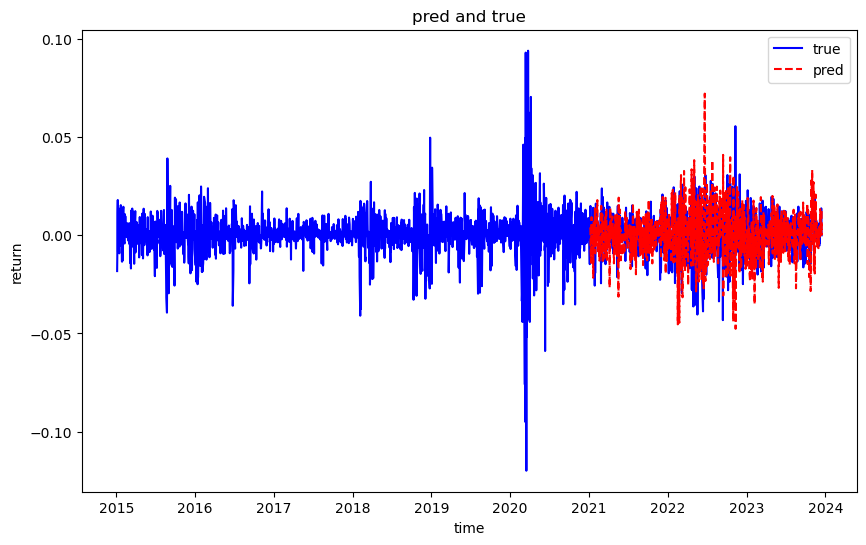

In [54]:
window_size = 1512 # use six years daily returns data
forecast_horizon = 1 #forecast one step 
rolling_predictions = []
rolm=[]
rolv=[]
SPX = pd.read_csv('SPX.csv', index_col='Date')
SPX.index = pd.to_datetime(SPX.index)
returns = SPX['return rate']
Dates = returns.index
for end in range(window_size, len(returns)):
    train_data = SPX[(end-window_size):end]
    arima_model = sm.tsa.ARIMA(train_data, order=(3, 0, 2)).fit()# select this arima order by aic and bic
    arima_residuals = arima_model.resid
    forecast_mean=arima_model.forecast(15)
    egarch_model = arch_model(arima_model.resid, vol='EGARCH', p=1, o=0, q=1)# empirically, choose 1,0,1 as egarch model's order
    egarch_model_result = egarch_model.fit()
    vol_pred=egarch_model_result.forecast()
    forecast_variance = vol_pred.variance.values[-1]
    forecasted_return = forecast_mean + np.random.normal(0, 1)*np.sqrt(forecast_variance)
    rolm.append(forecast_mean.values)
    rolv.append(forecast_variance[0])
    rolling_predictions.append(forecasted_return.values[0])
    print(returns.index[end])
rolm=pd.Series(rolm, index=returns.index[window_size:],name='Mean')
rolv=pd.Series(rolv, index=returns.index[window_size:],name='Variance')
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[window_size:],name='Predicted return')
cc=pd.concat([rolm,rolv,rolling_predictions],axis=1)
print(rolm)
print(rolv)
print(rolling_predictions)
print(cc)



start_index = window_size

rolling_predictions_series = pd.Series(rolling_predictions, index=SPX.index[start_index:])

plt.figure(figsize=(10, 6))
plt.plot(SPX.index,SPX['return rate'], color='blue', label='true')
plt.plot(SPX.index[1512:],rolling_predictions_series, color='red', linestyle='--', label='pred')

plt.title('pred and true')
plt.xlabel('time')
plt.ylabel('return')
plt.legend()

plt.savefig('SPX_AE_Pred.png')


plt.show()
cc.to_csv('SPX_AE_Pred.csv')